In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

#os - operating system dependent. to read/write files
#pd - pandas for data analysis/modeling

data_path = 'data/'

#get DataFrames
#Reformated sales into one dataframe in 3.1_CreateMonthlySales
trainingMonthSet    = pd.read_pickle(os.path.join(data_path, 'trainingMonthSet.pickle'))

In [2]:
trainingMonthSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609124 entries, 0 to 2935847
Data columns (total 7 columns):
shop_id             1609124 non-null int8
item_id             1609124 non-null int16
date_block_num      1609124 non-null int8
date                1609124 non-null datetime64[ns]
item_category_id    1609124 non-null int8
item_price          1609124 non-null float64
item_cnt_month      1609124 non-null int16
dtypes: datetime64[ns](1), float64(1), int16(2), int8(3)
memory usage: 47.6 MB


In [3]:
trainingMonthSet.describe()

shop_id       item_id  date_block_num  item_category_id  \
count  1.609124e+06  1.609124e+06    1.609124e+06      1.609124e+06   
mean   3.280585e+01  1.068099e+04    1.466479e+01      4.154192e+01   
std    1.653701e+01  6.238883e+03    9.542322e+00      1.632365e+01   
min    0.000000e+00  0.000000e+00    0.000000e+00      0.000000e+00   
25%    2.100000e+01  5.045000e+03    6.000000e+00      3.000000e+01   
50%    3.100000e+01  1.049700e+04    1.400000e+01      4.000000e+01   
75%    4.700000e+01  1.606000e+04    2.300000e+01      5.500000e+01   
max    5.900000e+01  2.216900e+04    3.300000e+01      8.300000e+01   

         item_price  item_cnt_month  
count  1.609124e+06    1.609124e+06  
mean   7.908847e+02    2.267200e+00  
std    1.551605e+03    8.649882e+00  
min    9.000000e-02   -2.200000e+01  
25%    1.990000e+02    1.000000e+00  
50%    3.990000e+02    1.000000e+00  
75%    8.985000e+02    2.000000e+00  
max    3.079800e+05    2.253000e+03

<h1>Monthly Performance <small> regardless of shops and items</small></h1>

In [5]:
# Monthly Performance for all shops
MonthlyPerformanceSum = trainingMonthSet.copy().groupby(['date'],as_index=True).agg({'item_cnt_month':'sum'}).astype(np.int32)
MonthlyPerformanceMean = trainingMonthSet.copy().groupby(['date'],as_index=True).agg({'item_cnt_month':np.mean})
MonthlyPerformance = pd.merge(MonthlyPerformanceSum, MonthlyPerformanceMean, how='left', on=['date'])
MonthlyPerformance.columns = ['monthly_sum','monthly_mean']
MonthlyPerformance.head()

monthly_sum  monthly_mean
date                                 
2013-01-01       131479      2.079574
2013-02-01       128090      2.137149
2013-03-01       147142      2.299920
2013-04-01       107190      1.961821
2013-05-01       106970      2.007092

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E84046CC0>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

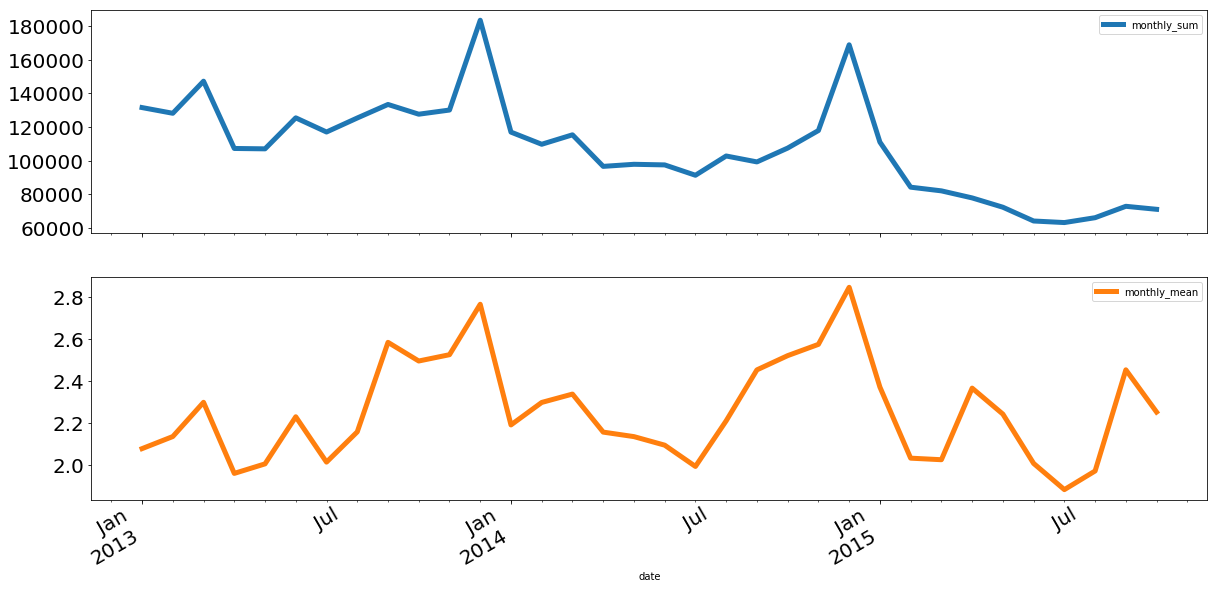

In [6]:
from pandas.plotting import autocorrelation_plot
from pandas.tools.plotting import lag_plot

plt.figure(figsize=(20,10))
MonthlyPerformance.plot(subplots=True,linewidth=5, fontsize=20,figsize=(20,10))
#autocorrelation_plot(MonthlyPerformance.copy().drop('monthly_mean',axis=1))
#lag_plot(MonthlyPerformance.copy().drop('monthly_mean',axis=1))
#plt.legend(loc='best')

<p>We can see that there is a seasonality and a trend by analysing the plot.</p>

<Figure size 1440x720 with 0 Axes>

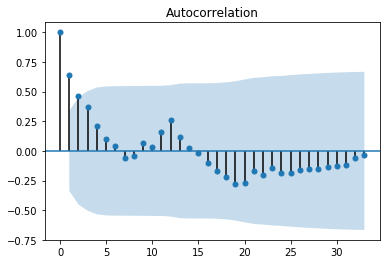

In [11]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(20,10))
plot_acf(MonthlyPerformance.copy().drop('monthly_mean',axis=1))
plt.show()


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<Figure size 1440x720 with 0 Axes>

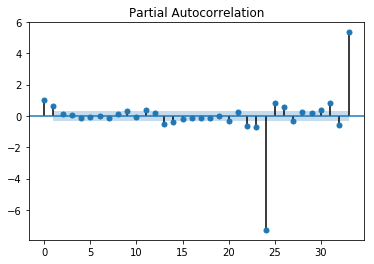

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,10))
plot_pacf(MonthlyPerformance.copy().drop('monthly_mean',axis=1))
plt.show()


<h2>Shop wise Monthly Performance</h2>
<p> We can see that monthly performance pattern is repeating for each shop</p>

In [17]:
#Shop wise Monthly Performance
ShopMonthlyPerformanceSum = trainingMonthSet.copy().groupby(['shop_id','date_block_num'],as_index=False).agg({'item_cnt_month':'sum'}).astype(np.int32)
ShopMonthlyPerformanceMean = trainingMonthSet.copy().groupby(['shop_id','date_block_num'],as_index=False).agg({'item_cnt_month':np.mean})
ShopMonthlyPerformance = pd.merge(ShopMonthlyPerformanceSum, ShopMonthlyPerformanceMean, how='left', on=['shop_id','date_block_num'])
ShopMonthlyPerformance.columns = ['shop_id','date_block_num','monthly_sum','monthly_mean']
ShopMonthlyPerformance.head()

shop_id  date_block_num  monthly_sum  monthly_mean
0        0               0         5578      2.338784
1        0               1         6127      2.515189
2        1               0         2947      1.919870
3        1               1         3364      1.925587
4        2               0         1146      1.574176

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


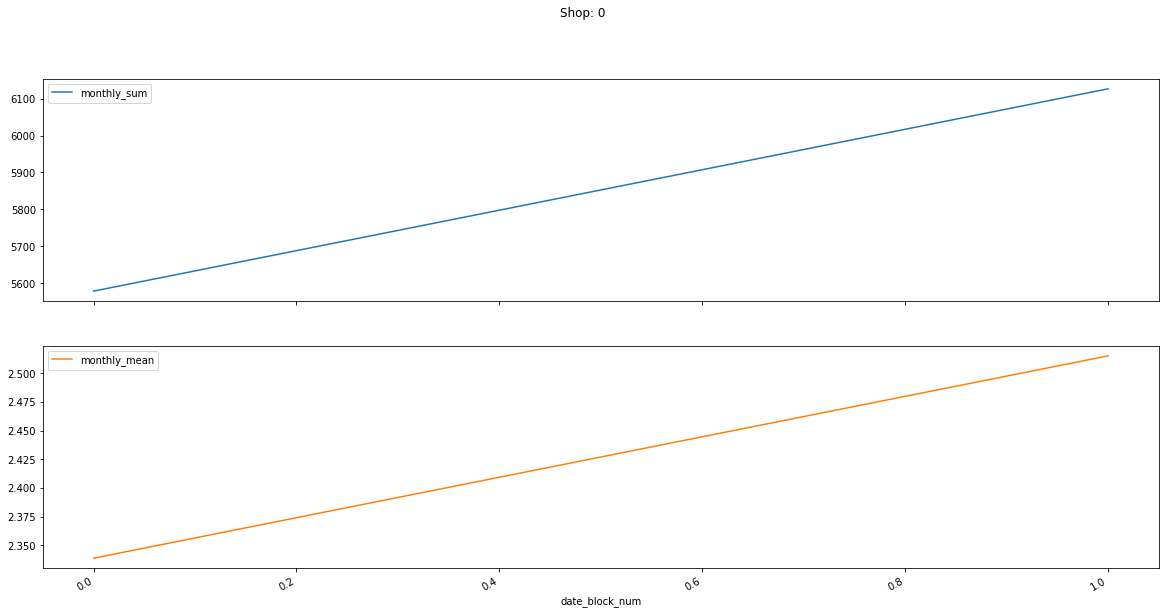

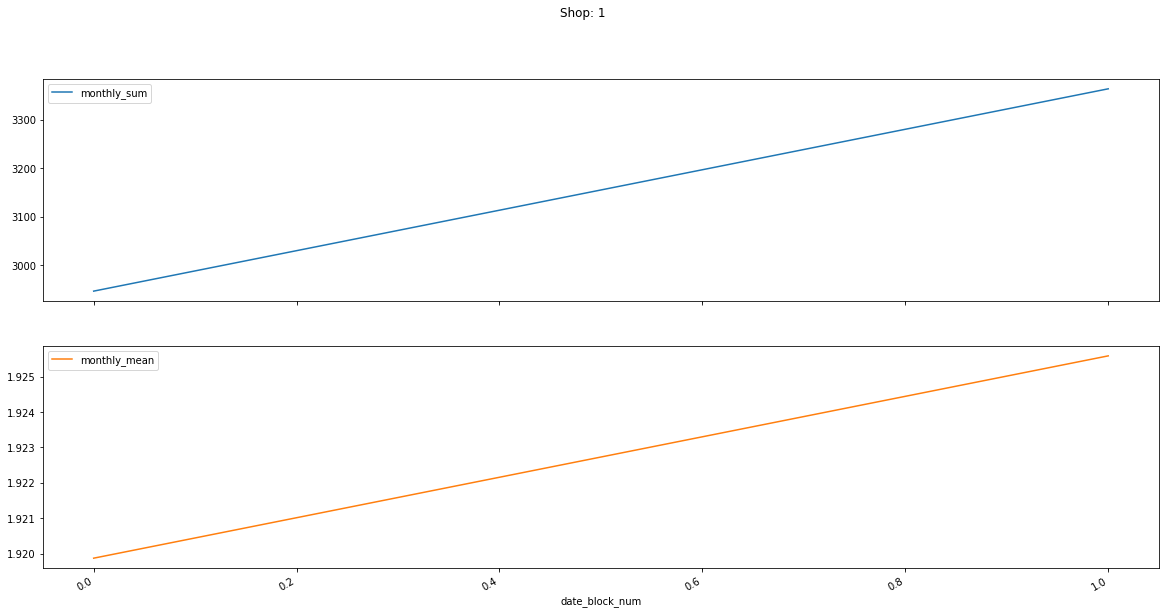

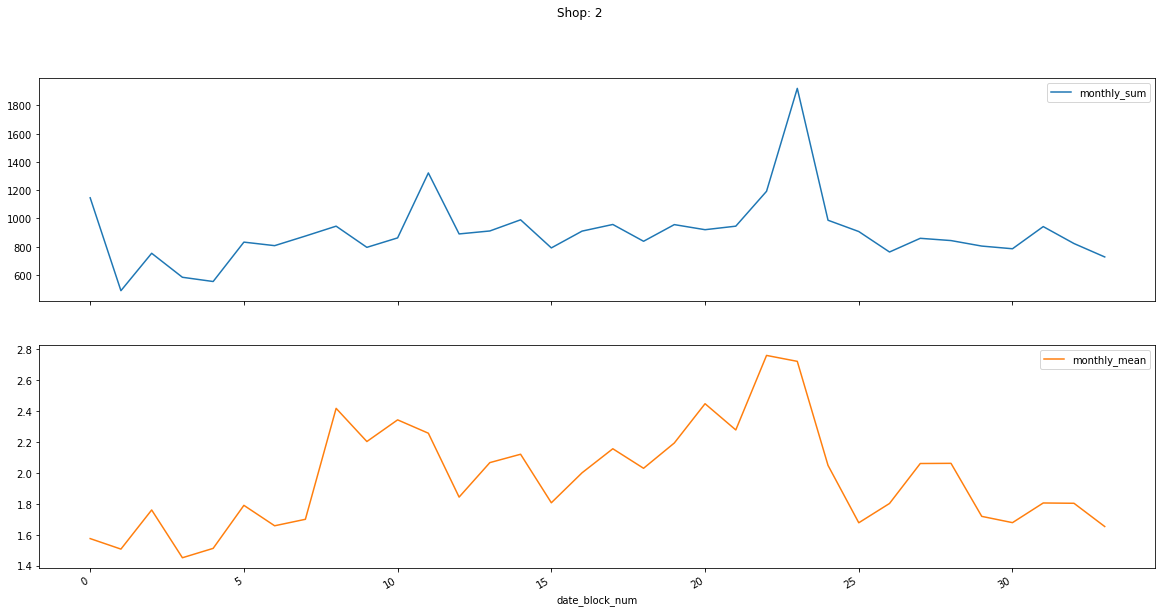

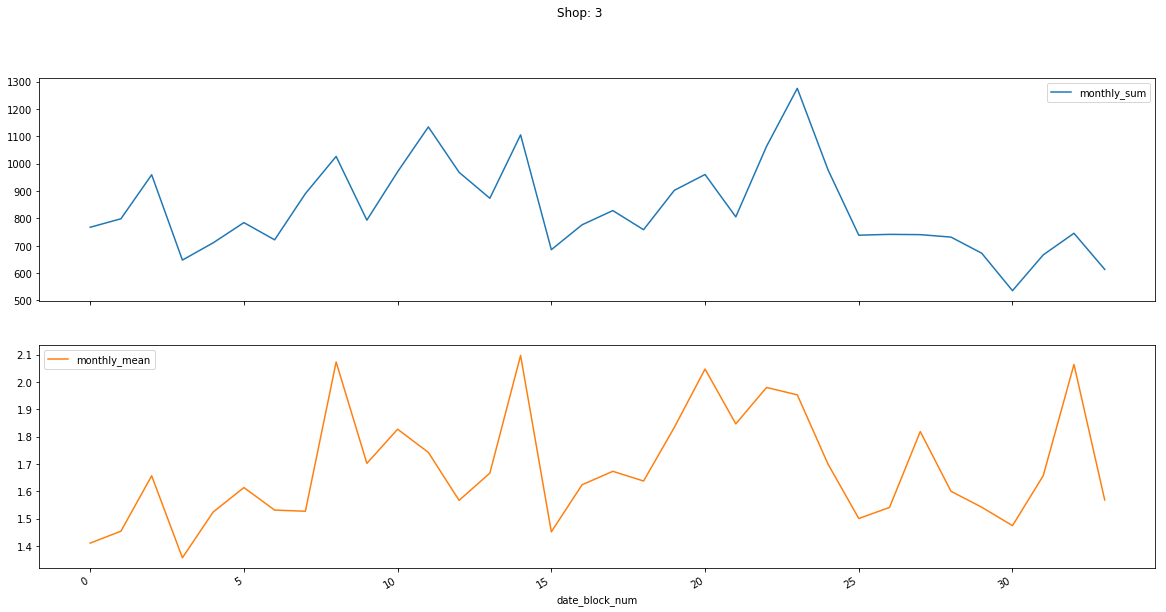

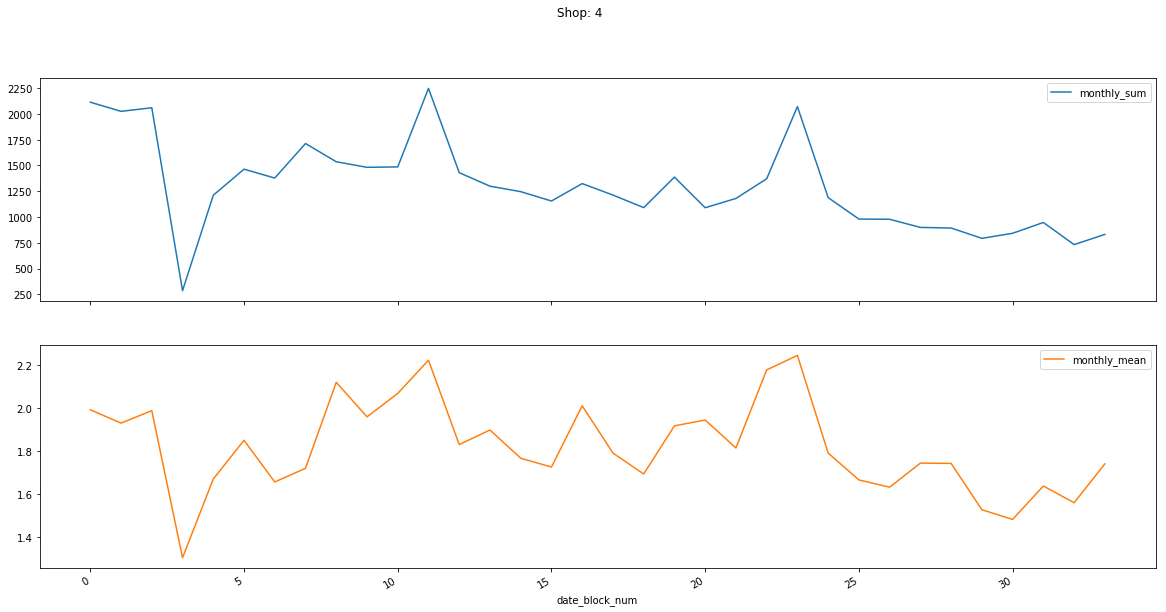

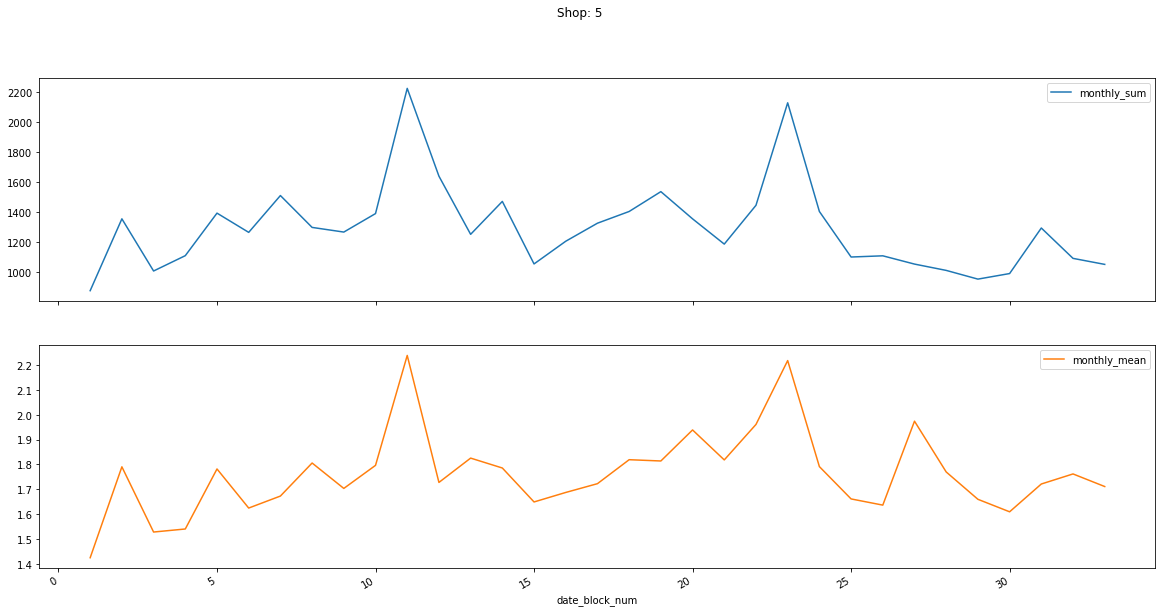

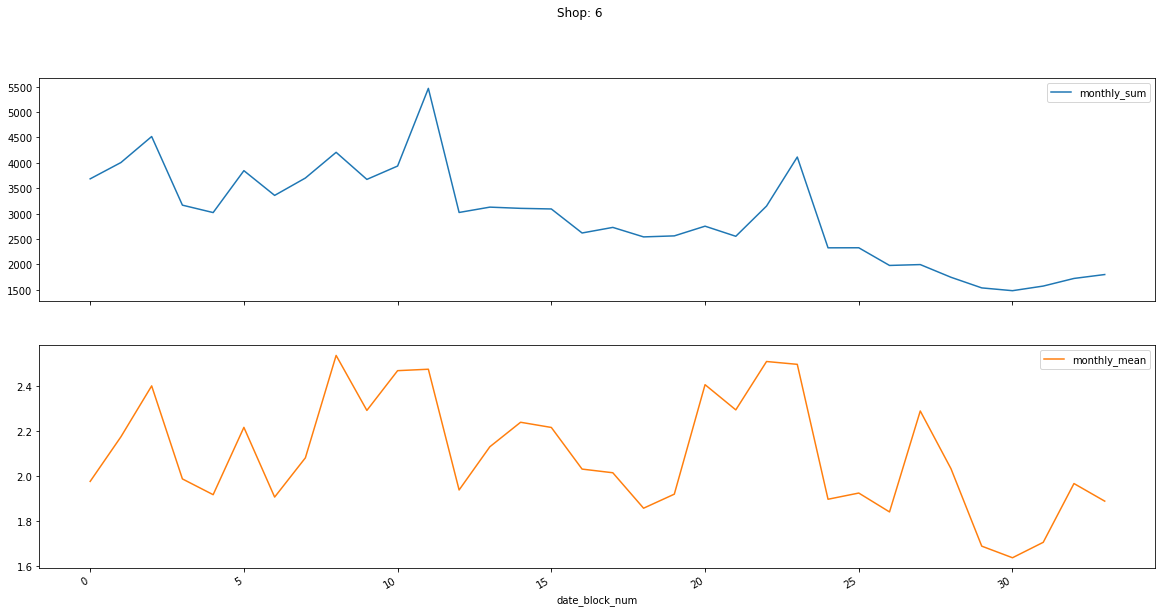

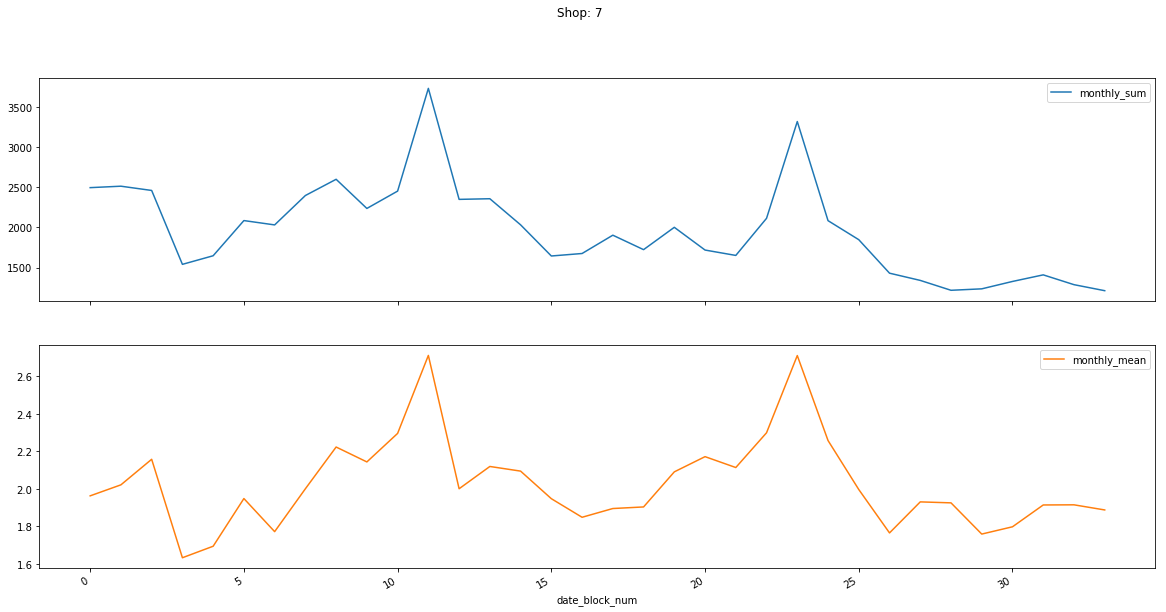

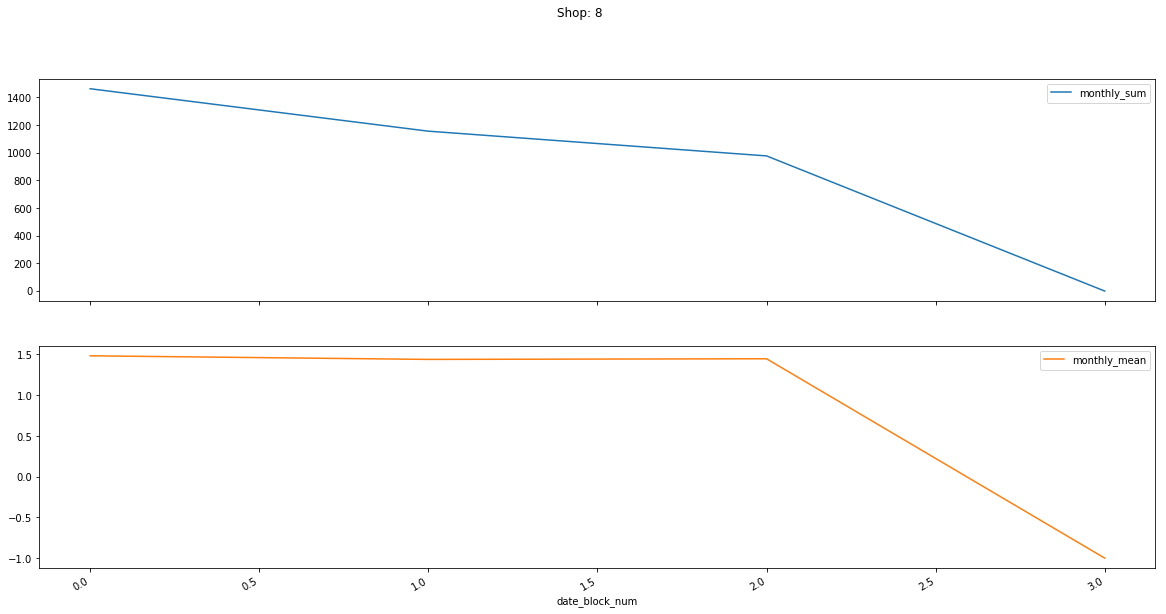

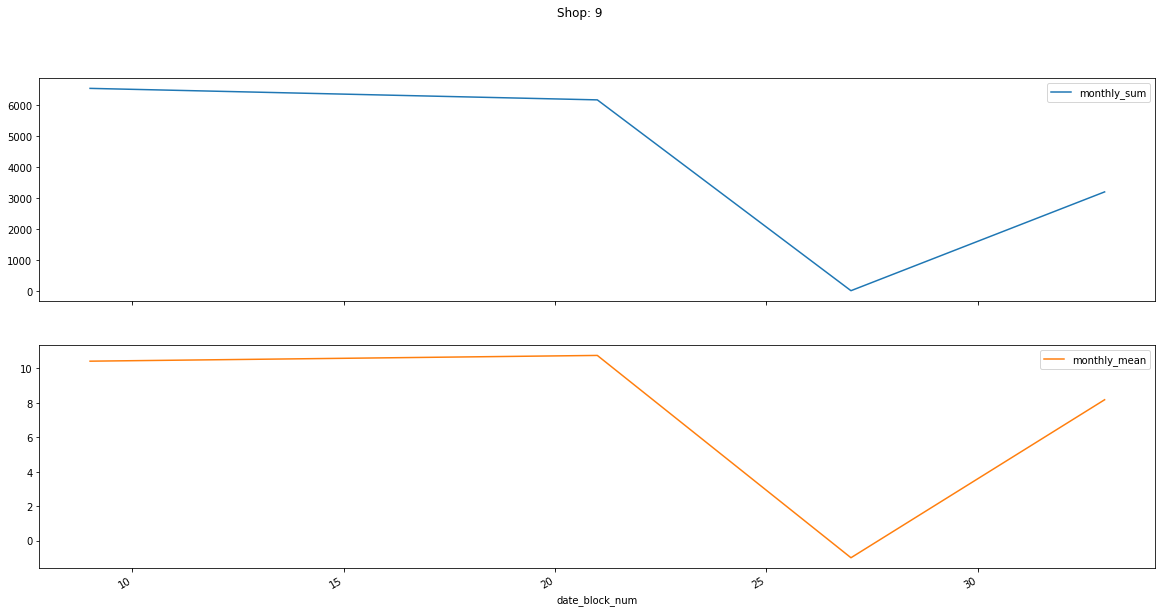

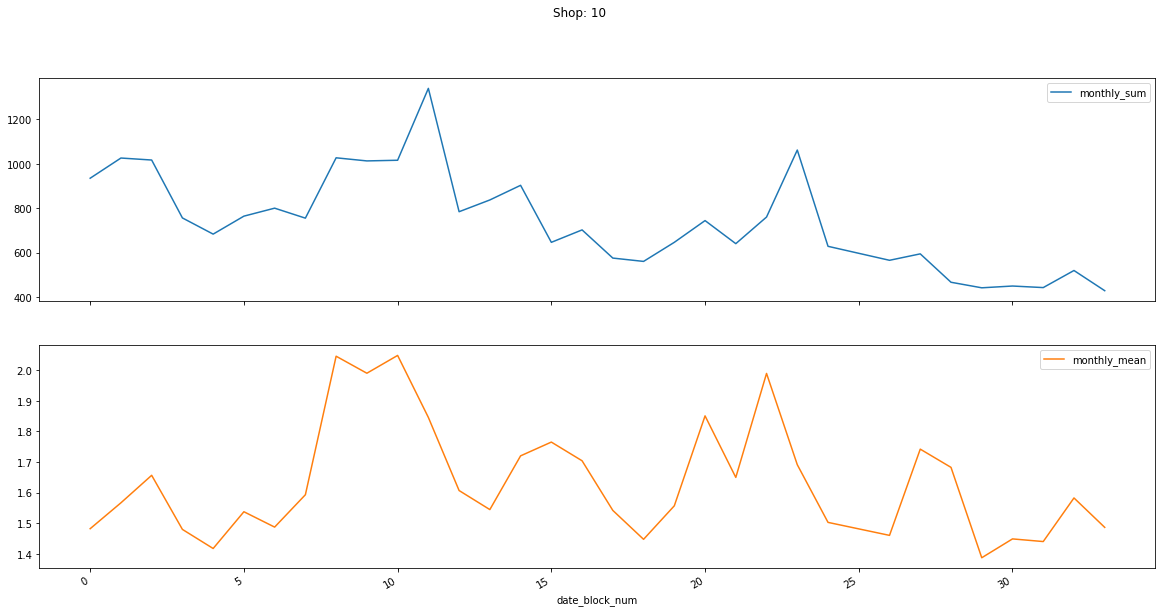

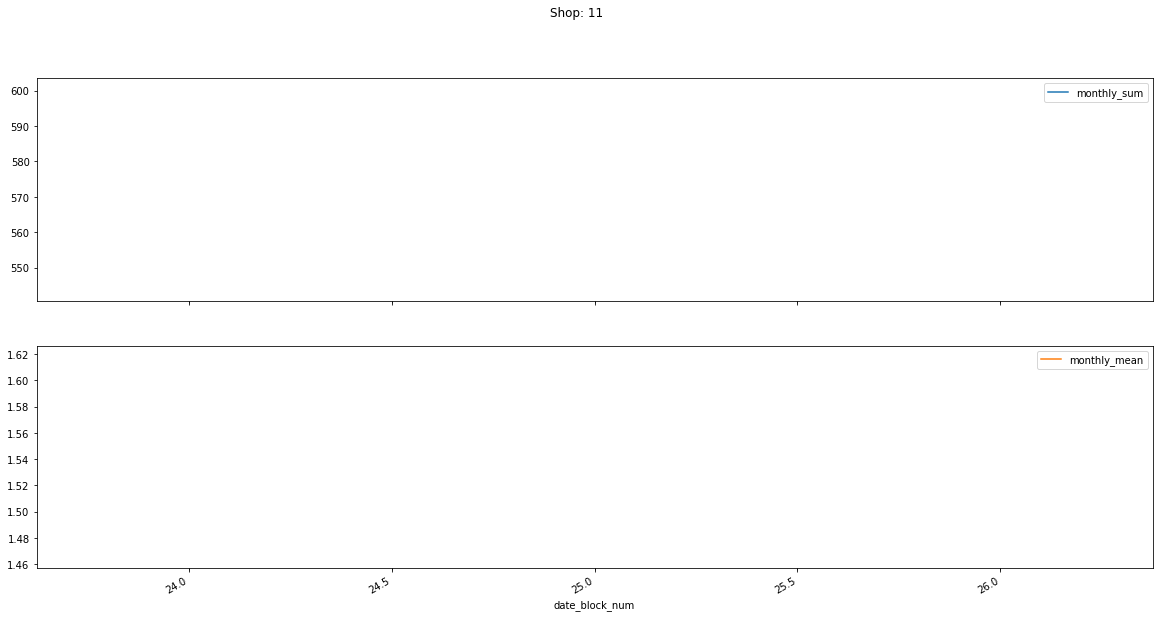

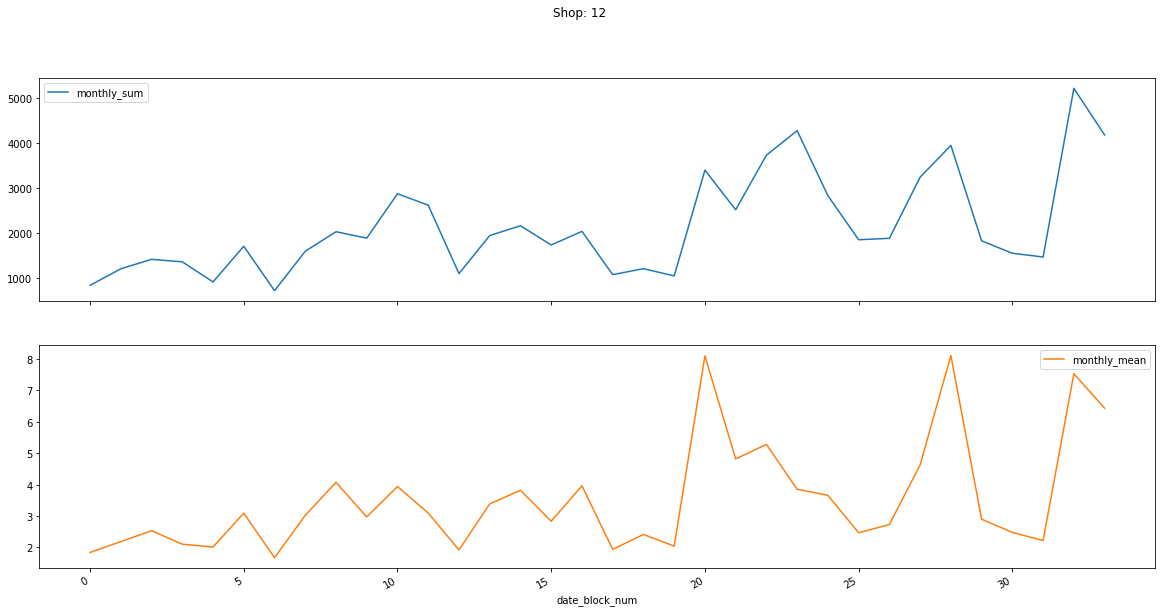

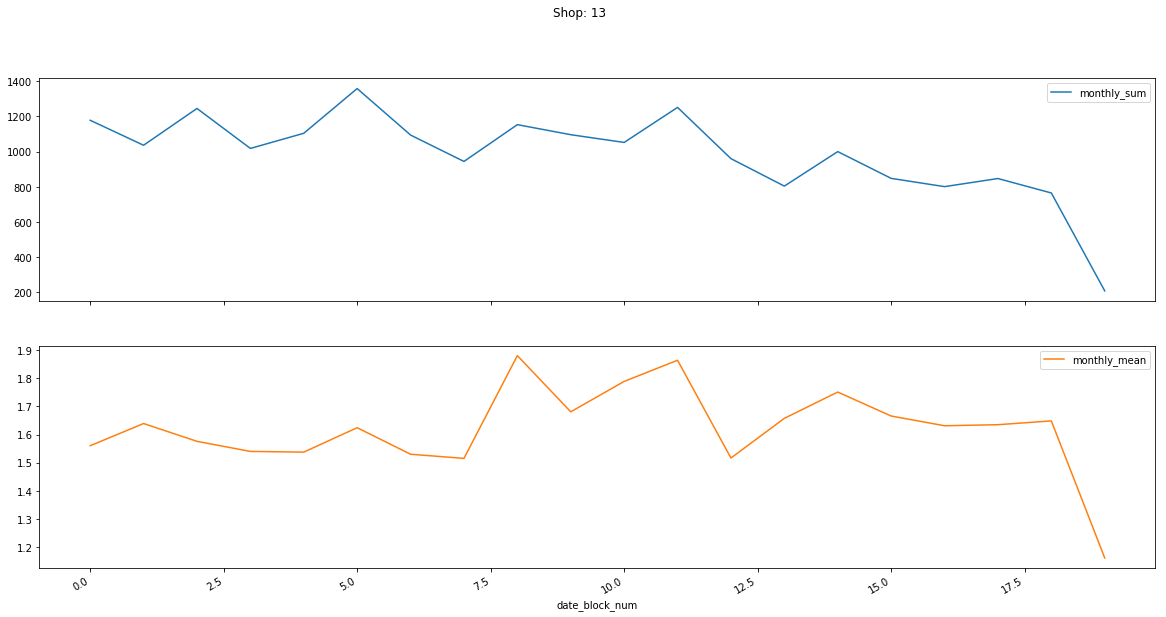

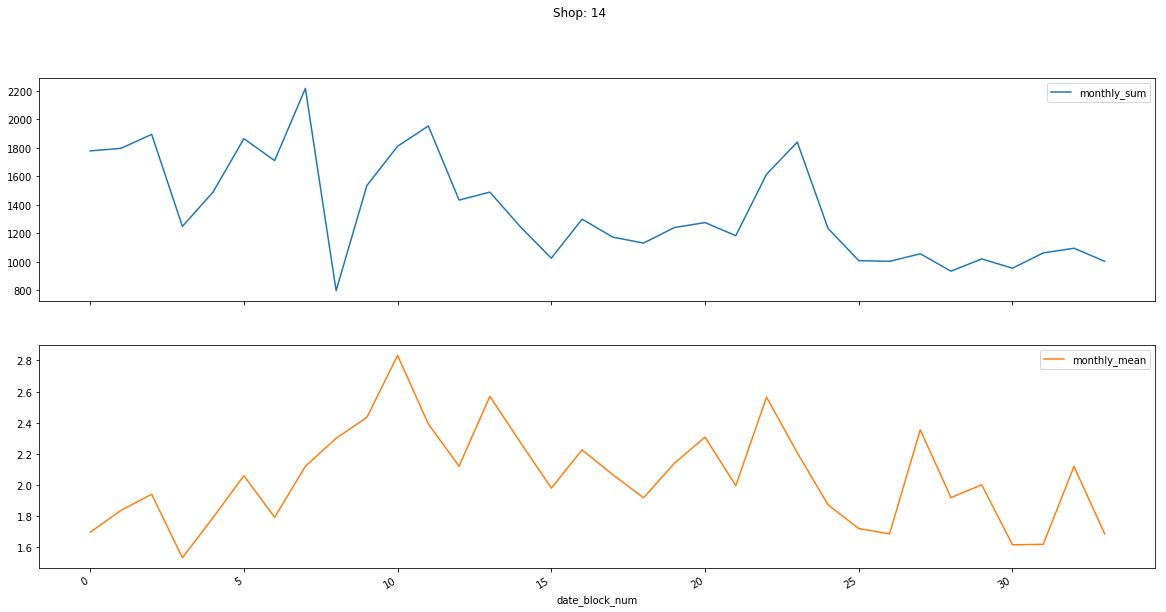

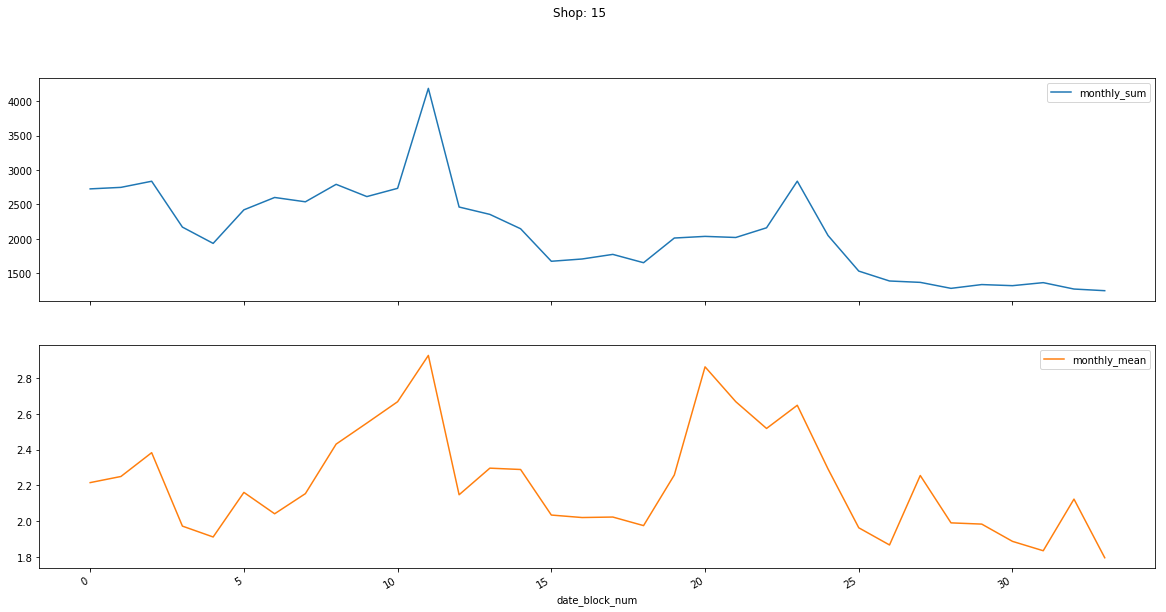

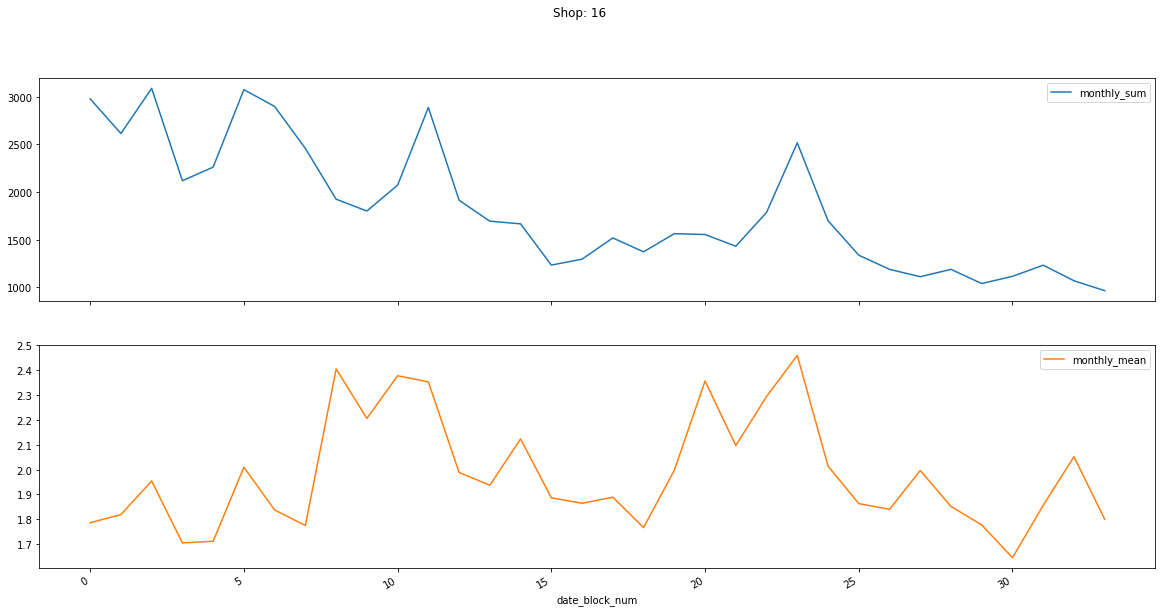

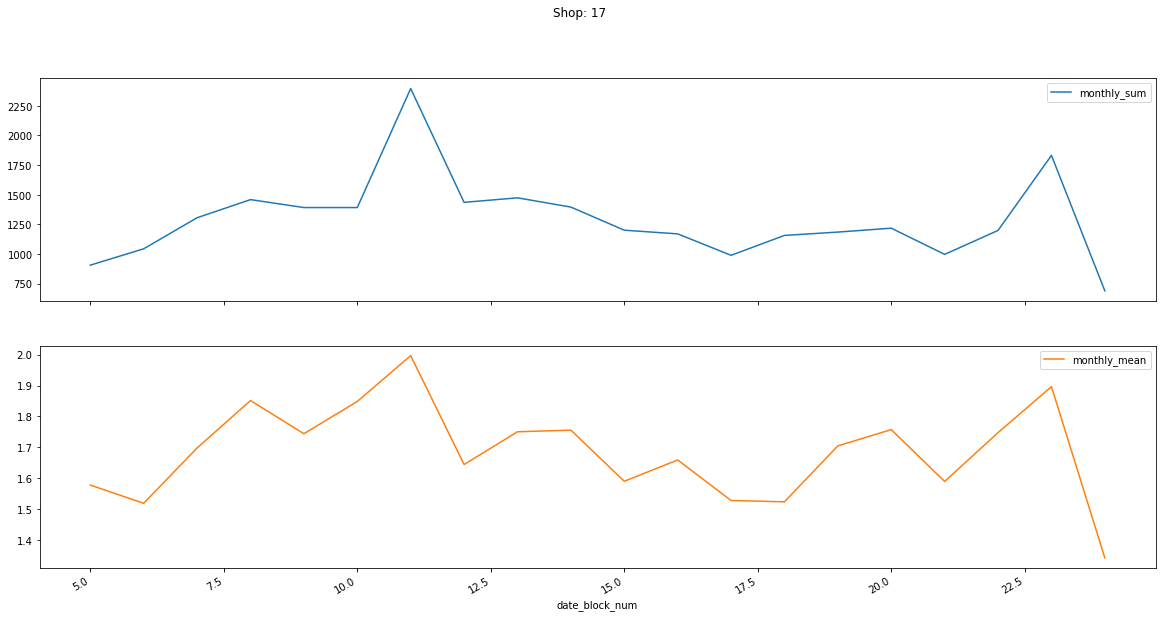

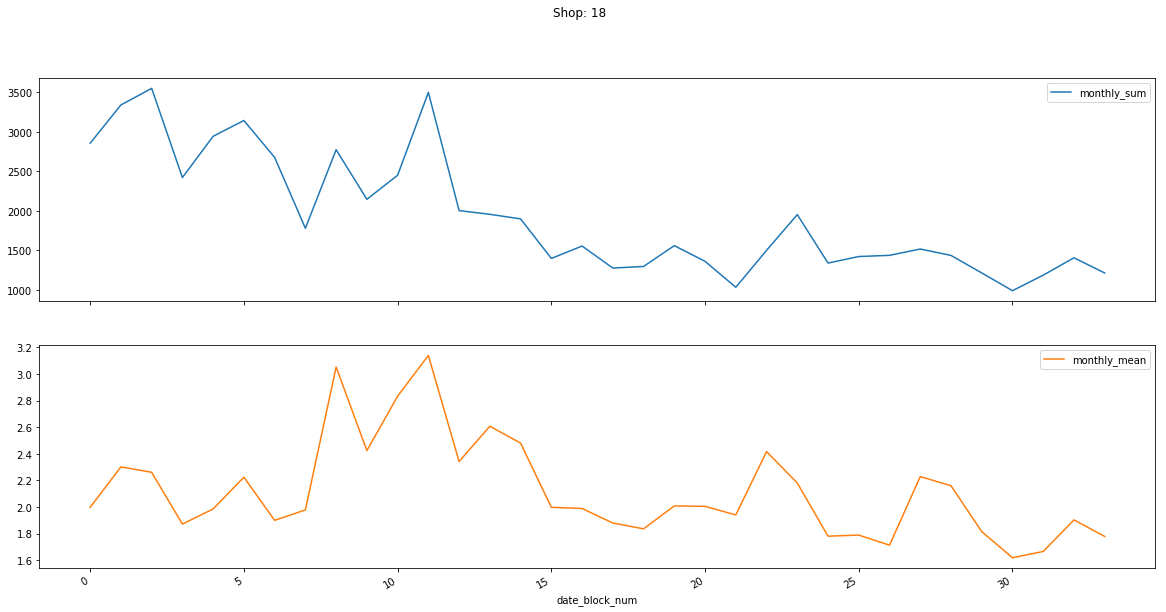

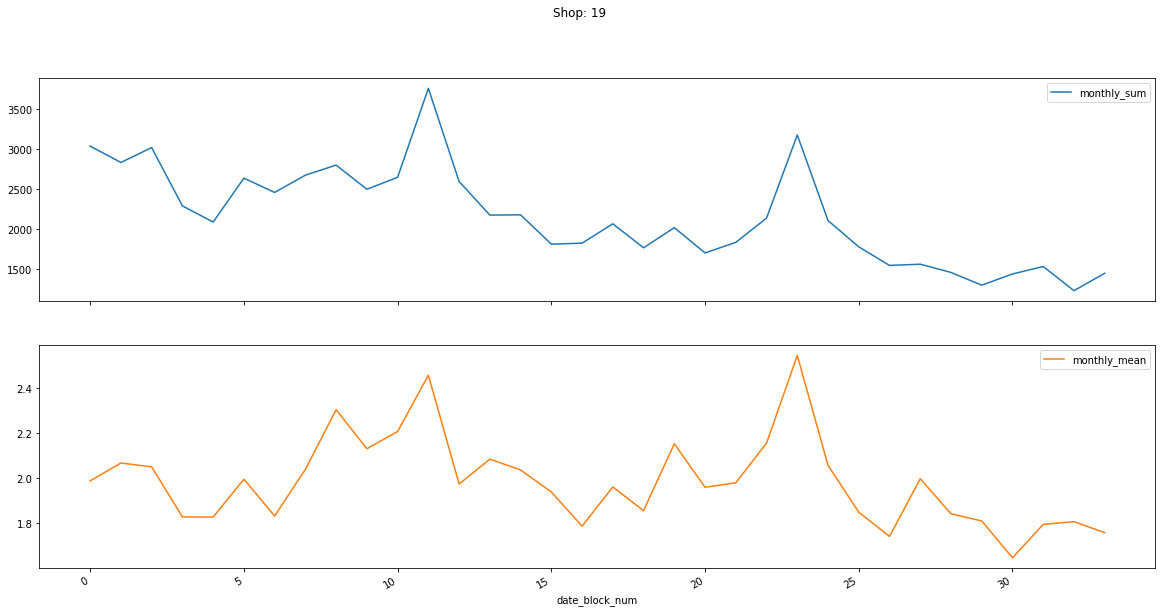

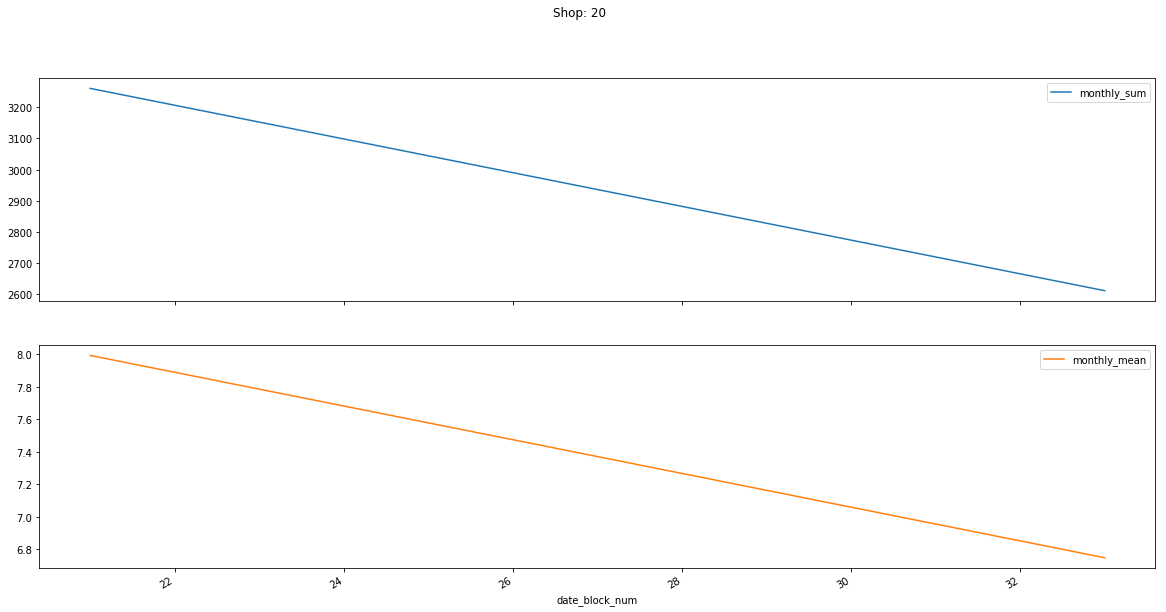

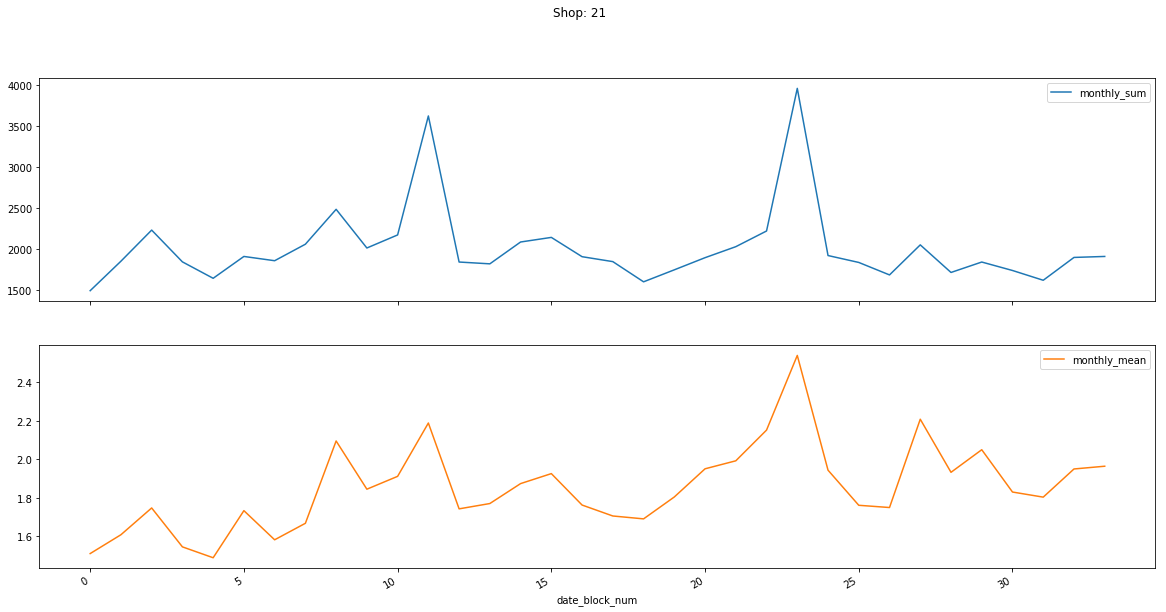

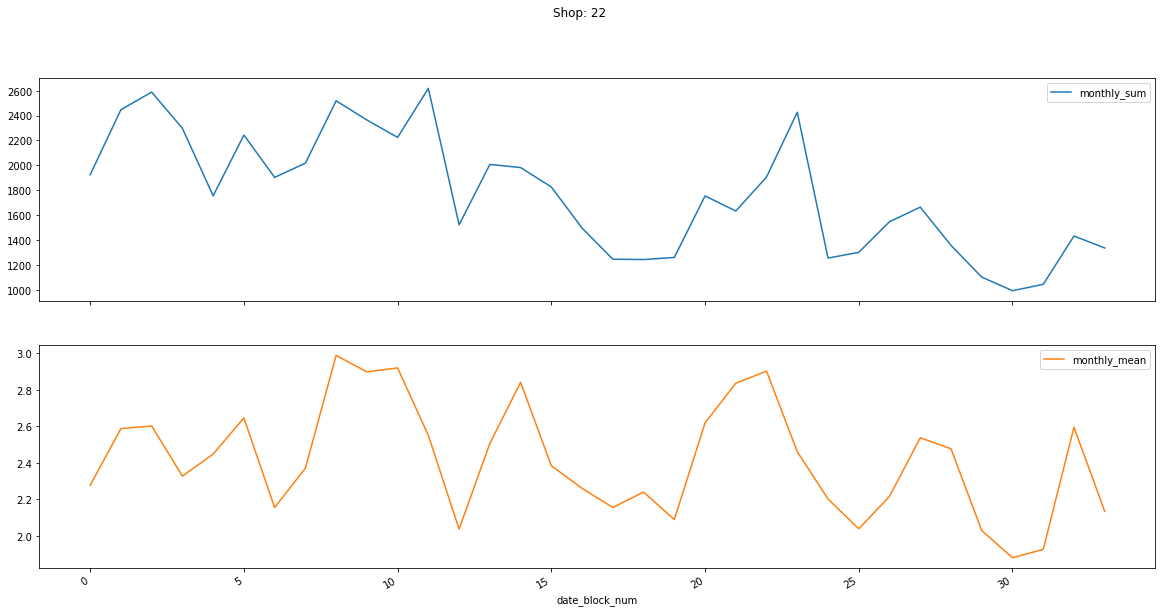

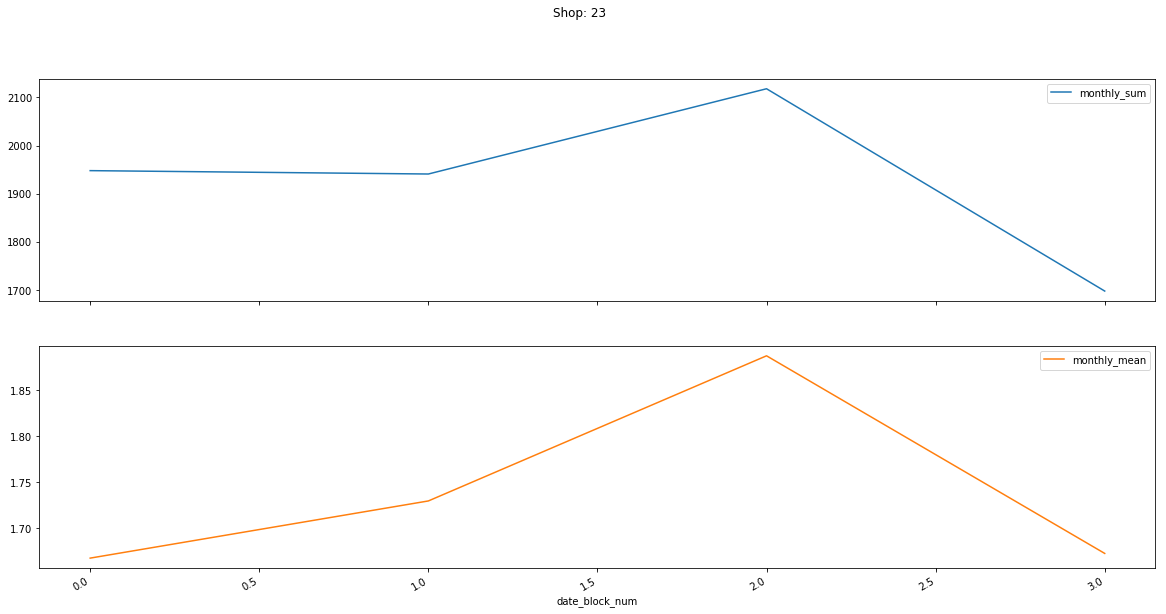

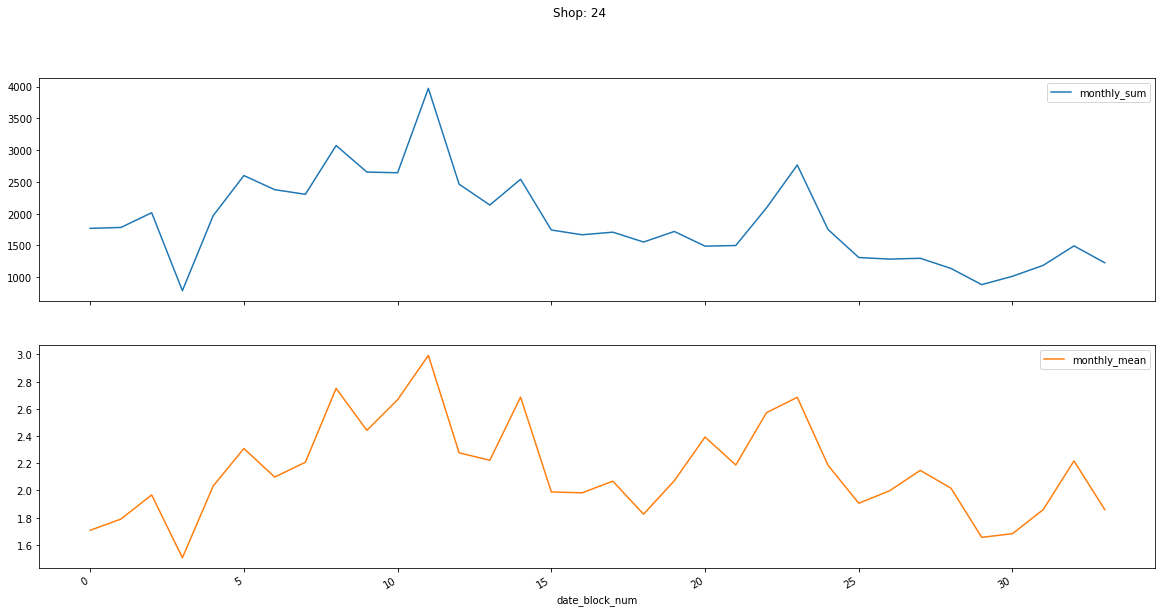

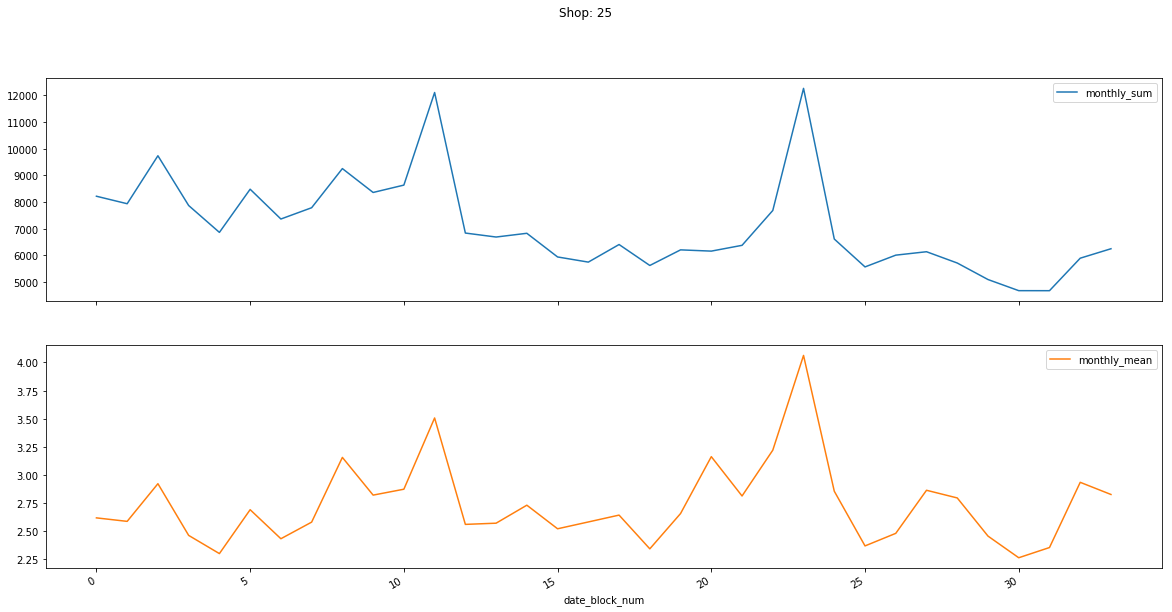

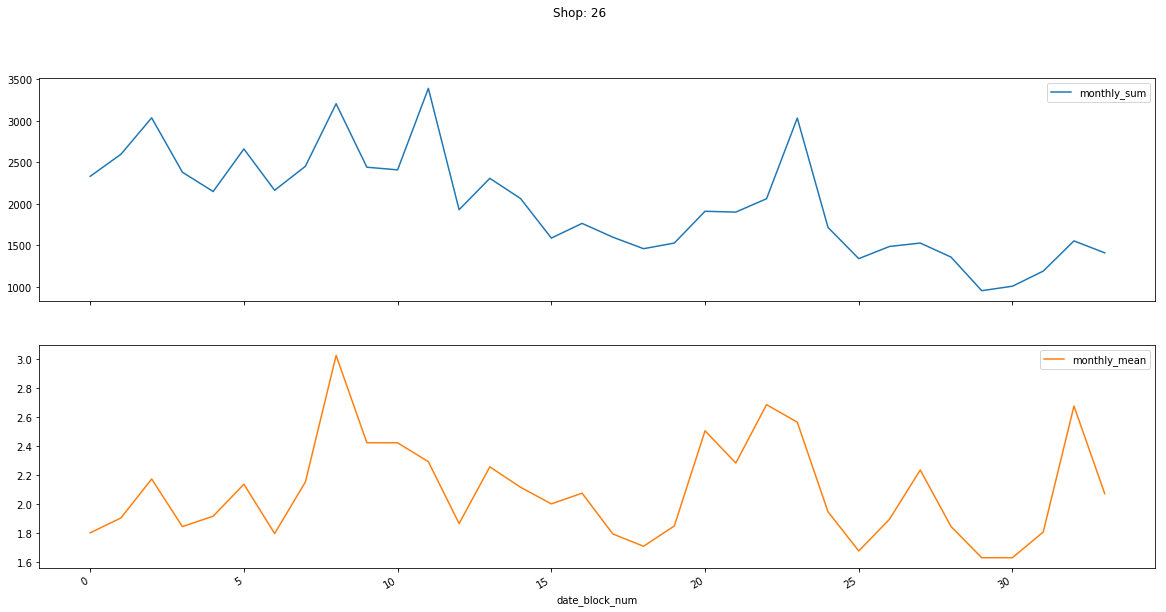

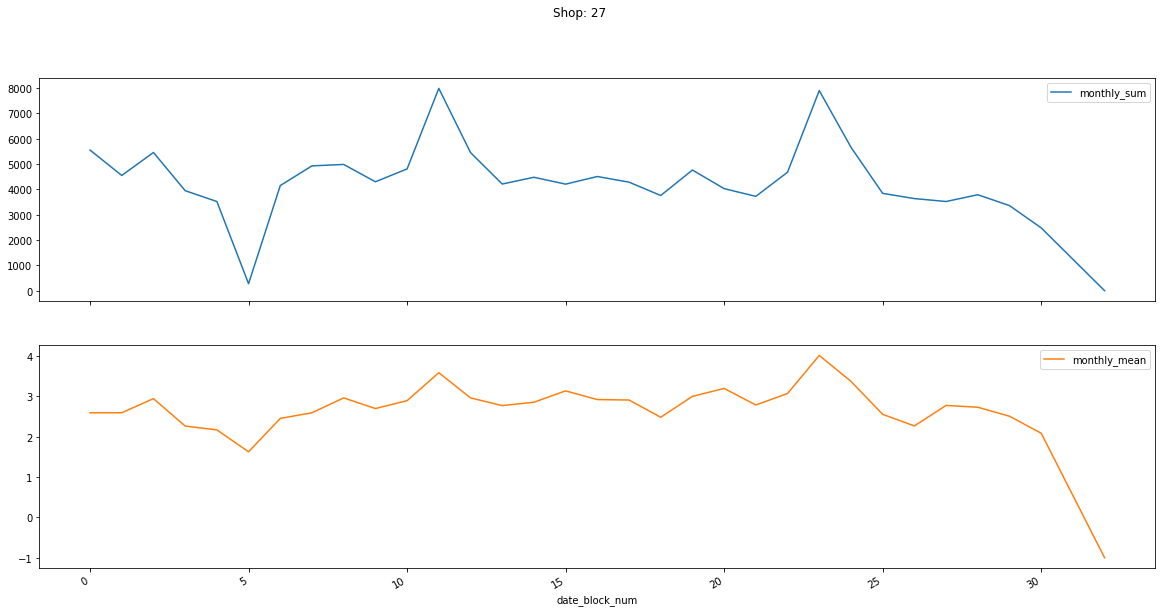

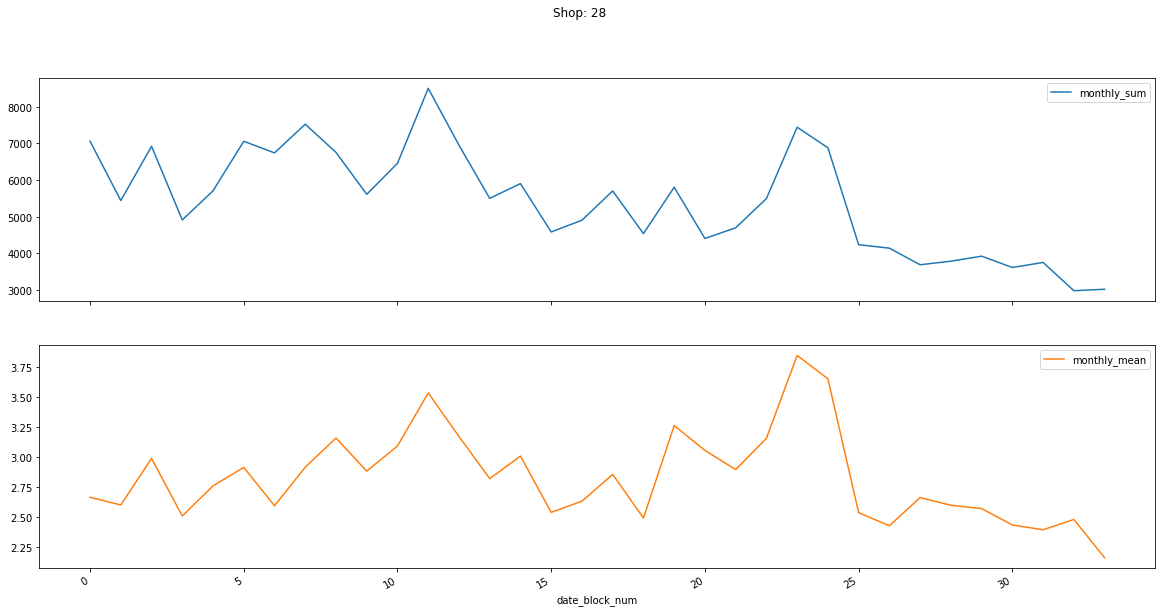

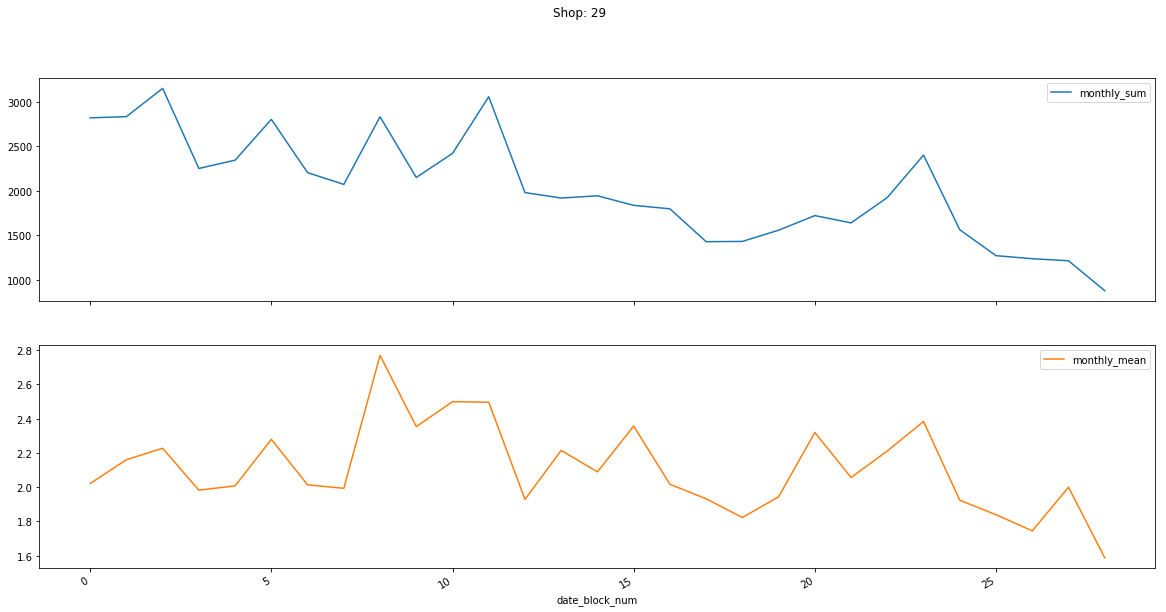

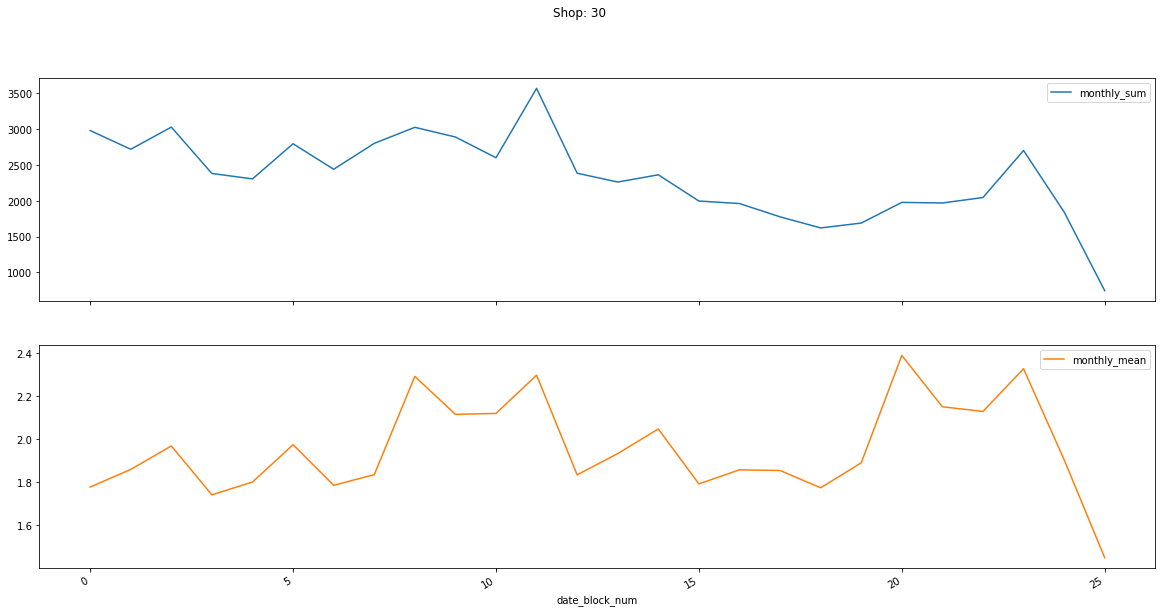

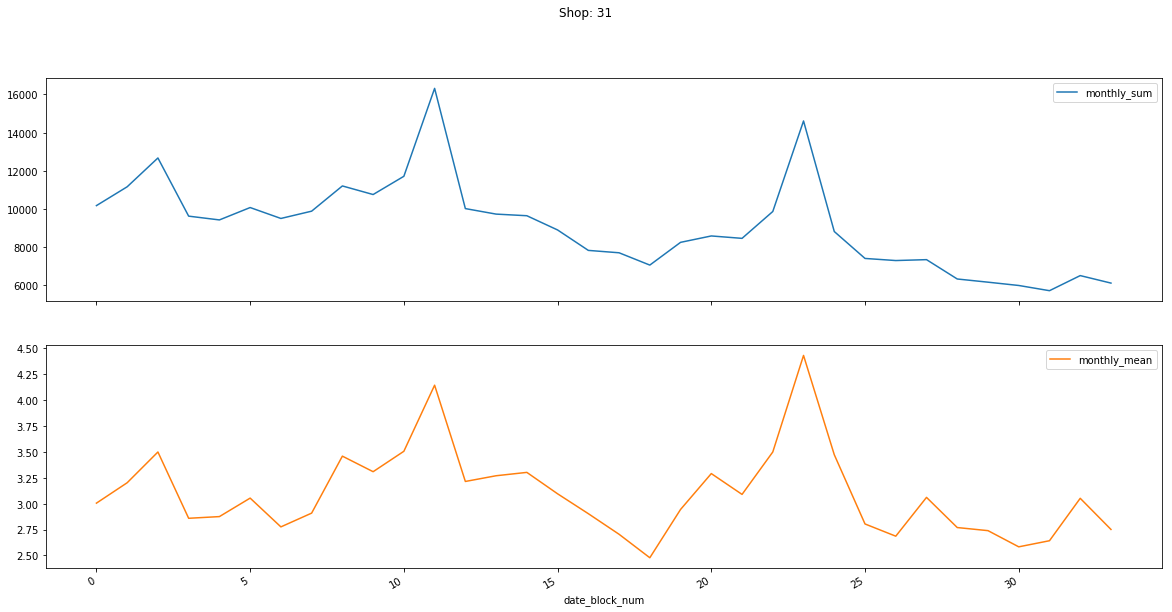

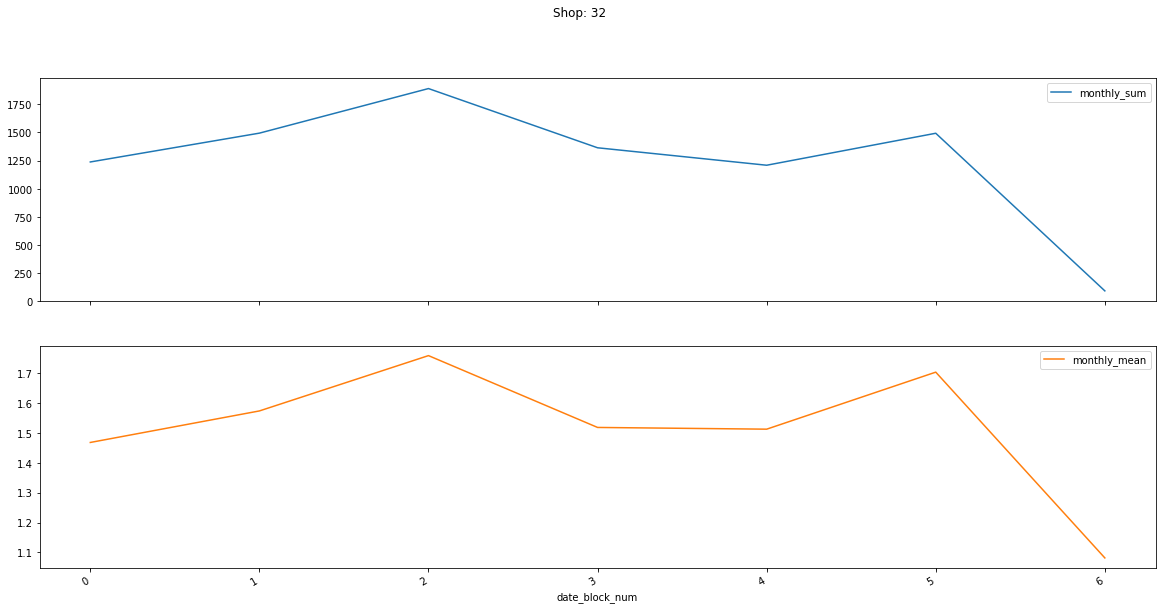

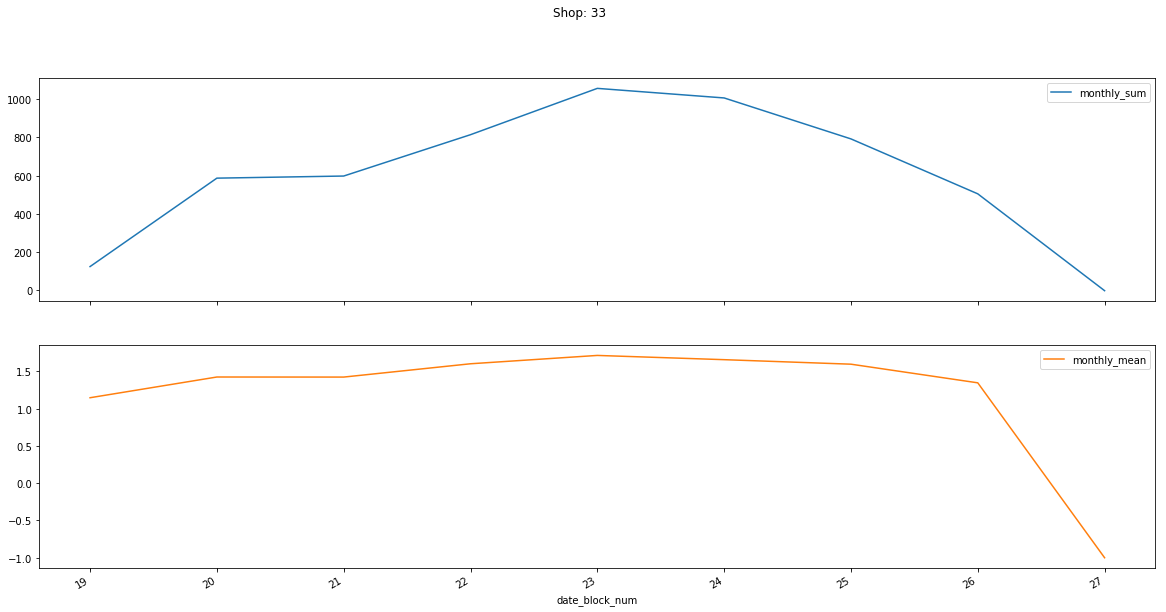

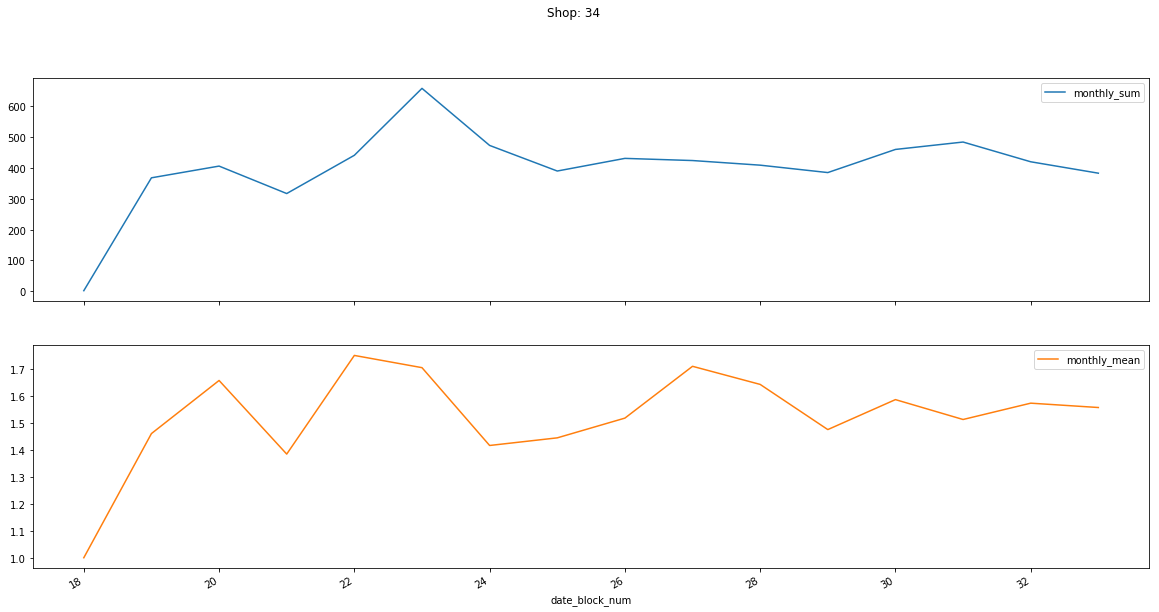

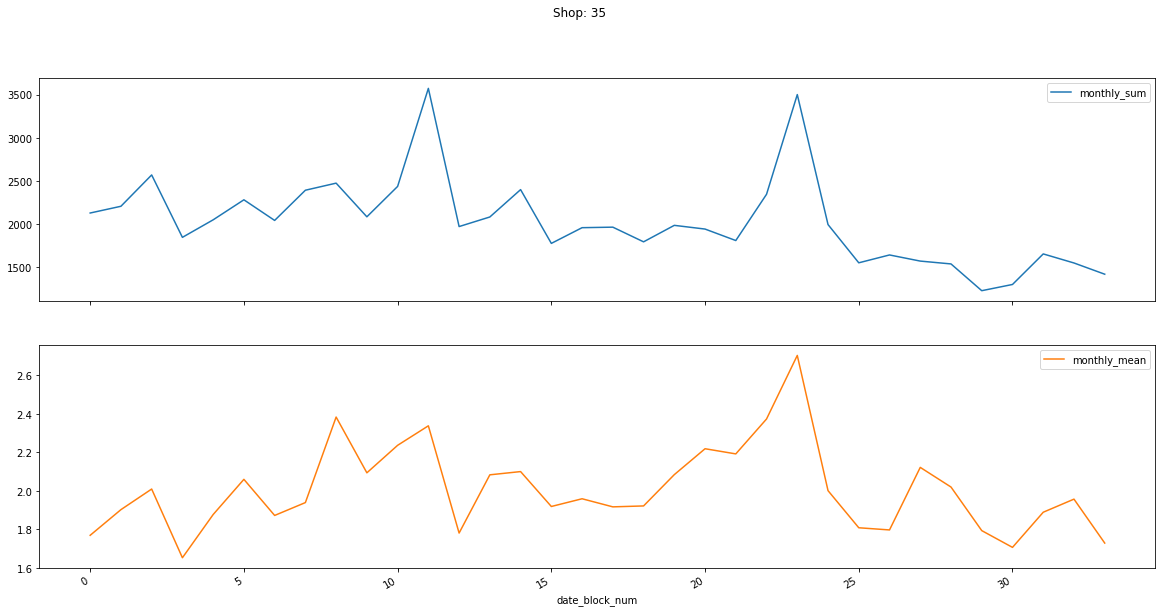

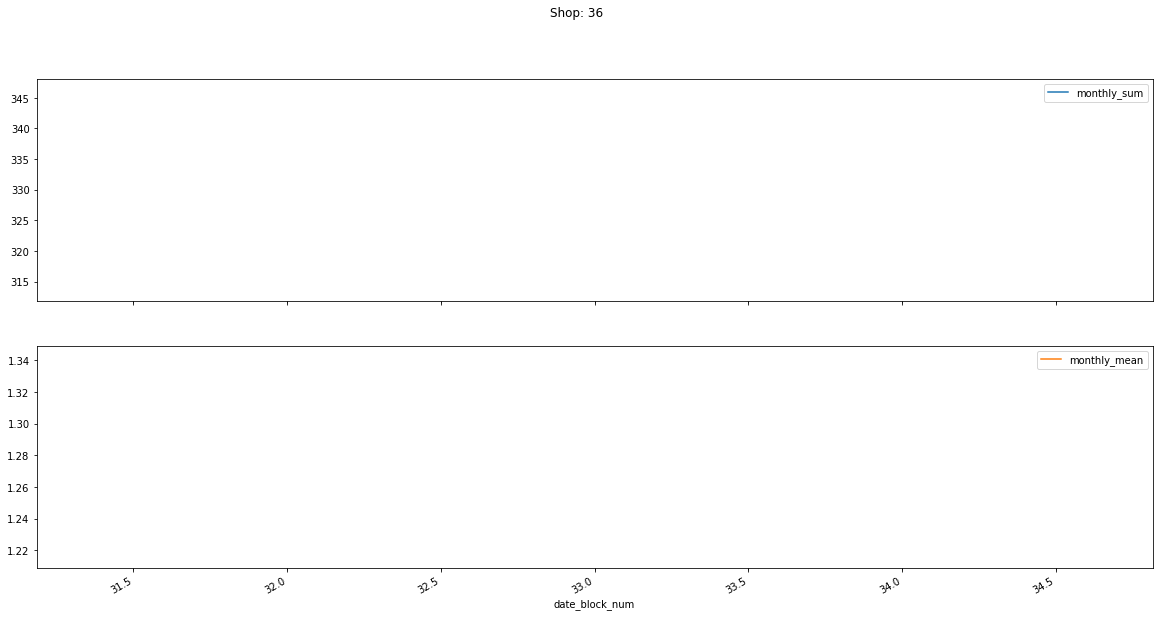

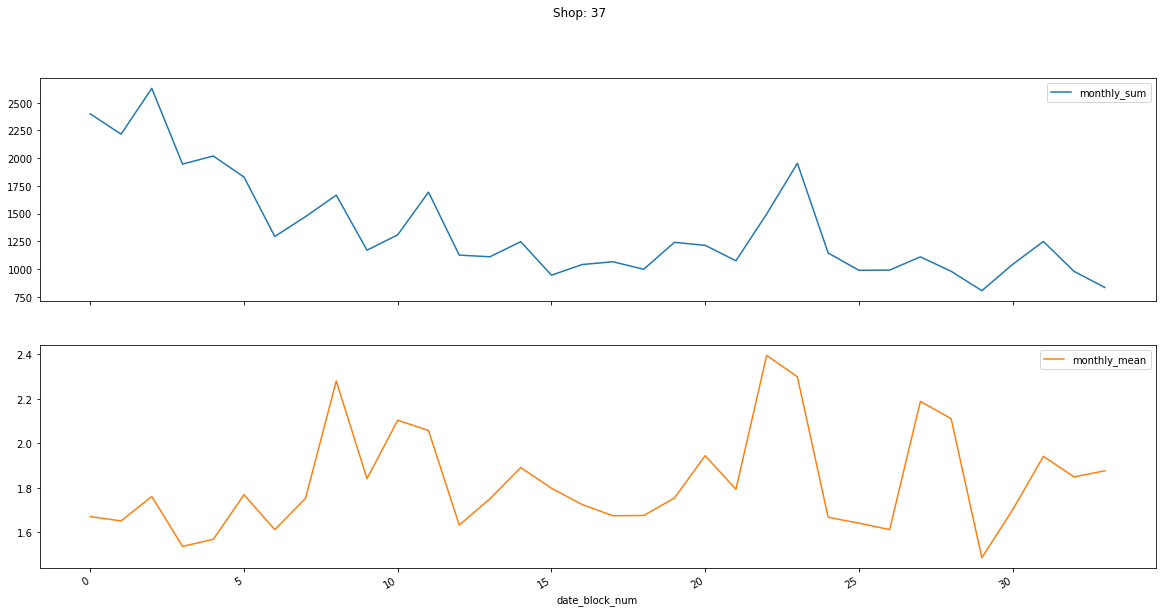

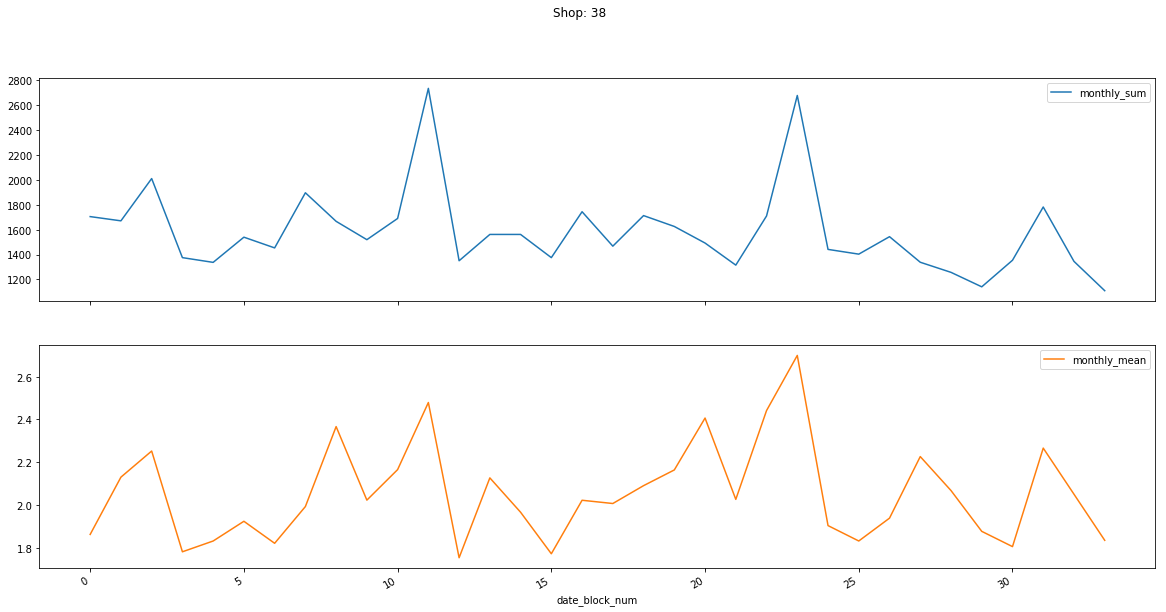

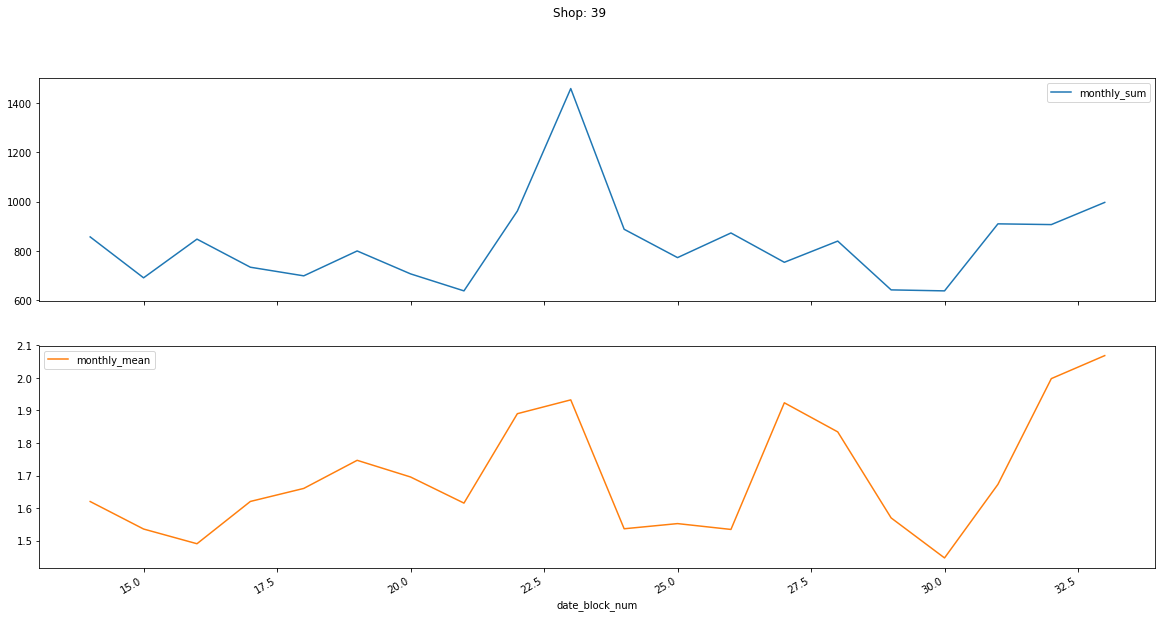

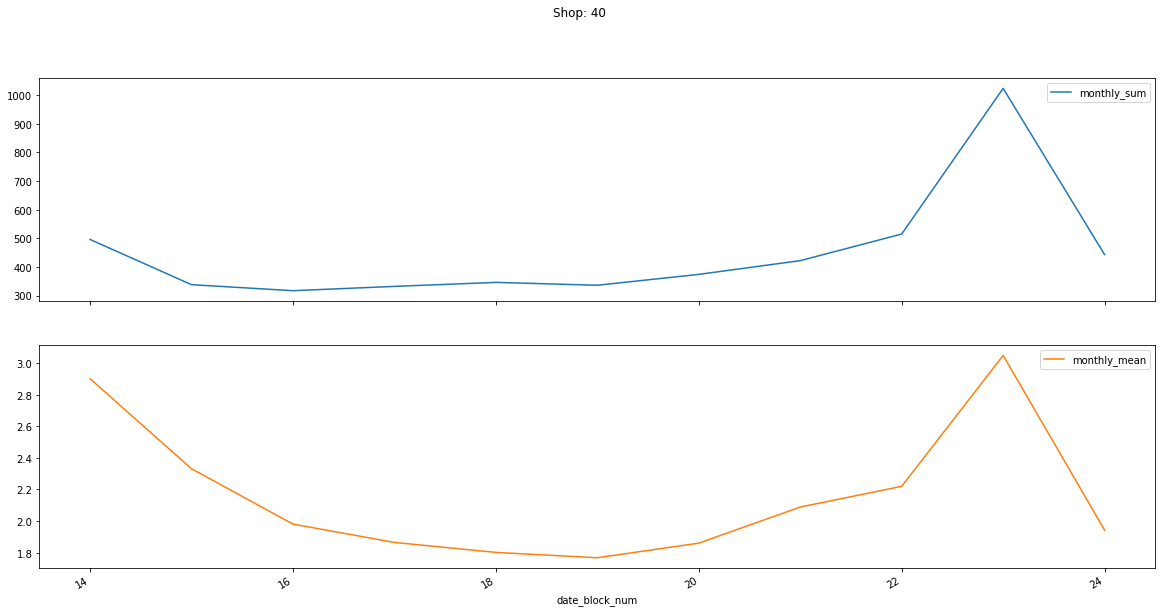

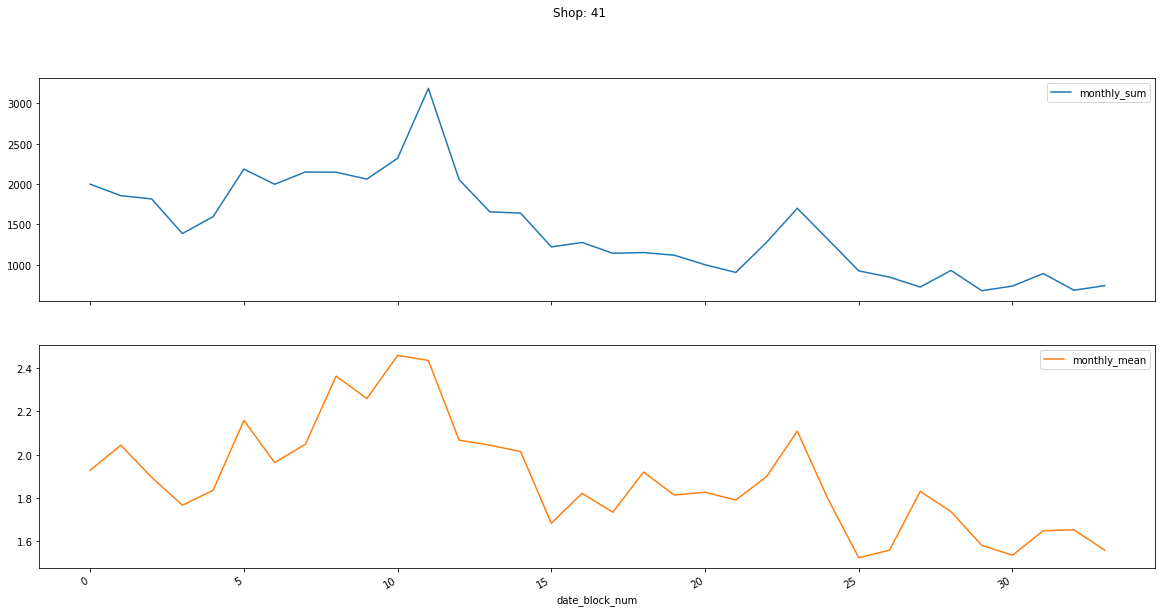

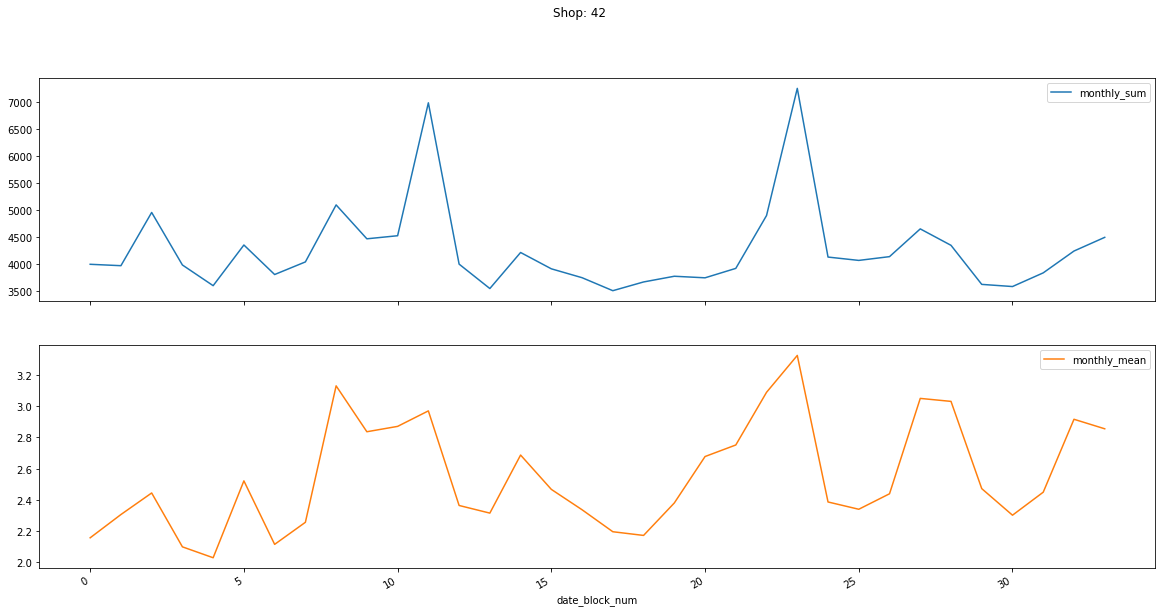

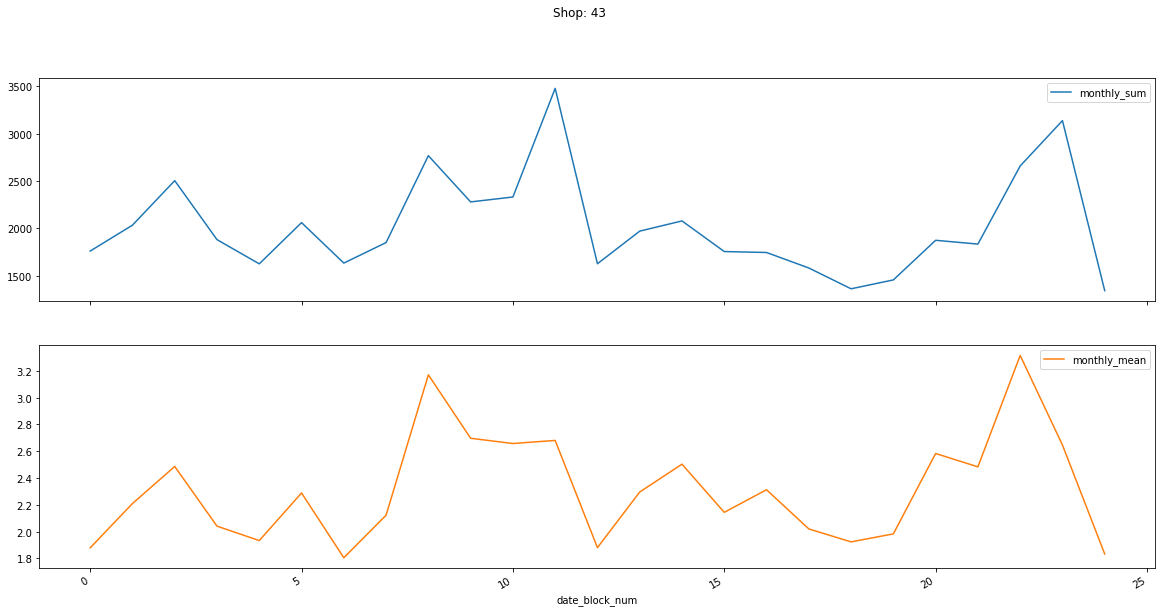

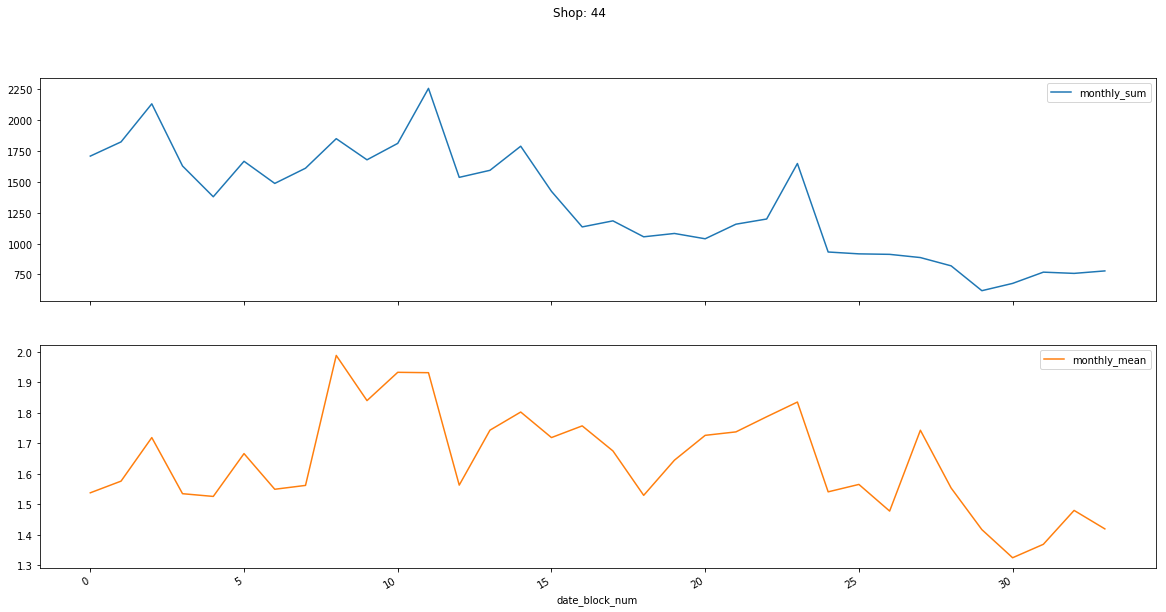

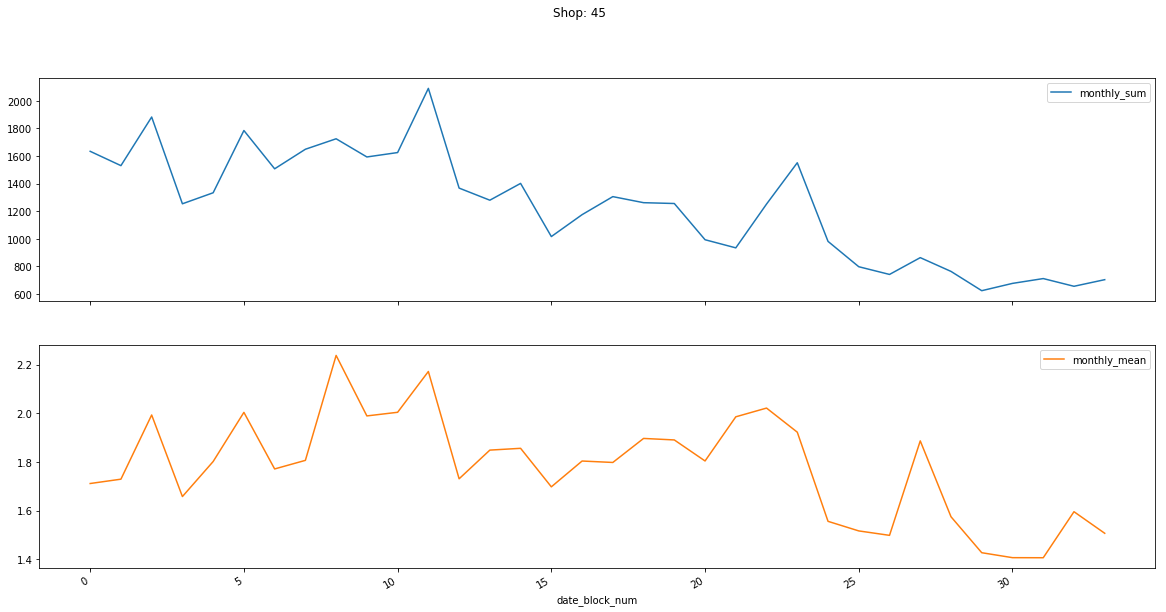

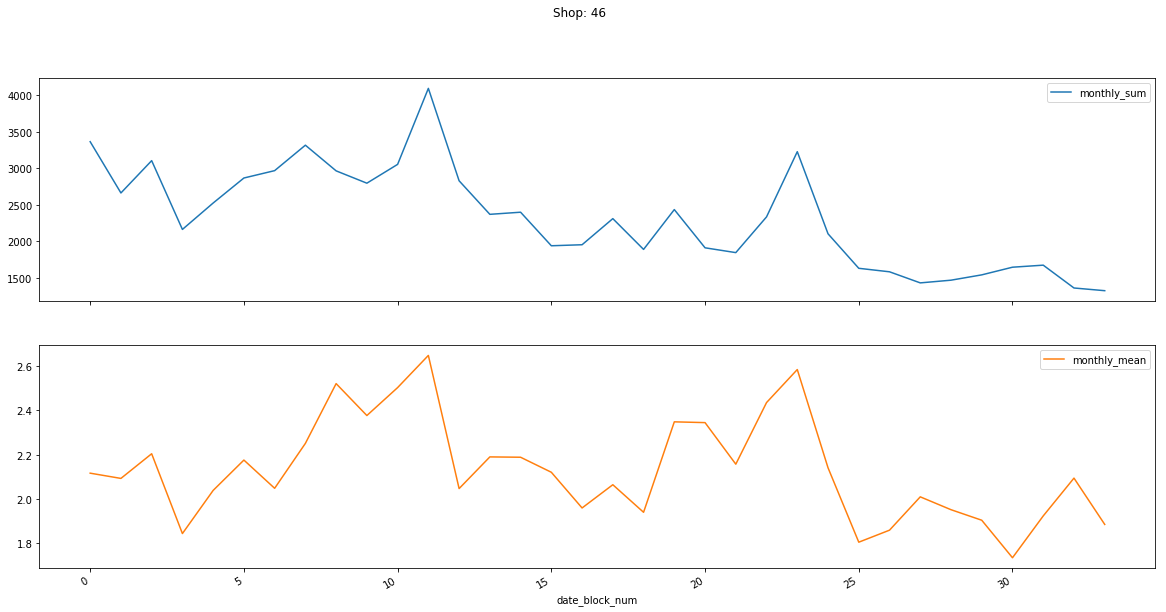

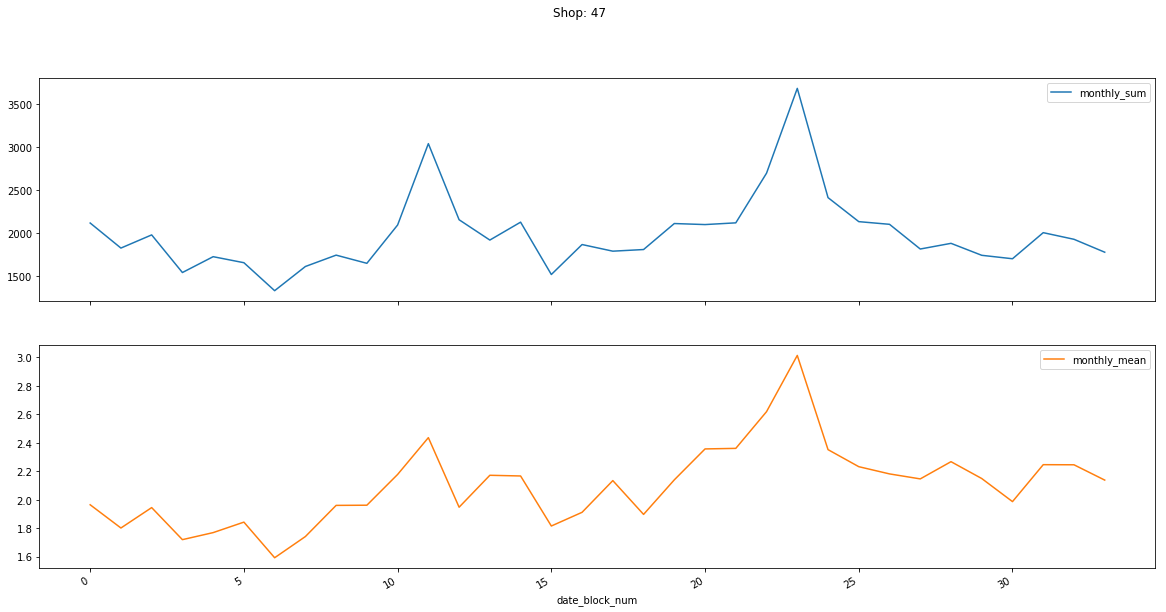

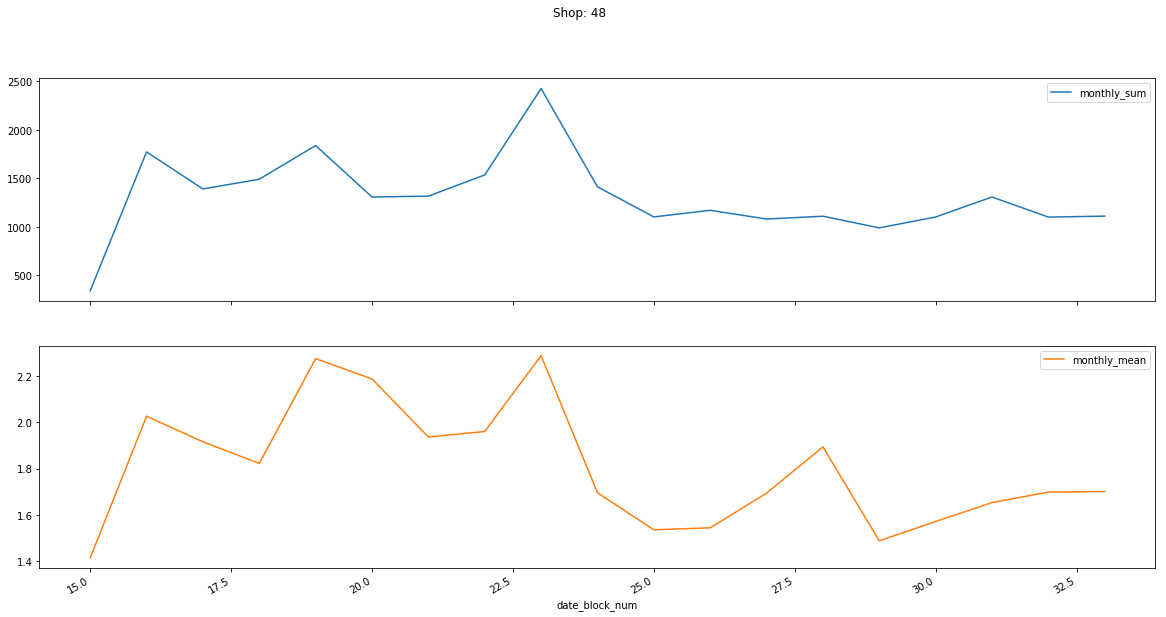

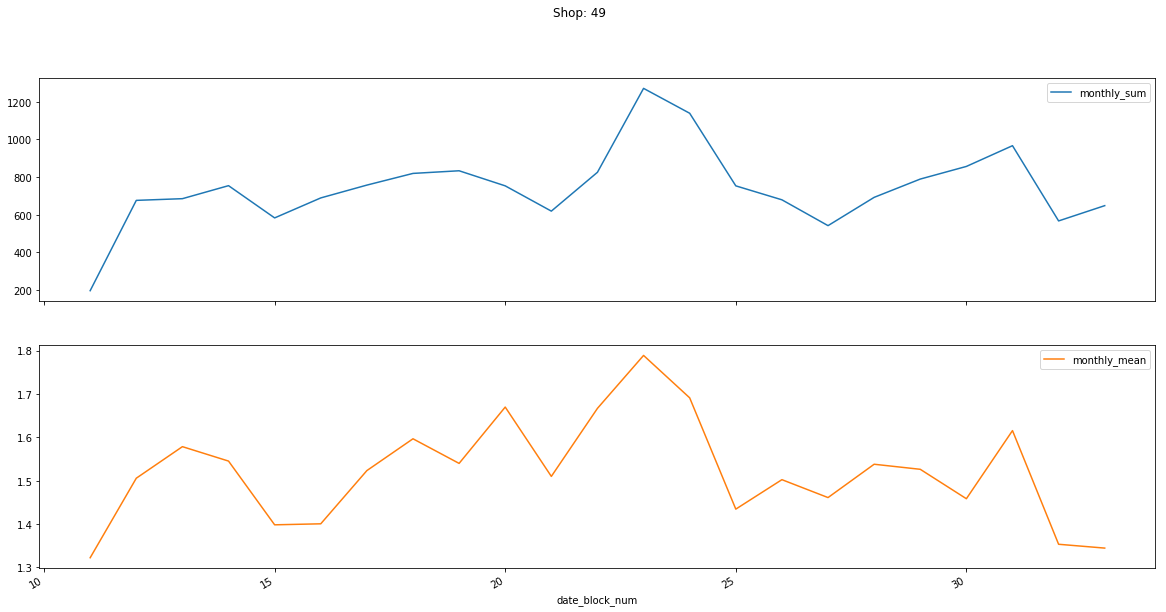

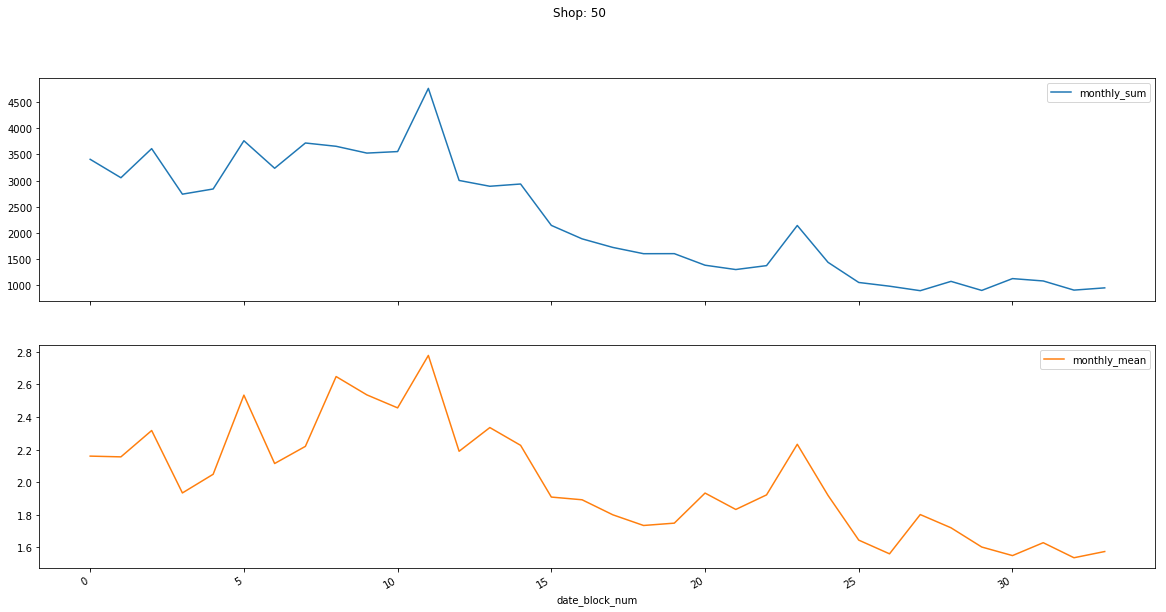

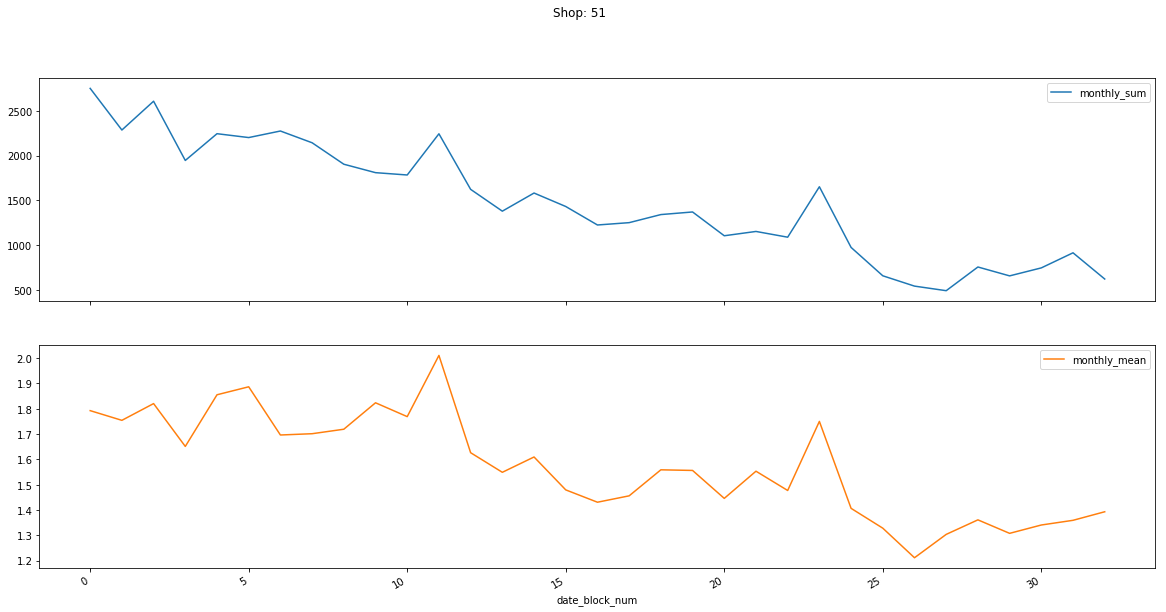

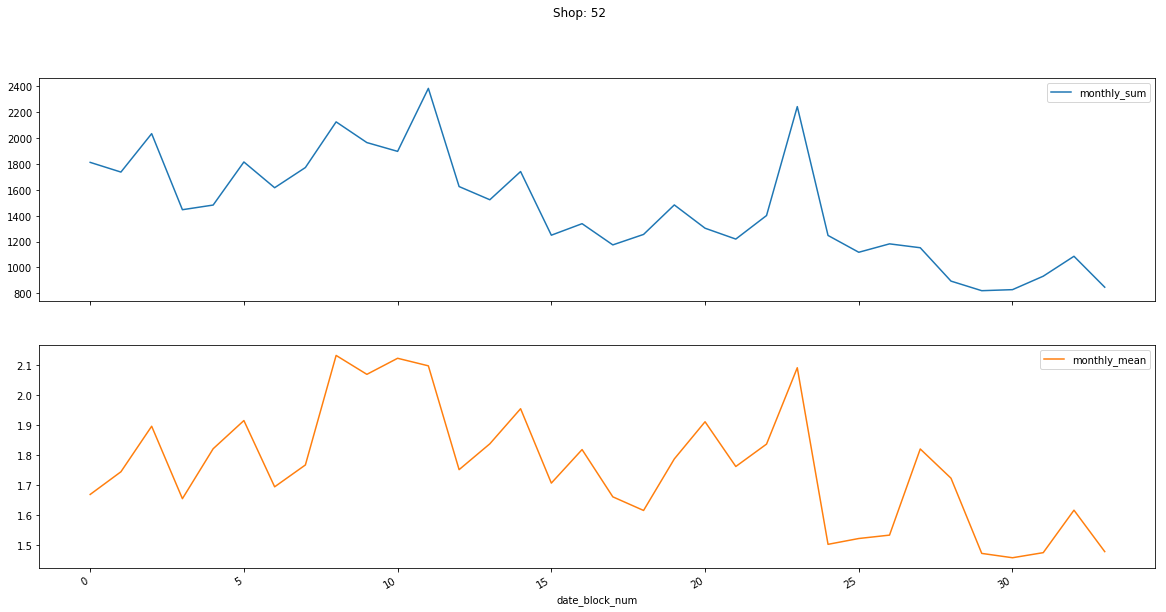

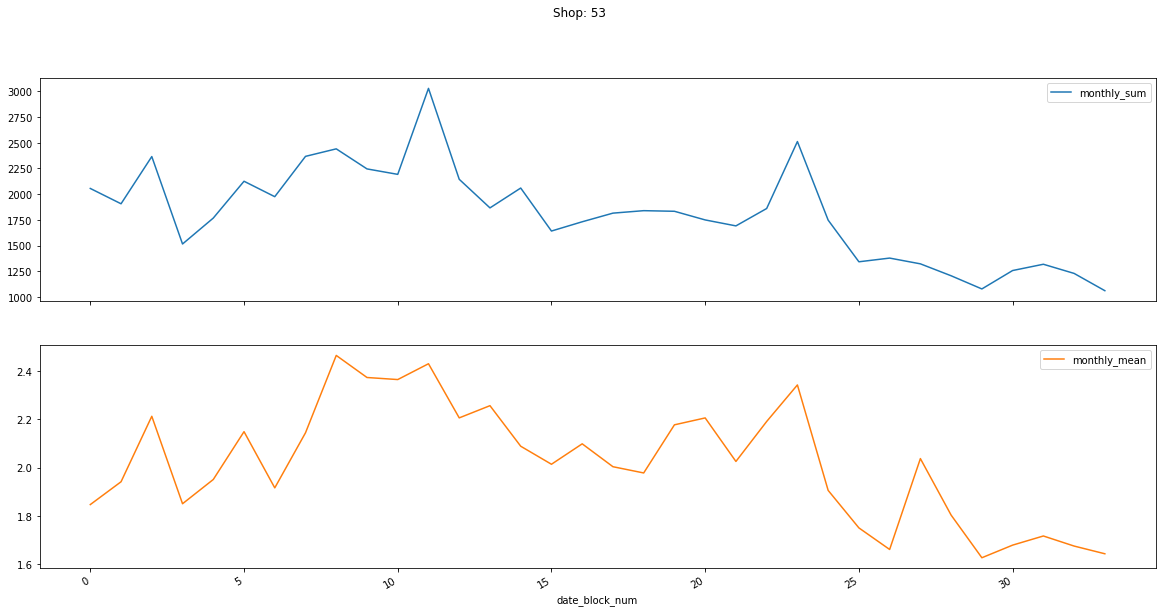

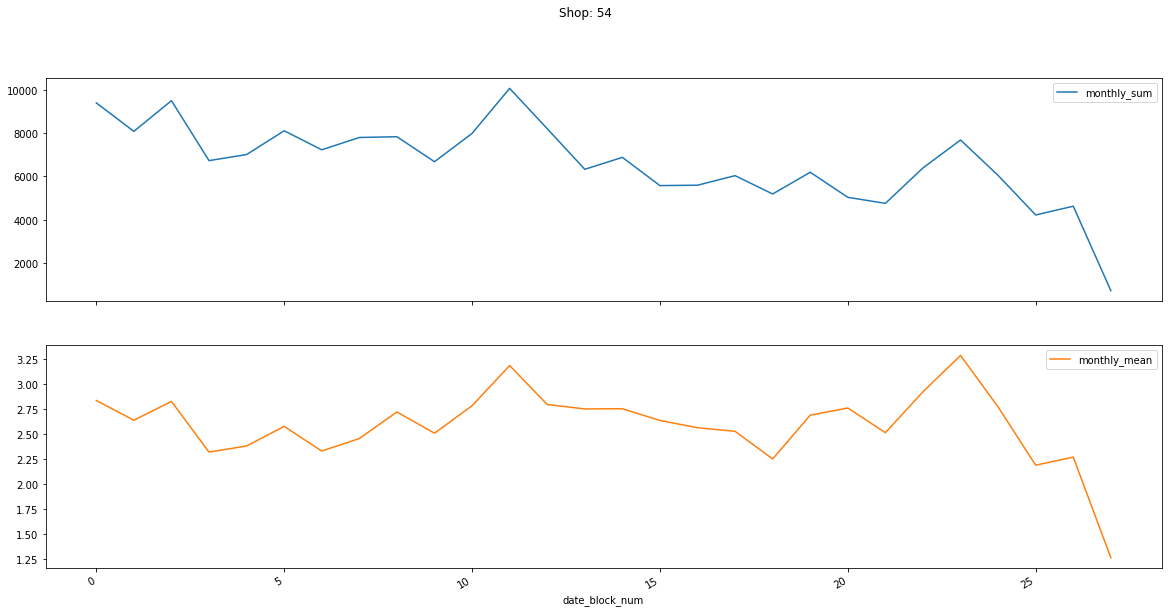

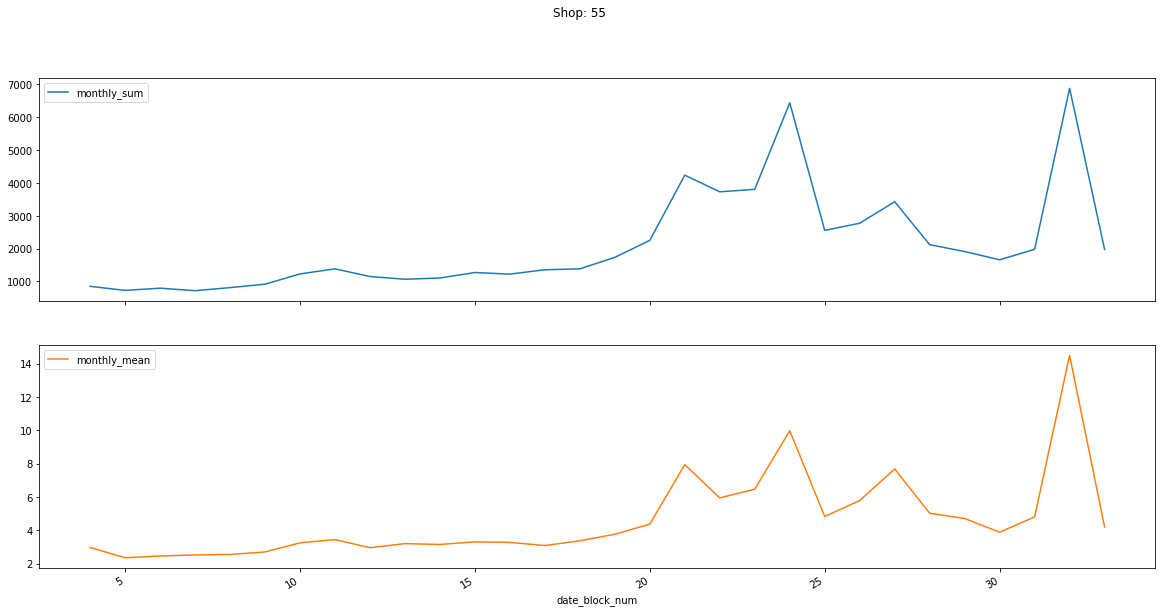

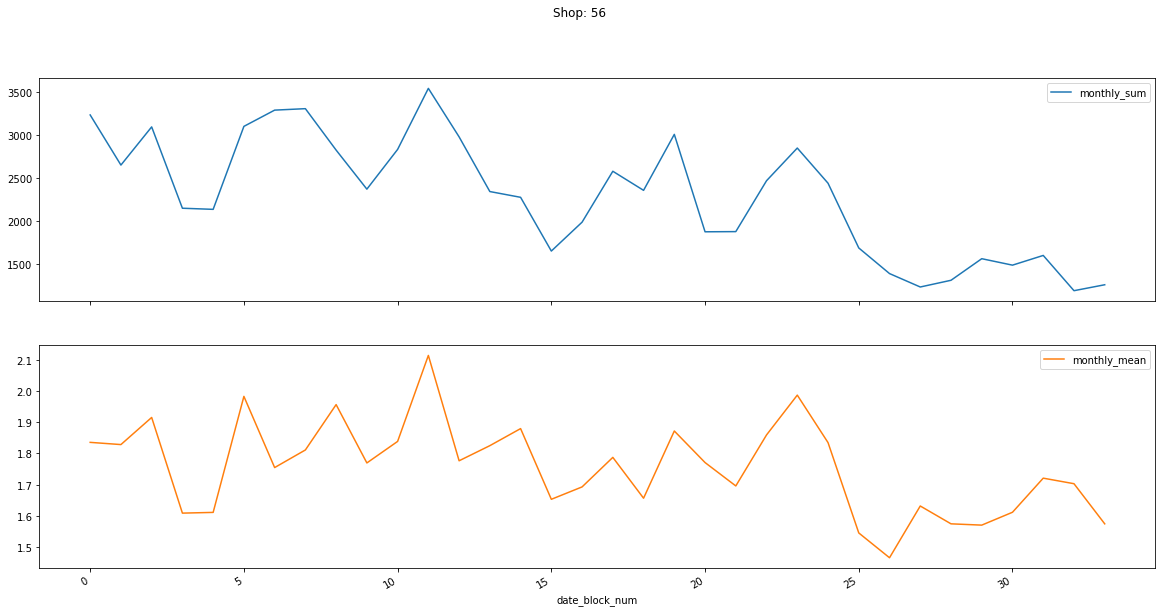

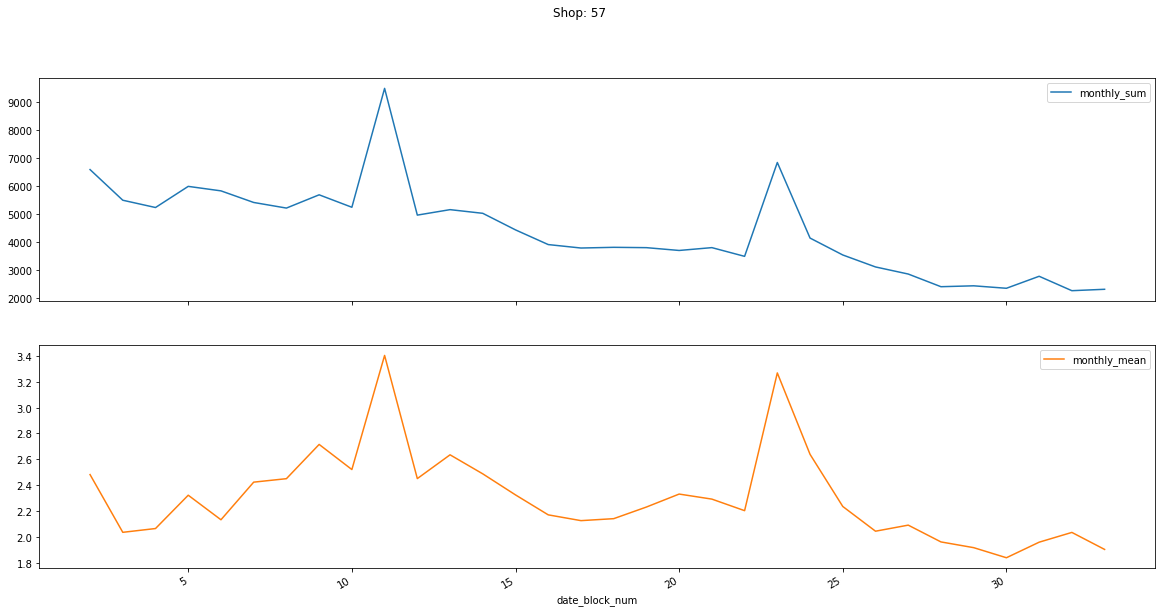

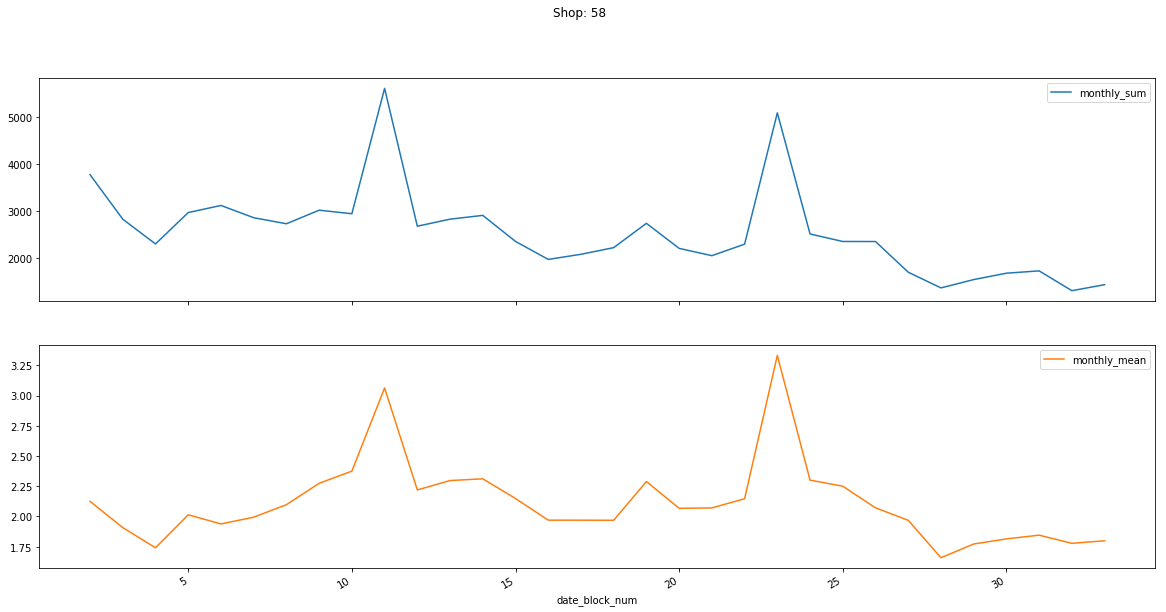

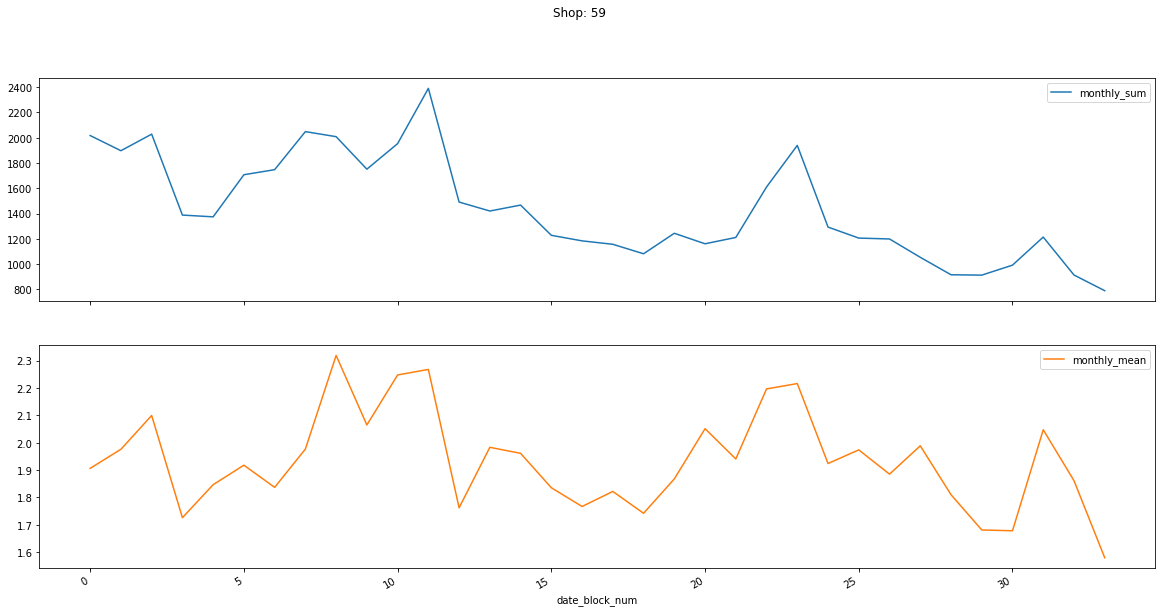

In [18]:
temp = ShopMonthlyPerformance.copy().groupby(['shop_id'],as_index=False)
for key, group in temp:
    group.plot(subplots=True,x='date_block_num',y=['monthly_sum','monthly_mean'],kind="line",figsize=(20,10),title="Shop: "+str(key))

<h2>Item wise Monthly Performance</h2>

In [19]:
#Item wise Monthly Performance
ItemMonthlyPerformanceSum = trainingMonthSet.copy().groupby(['item_id','date_block_num'],as_index=False).agg({'item_cnt_month':'sum'}).astype(np.int32)
ItemMonthlyPerformanceMean = trainingMonthSet.copy().groupby(['item_id','date_block_num'],as_index=False).agg({'item_cnt_month':np.mean})
ItemMonthlyPerformance = pd.merge(ItemMonthlyPerformanceSum, ItemMonthlyPerformanceMean, how='left', on=['item_id','date_block_num'])
ItemMonthlyPerformance.columns = ['item_id','date_block_num','monthly_sum','monthly_mean']
ItemMonthlyPerformance.head()

item_id  date_block_num  monthly_sum  monthly_mean
0        0              20            1           1.0
1        1              15            2           2.0
2        1              18            1           1.0
3        1              19            1           1.0
4        1              20            1           1.0

<h2>Item Category wise Monthly Performance</h2>
<p>In item category wise time plot also we can see that it sometimes follows the patters as same as pattern</p>

In [25]:
#Item Category wise Monthly Performance
ItemCatMonthlyPerformanceSum = trainingMonthSet.copy().groupby(['item_category_id','date_block_num'],as_index=False).agg({'item_cnt_month':'sum'}).astype(np.int32)
ItemCatMonthlyPerformanceMean = trainingMonthSet.copy().groupby(['item_category_id','date_block_num'],as_index=False).agg({'item_cnt_month':np.mean})
ItemCatMonthlyPerformance = pd.merge(ItemCatMonthlyPerformanceSum, ItemCatMonthlyPerformanceMean, how='left', on=['item_category_id','date_block_num'])
ItemCatMonthlyPerformance.columns = ['item_category_id','date_block_num','monthly_sum','monthly_mean']
ItemCatMonthlyPerformance.head()

item_category_id  date_block_num  monthly_sum  monthly_mean
0                 0               0            1           1.0
1                 0               1            1           1.0
2                 0               3            1           1.0
3                 1               0            1           1.0
4                 1               1            1           1.0

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


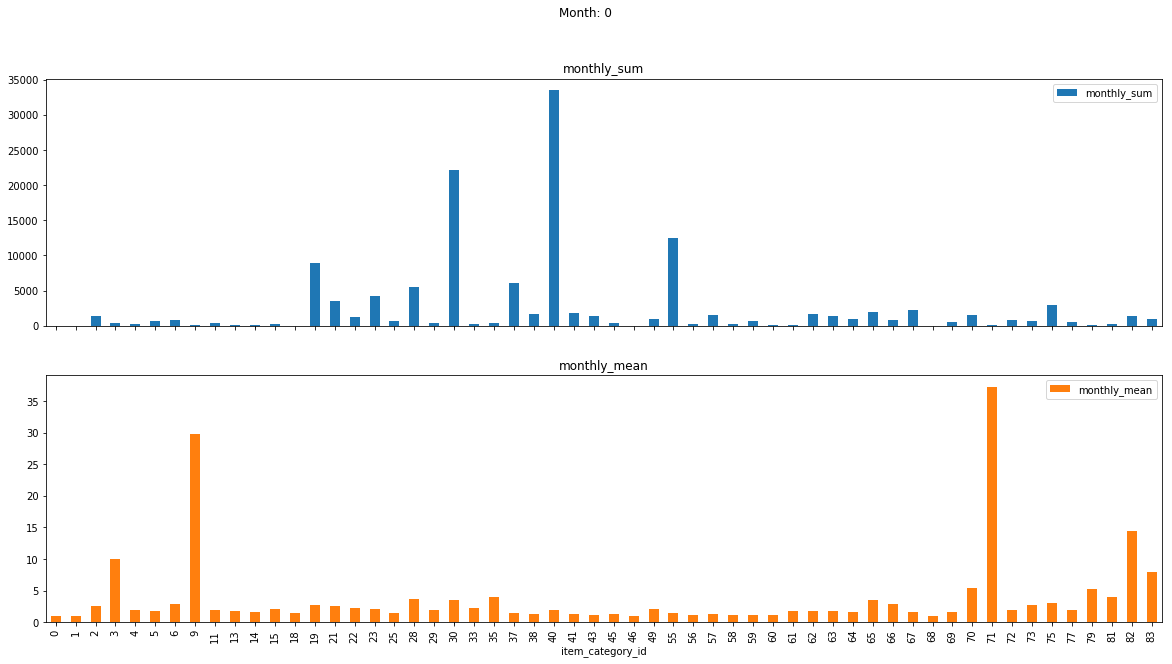

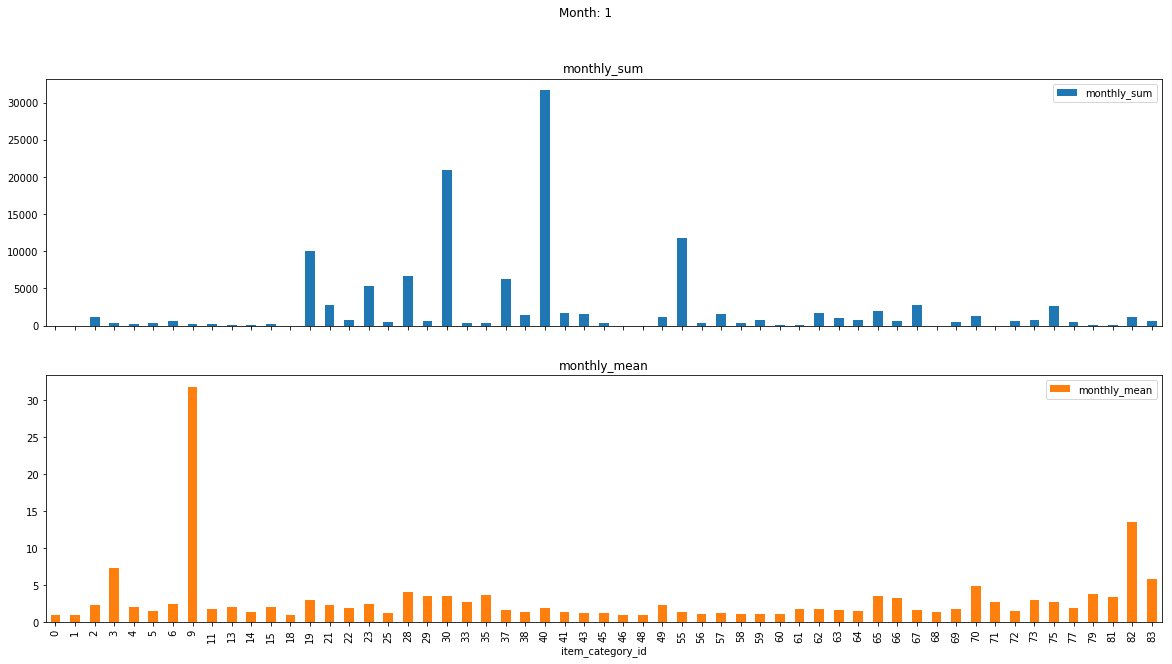

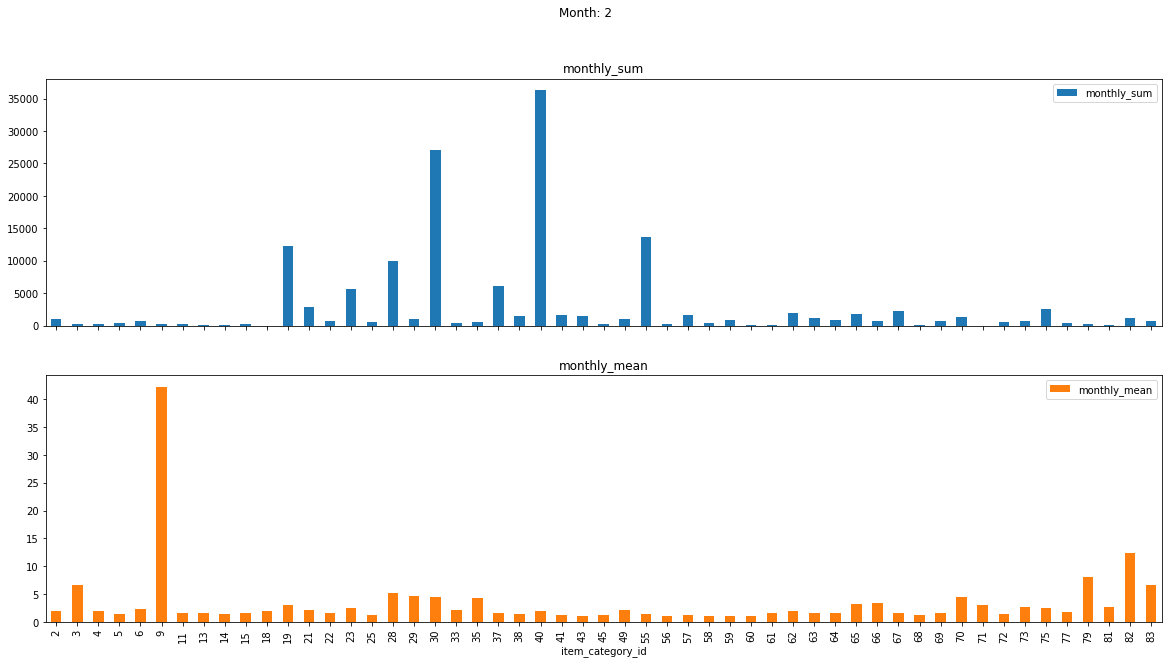

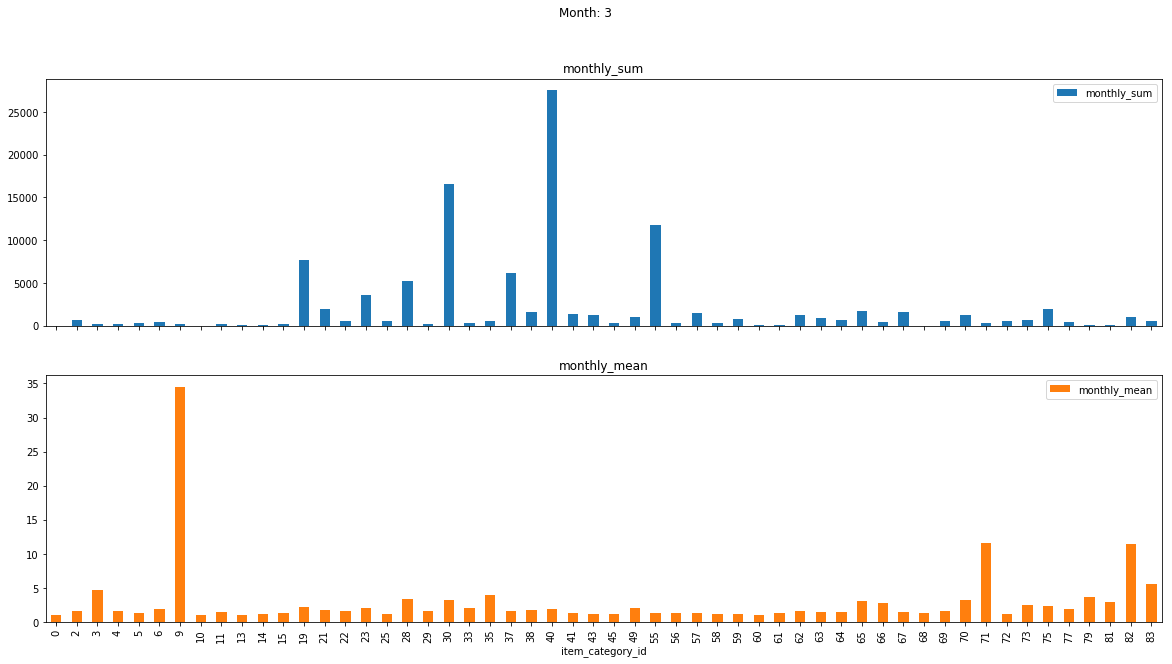

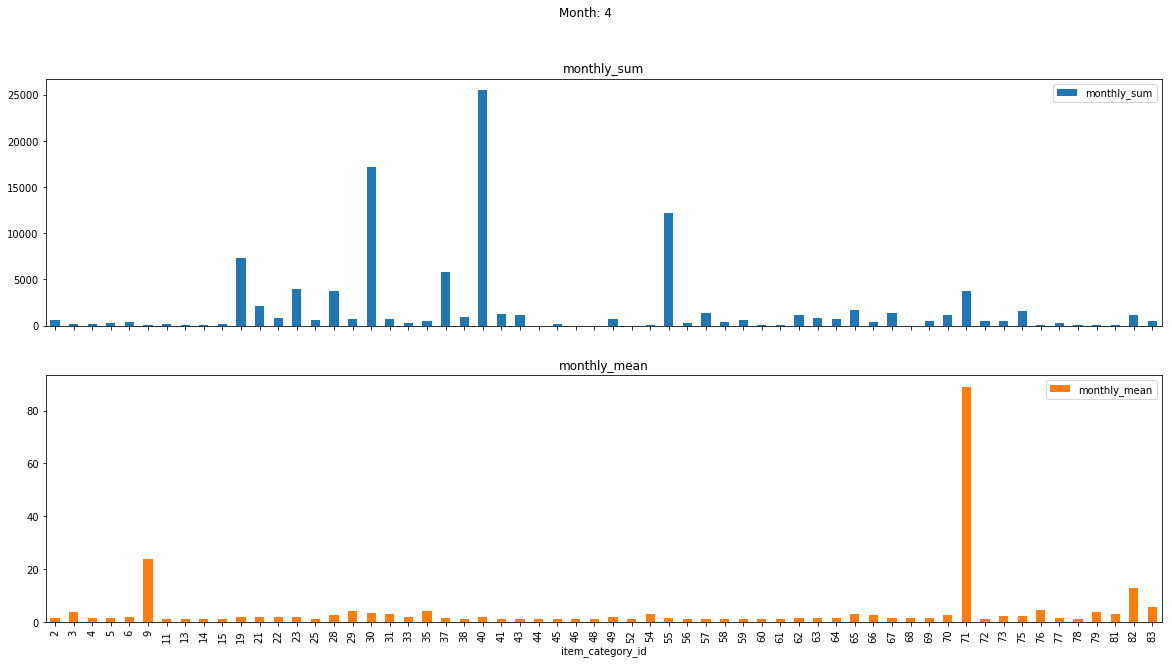

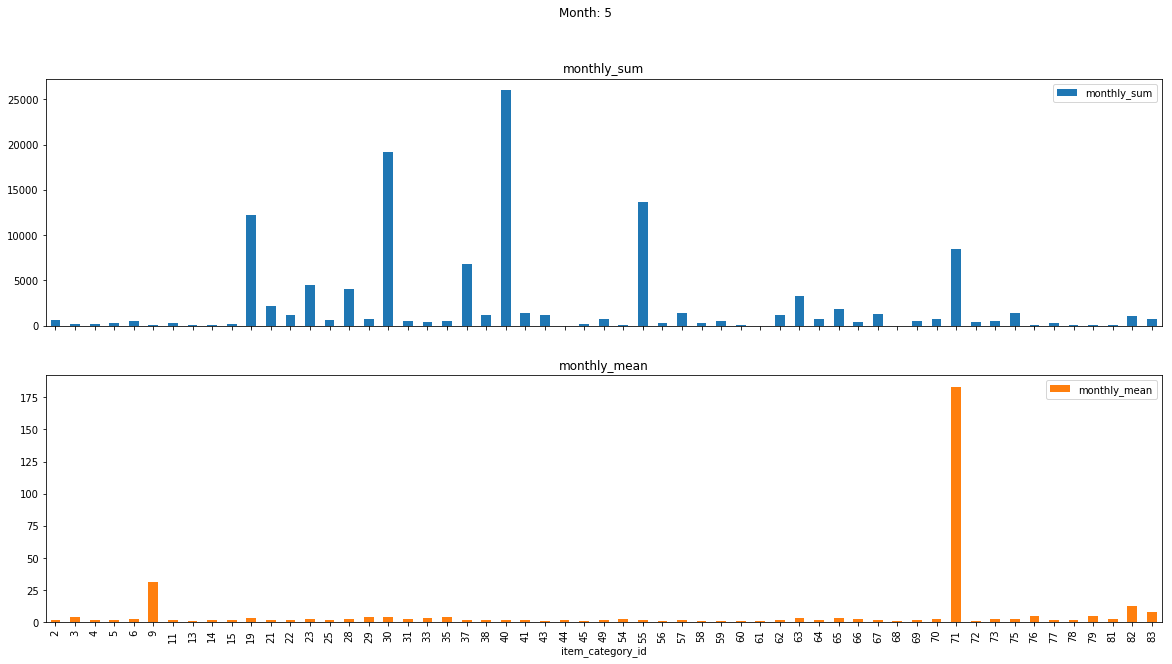

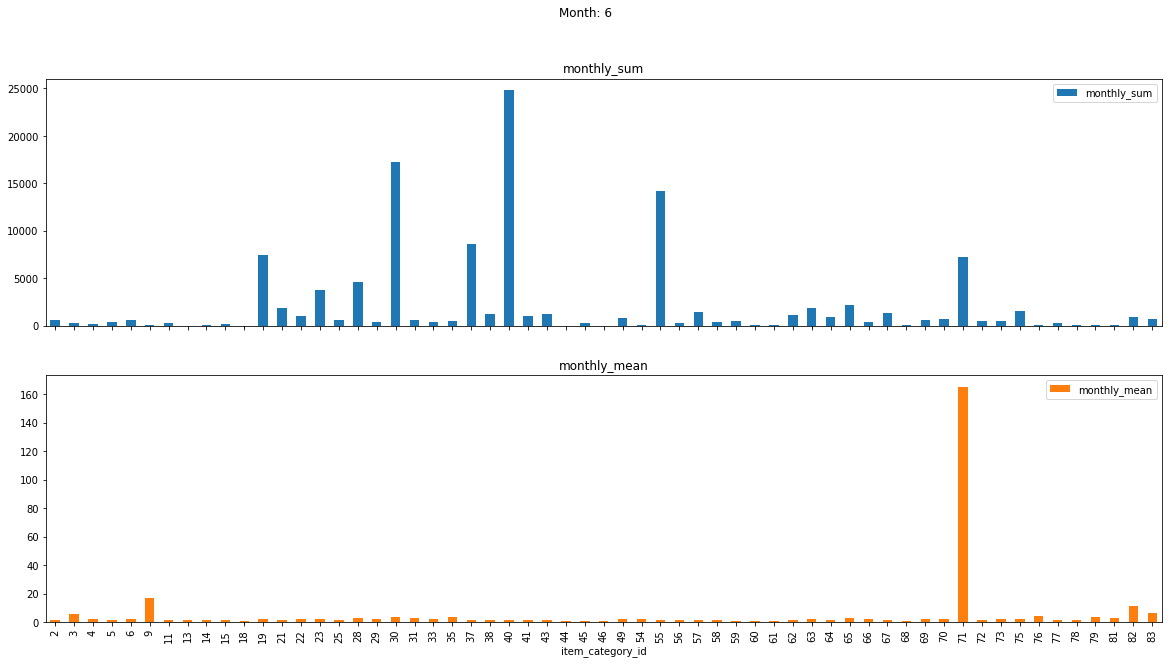

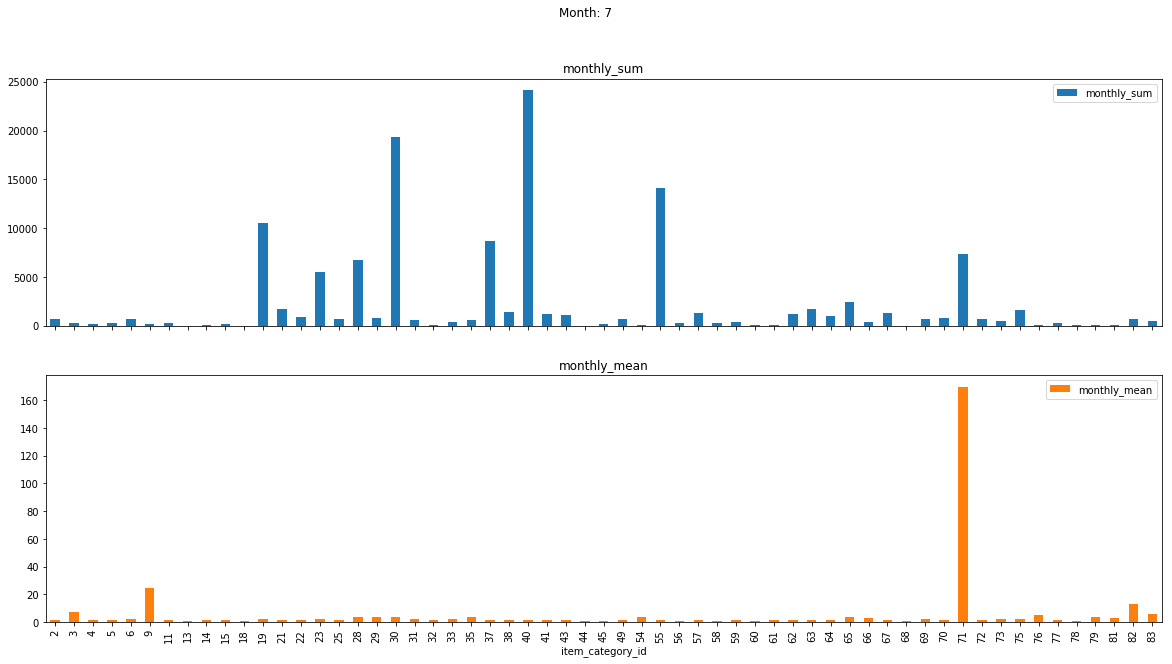

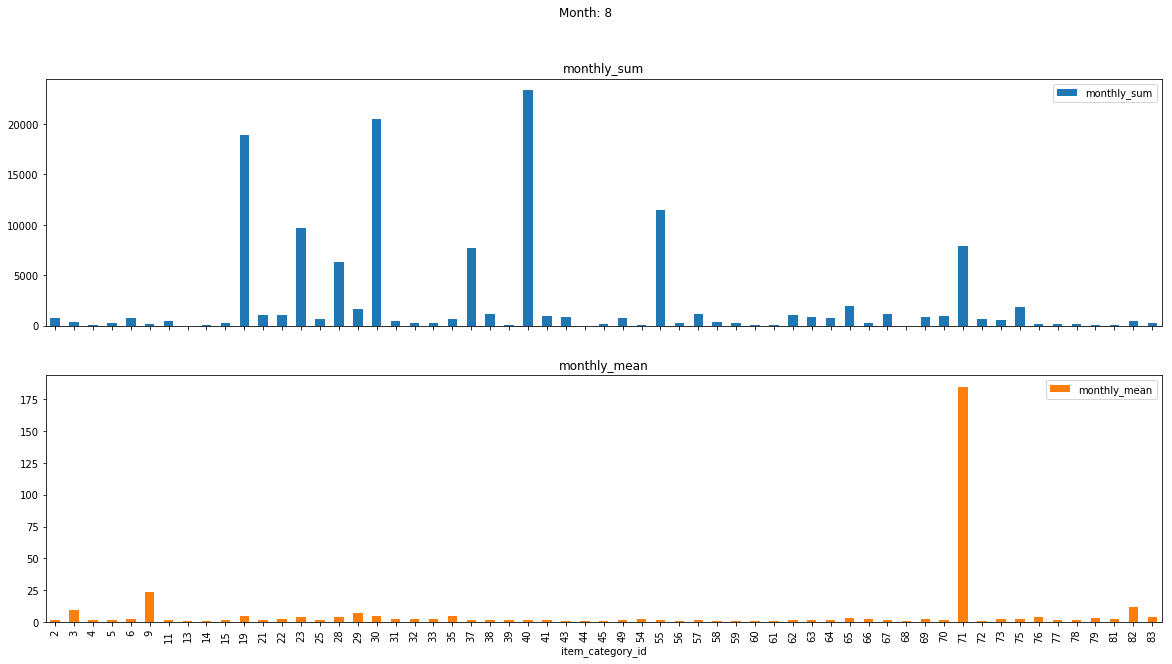

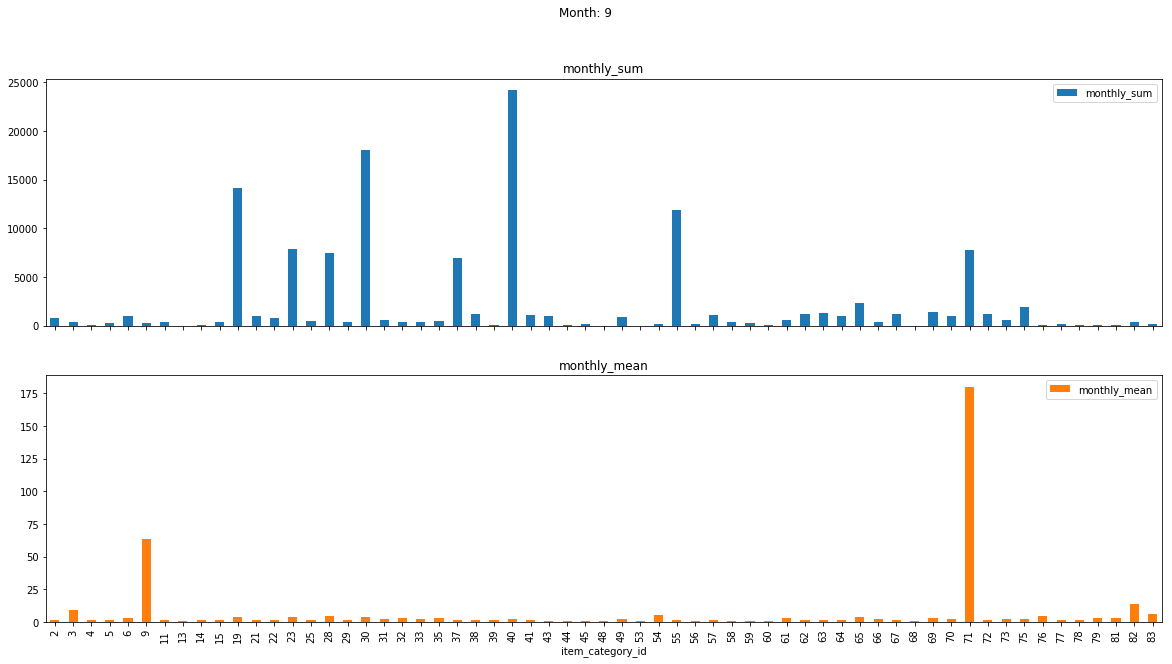

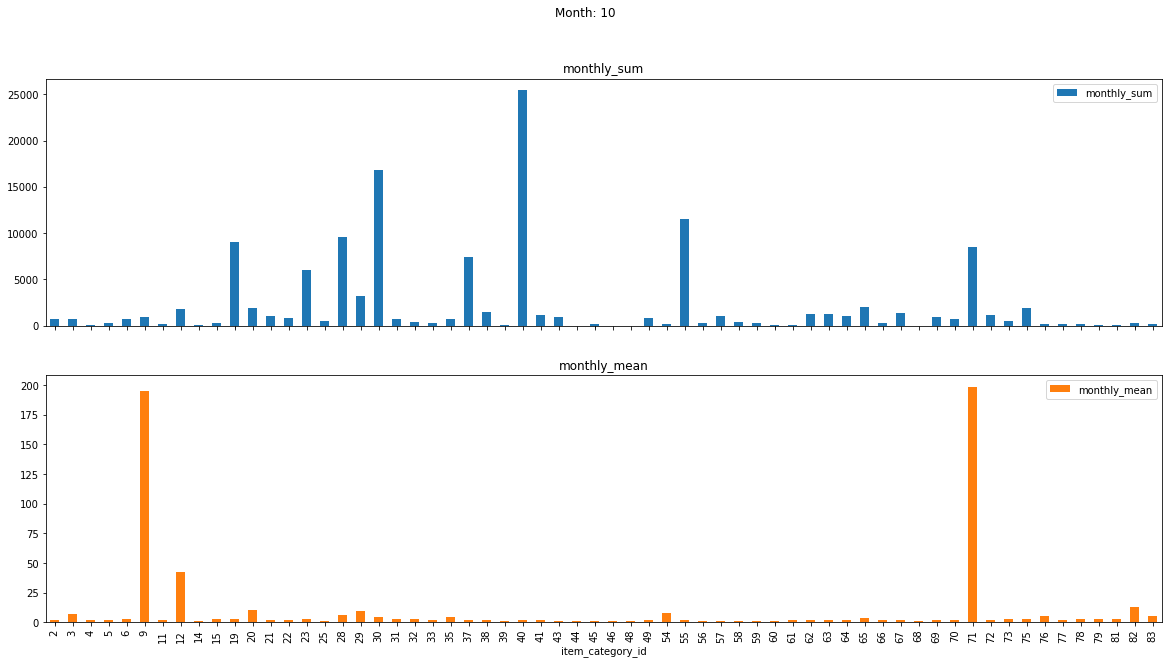

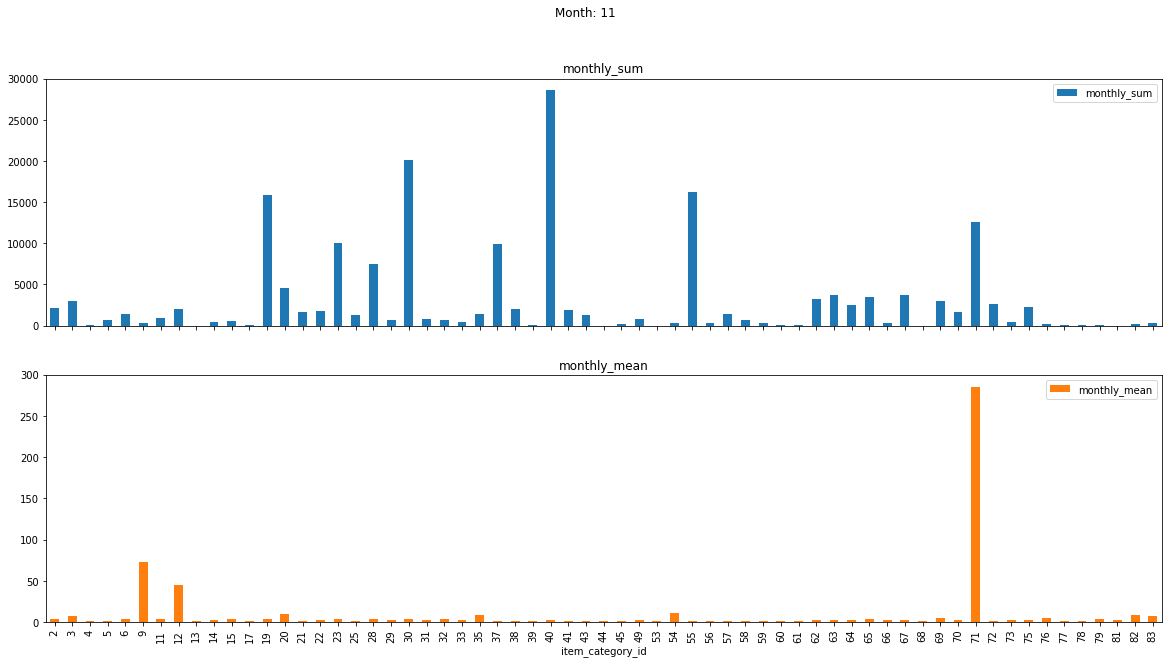

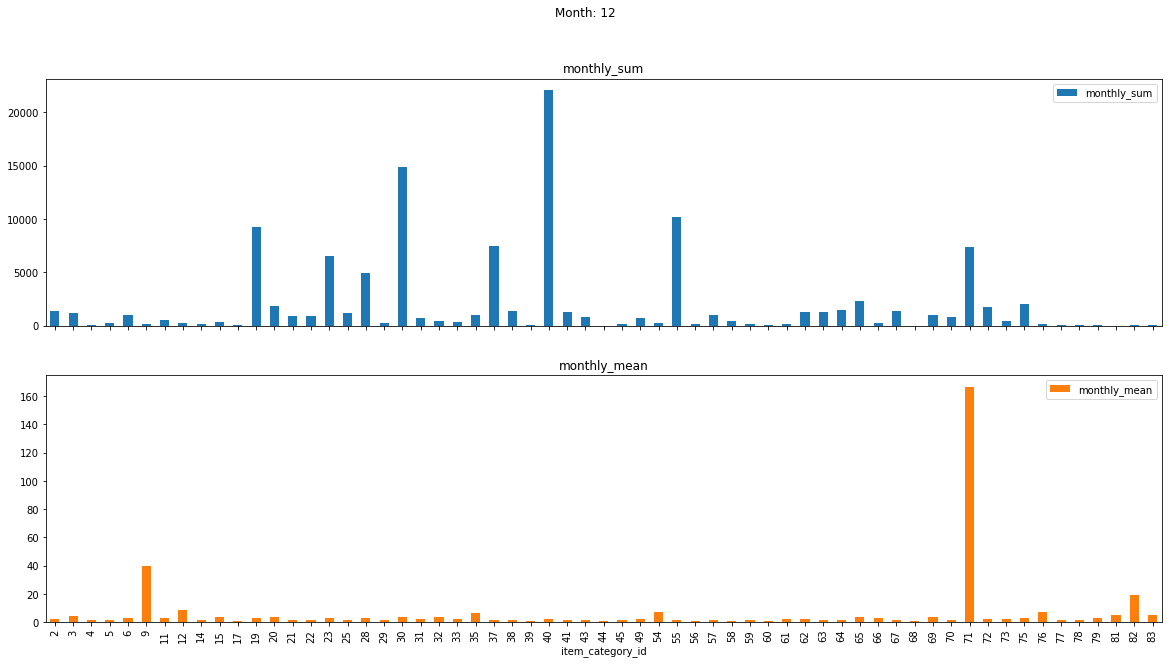

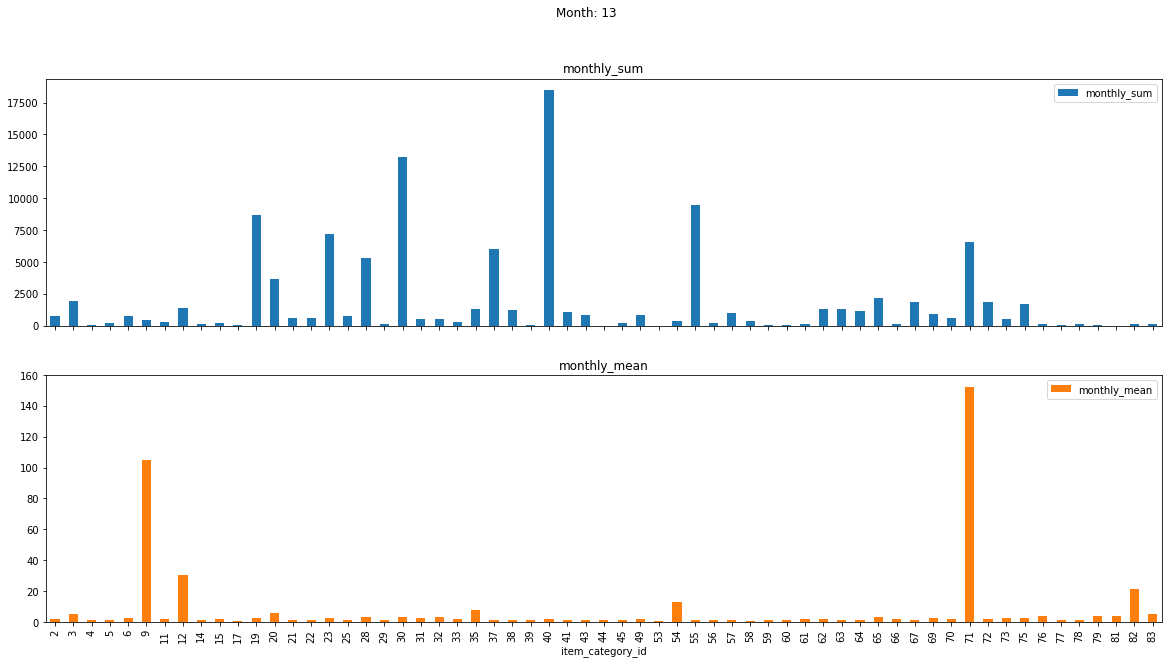

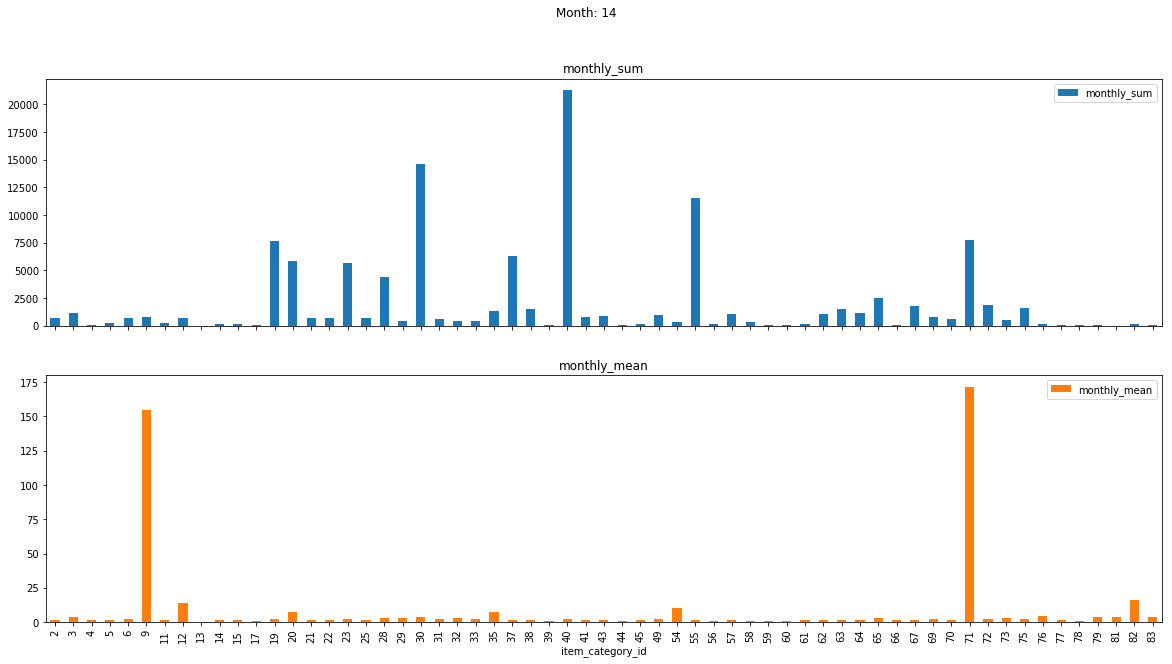

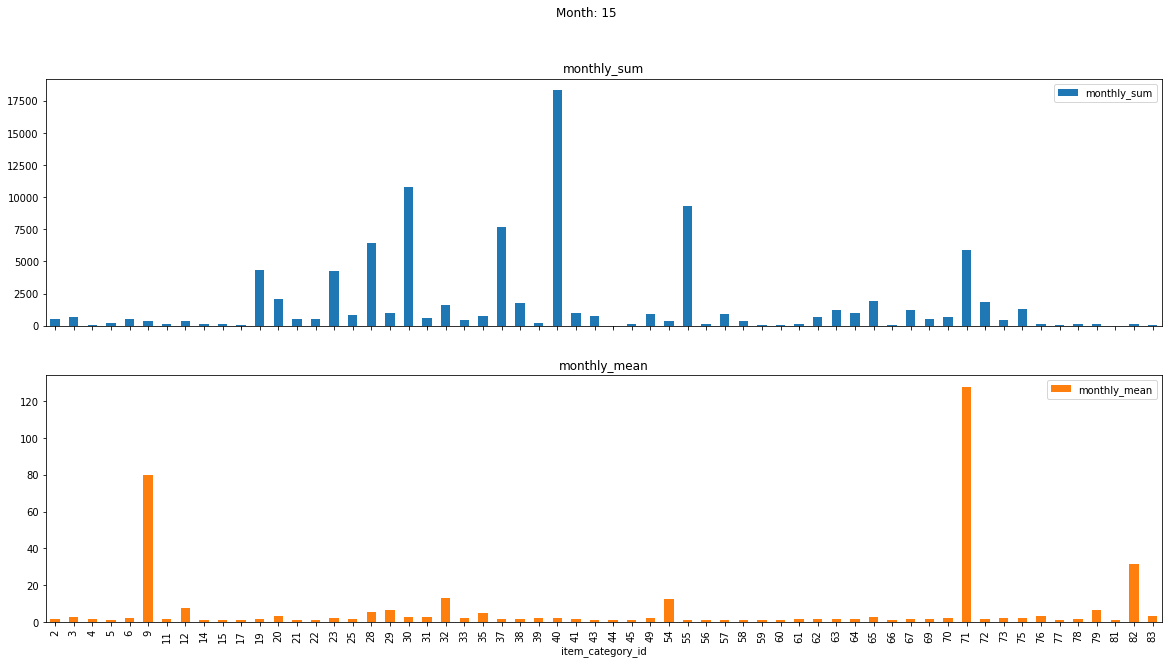

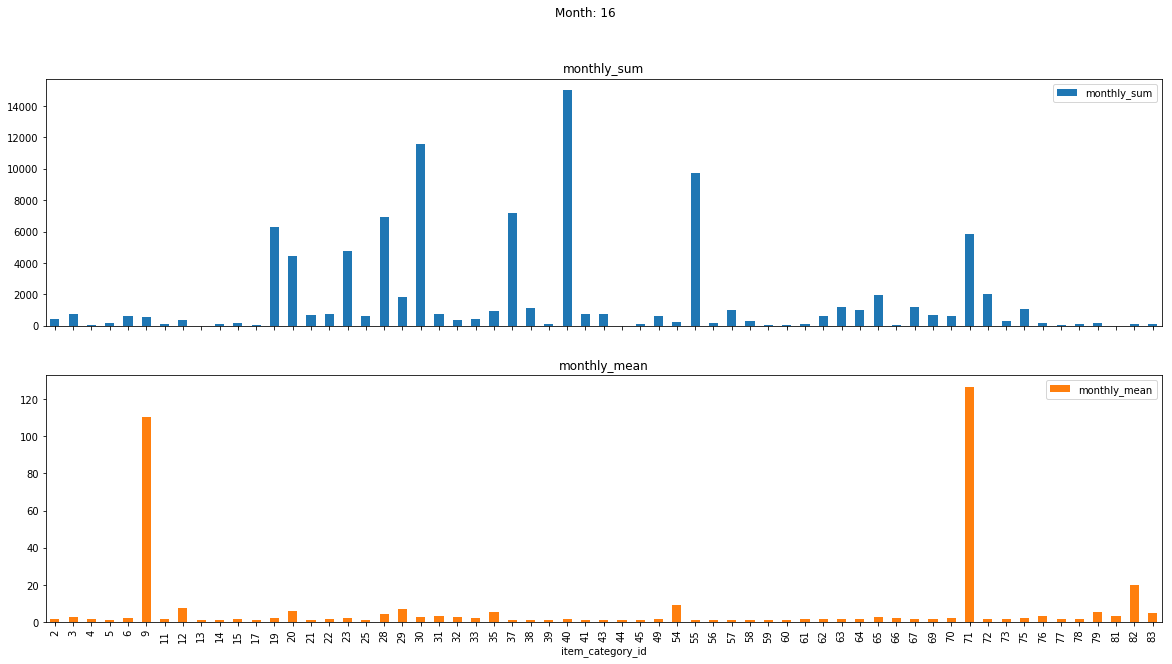

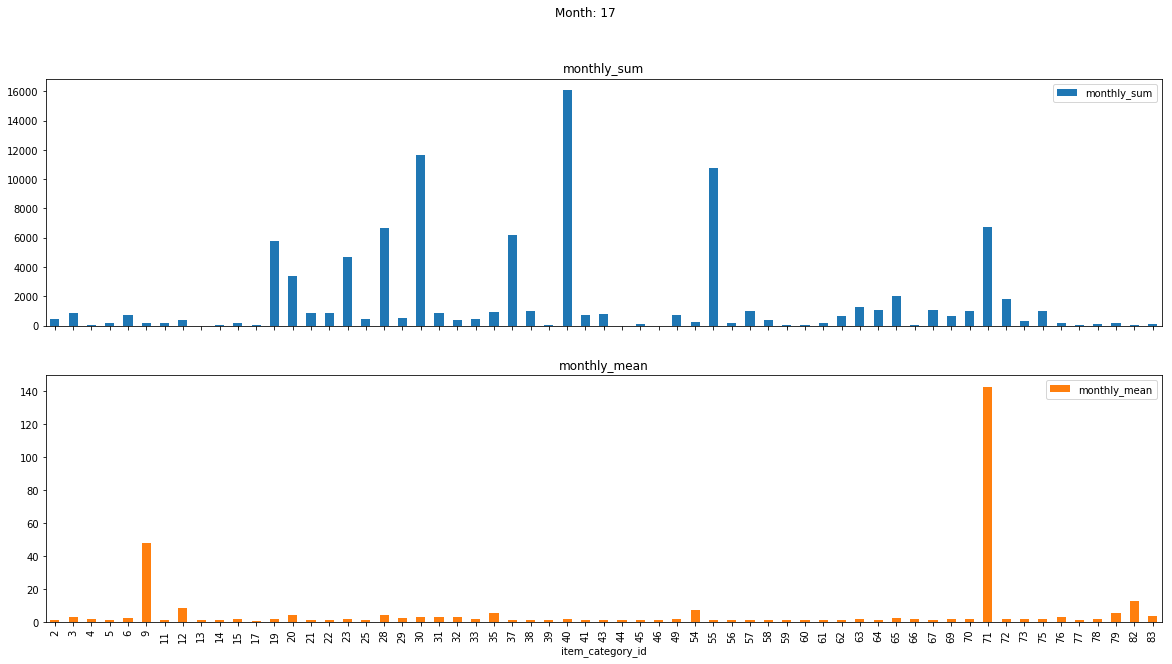

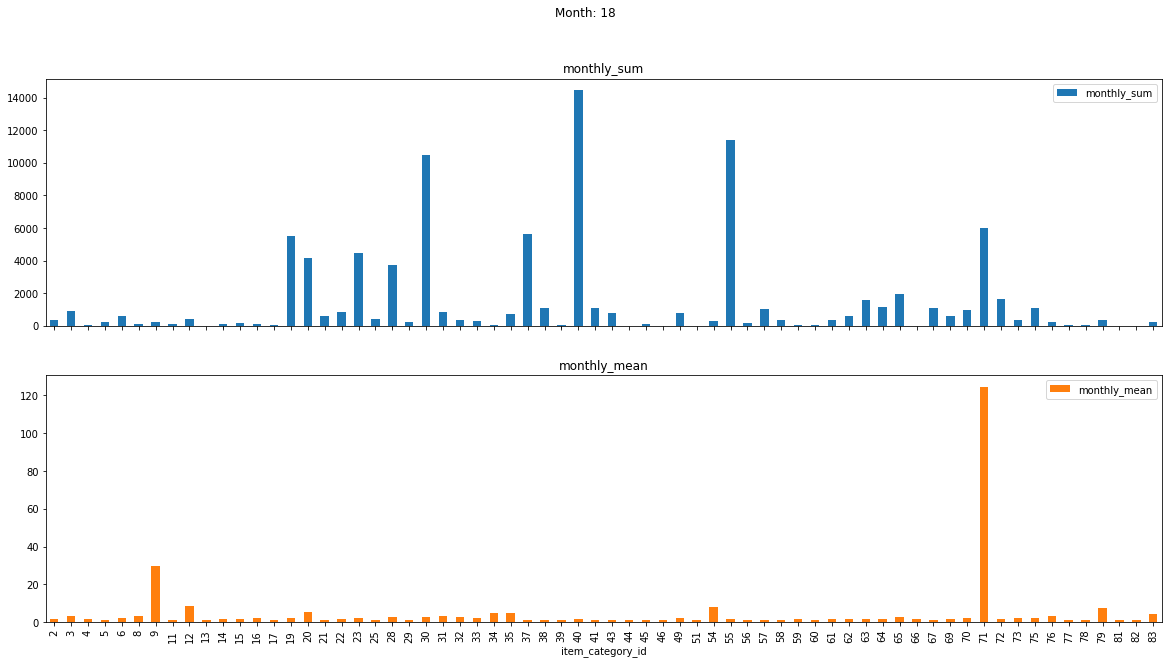

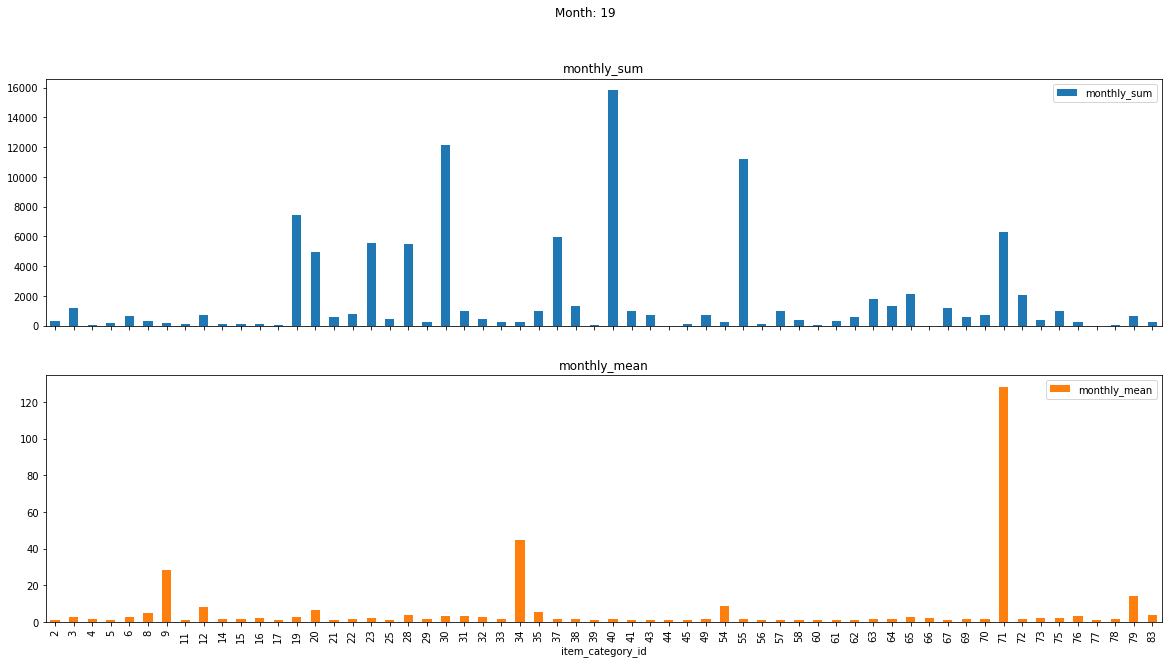

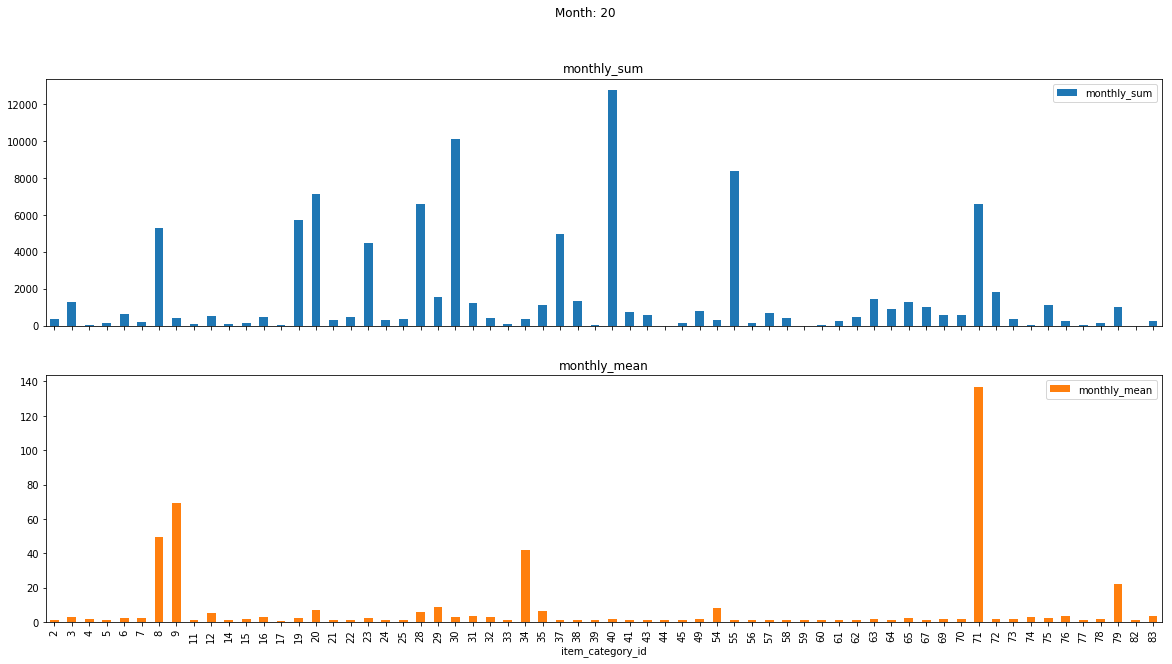

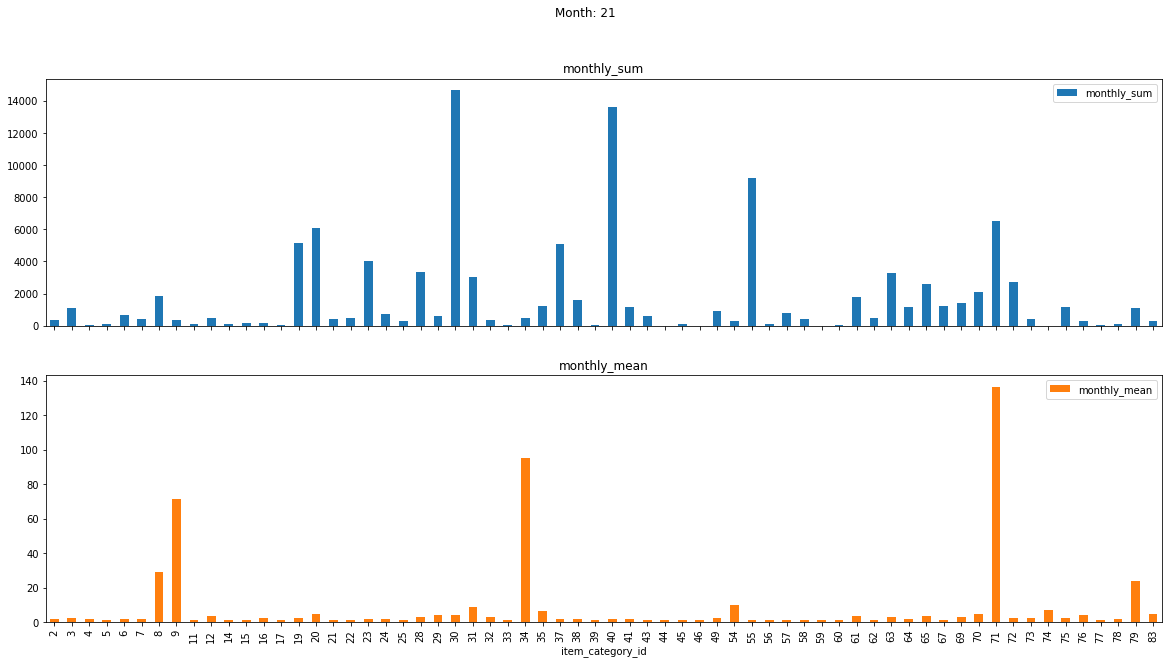

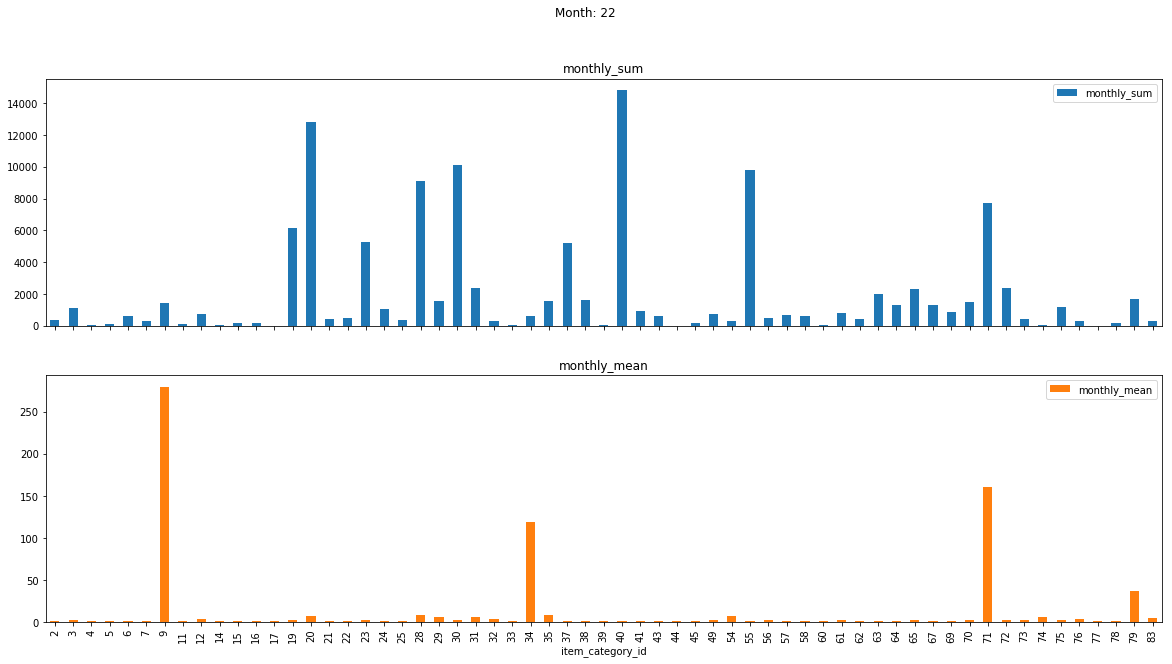

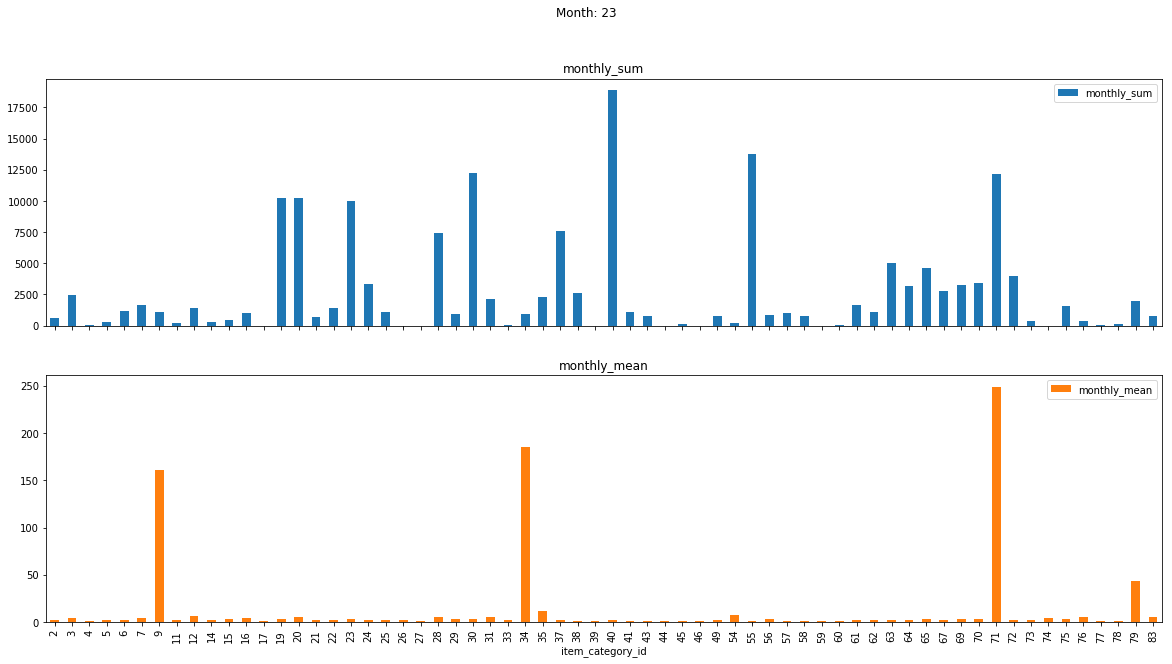

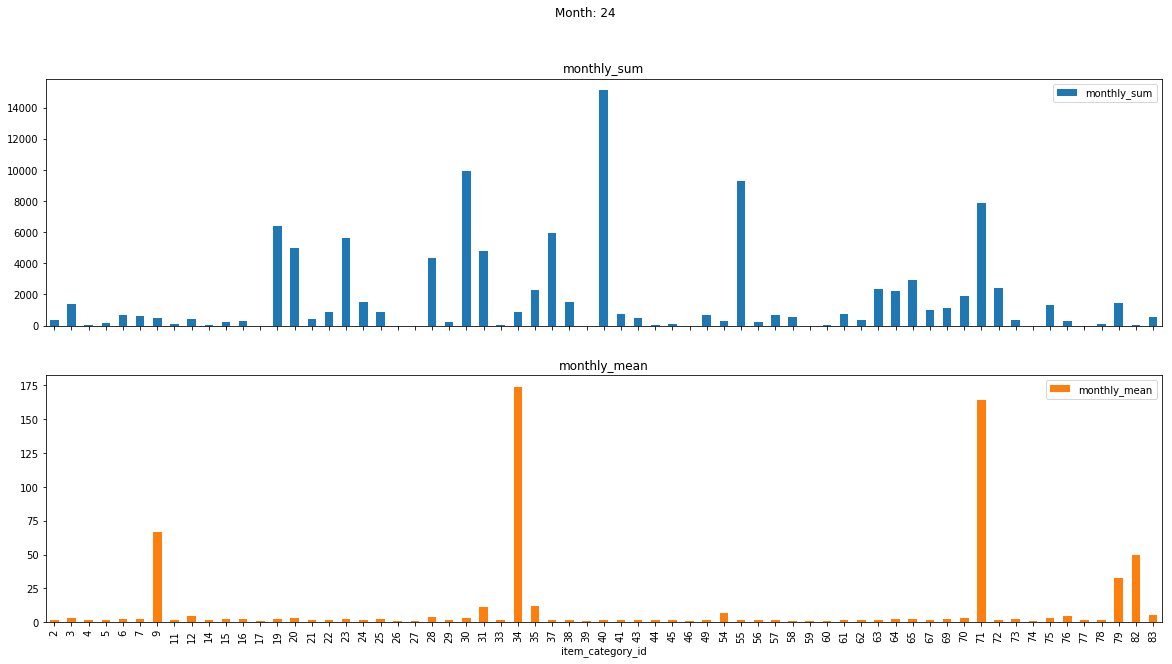

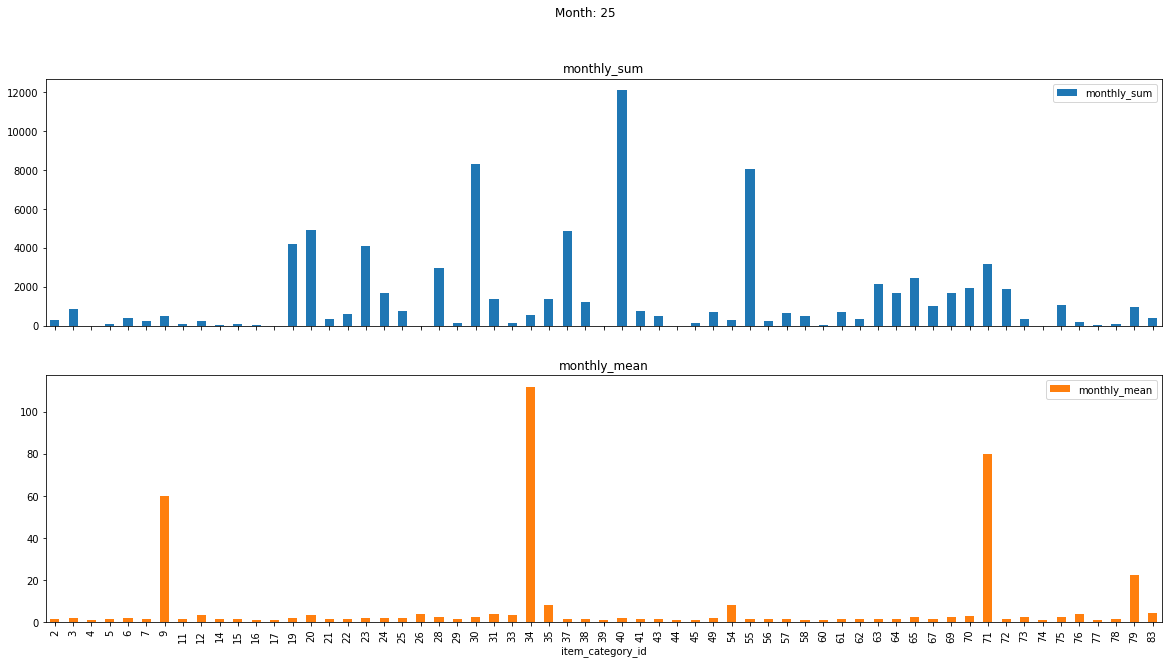

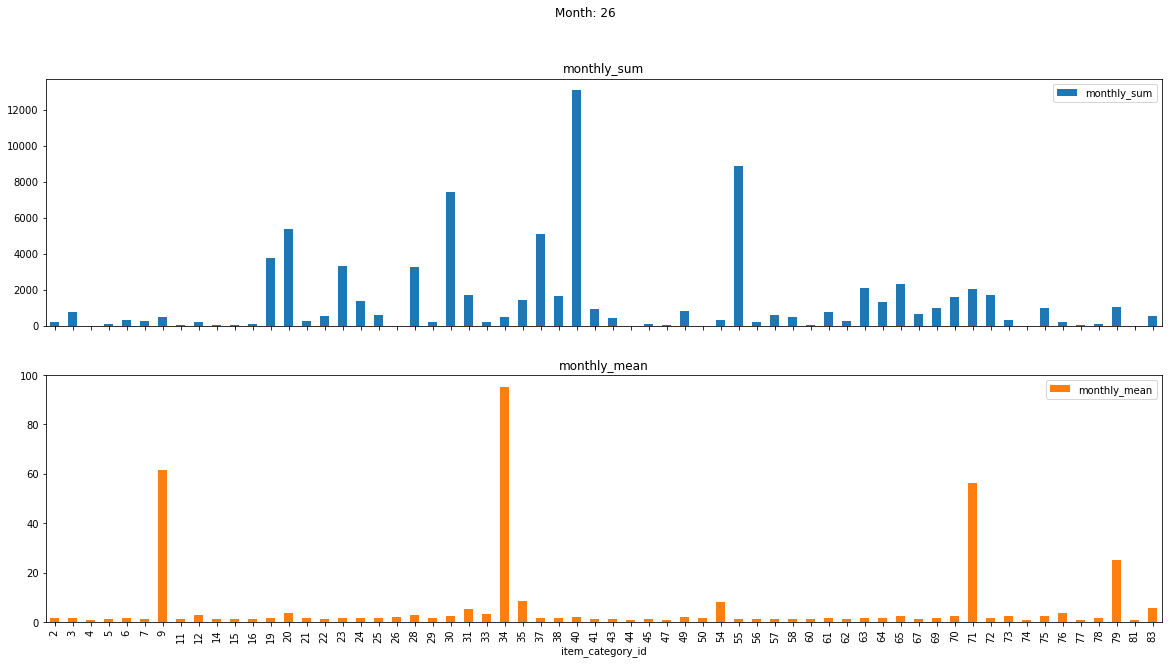

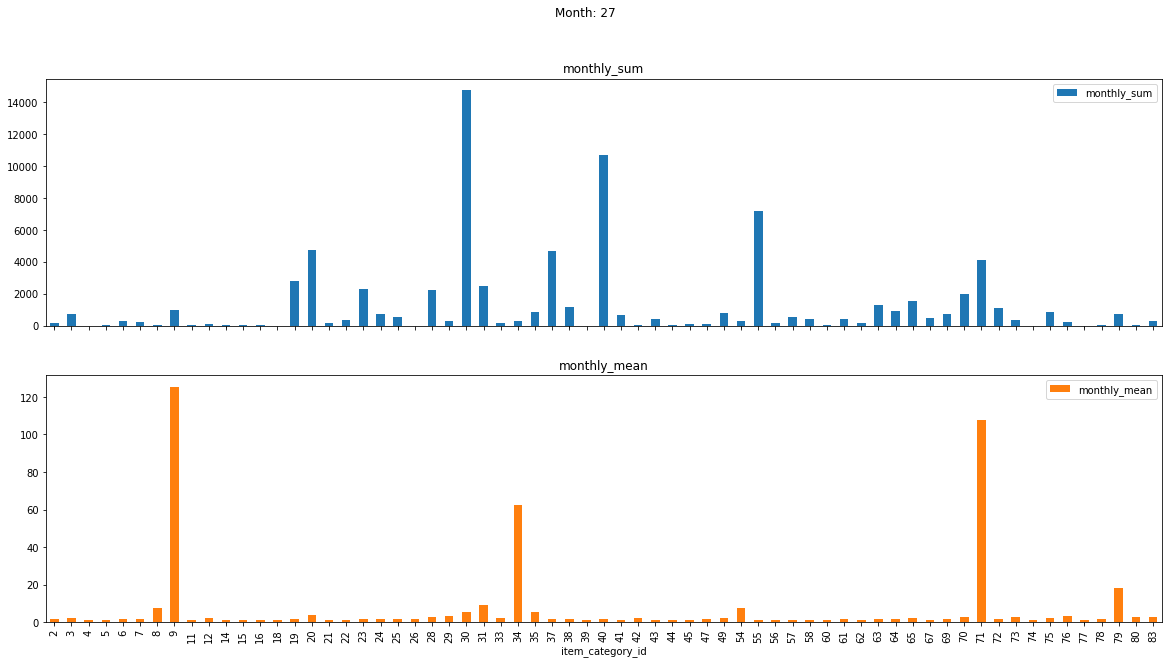

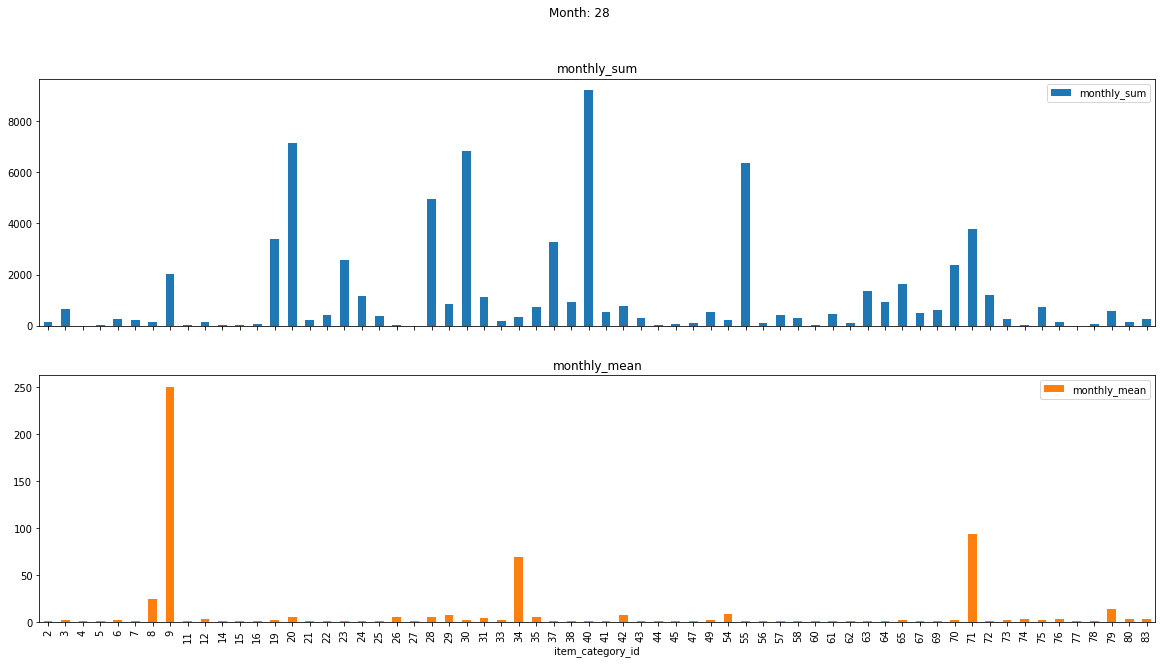

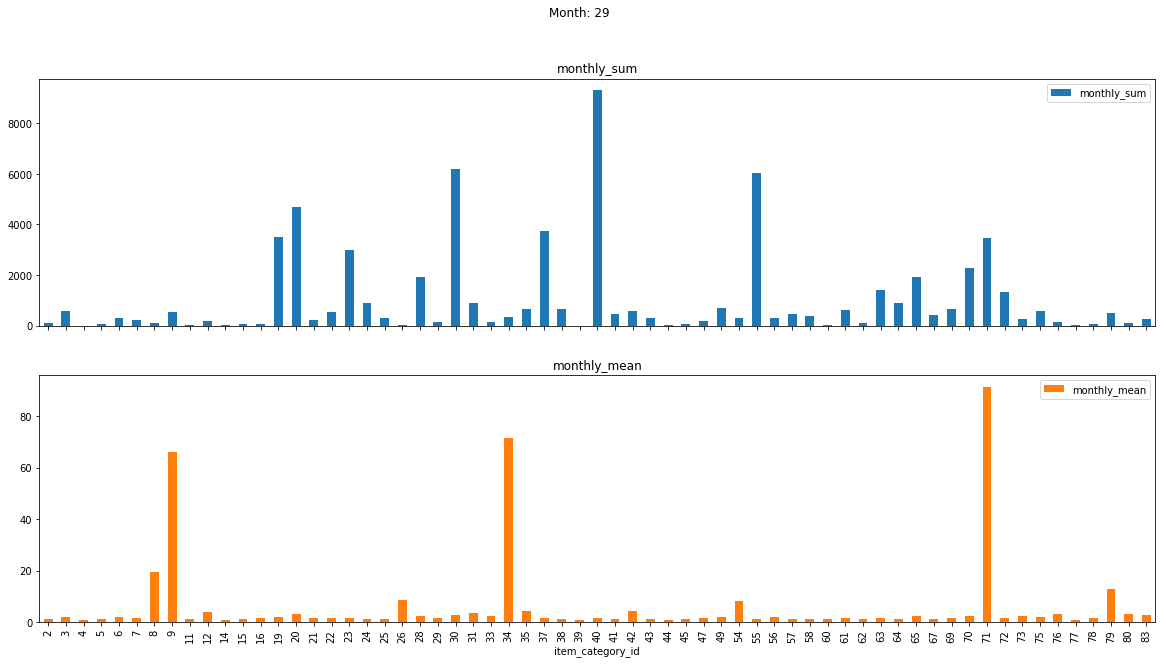

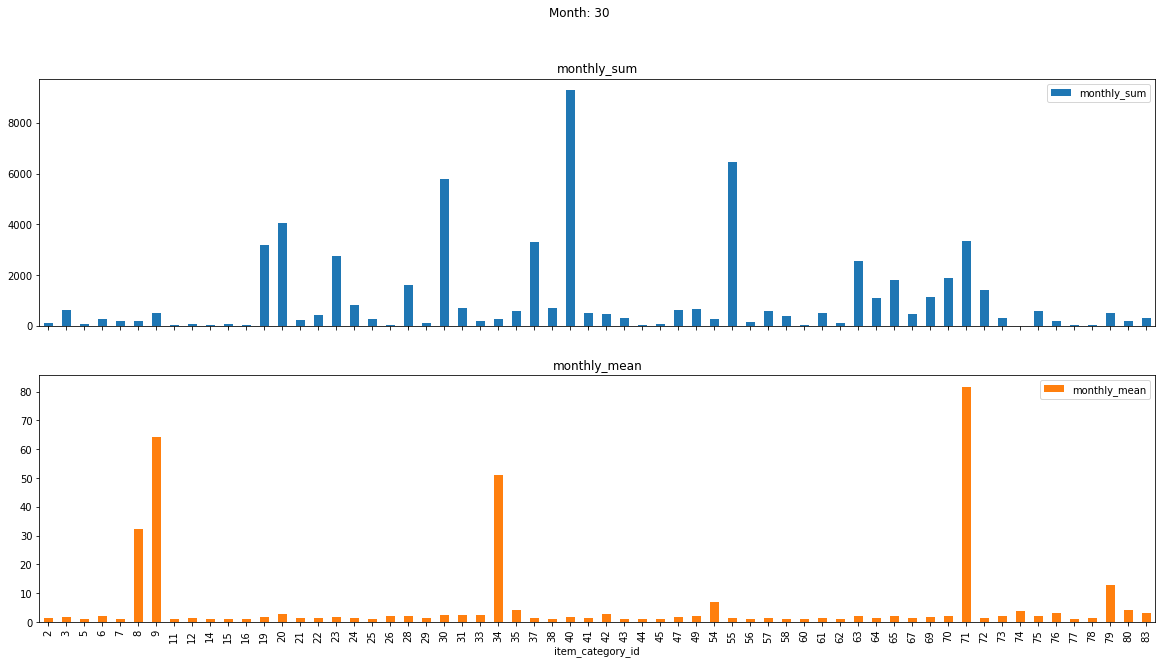

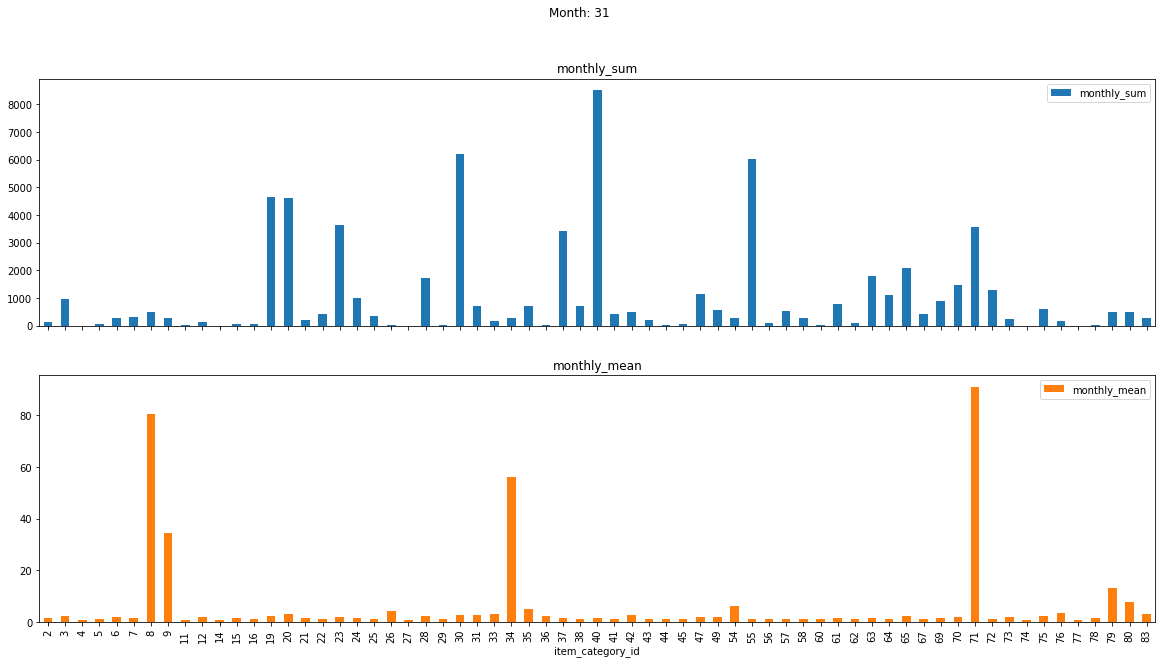

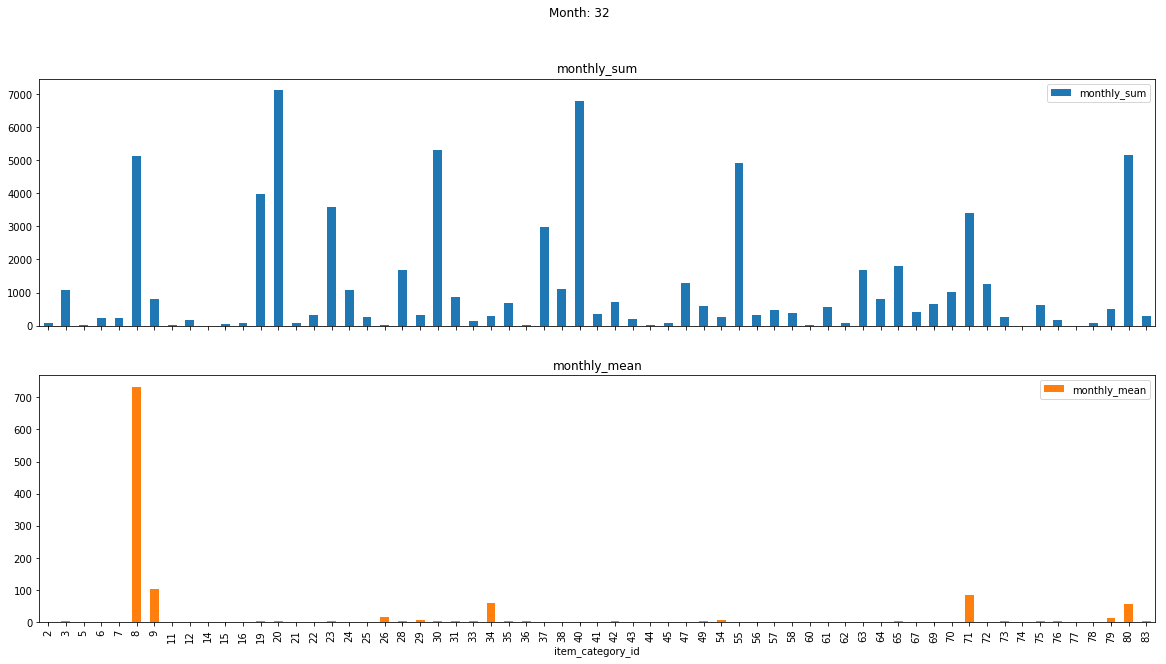

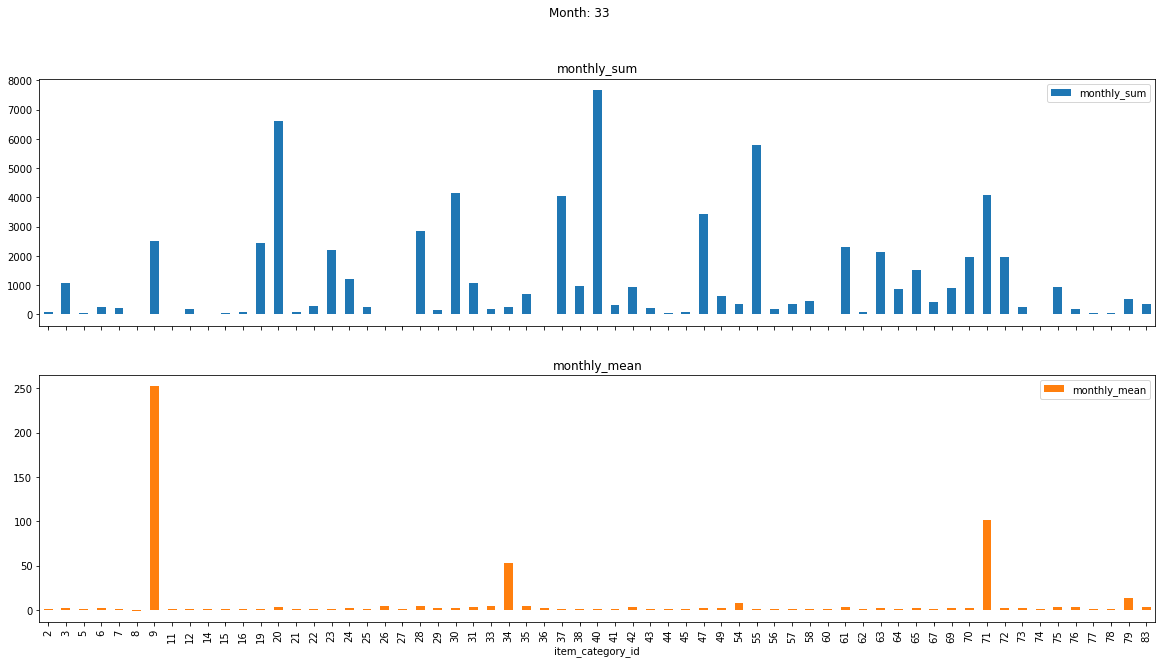

In [22]:
temp = ItemCatMonthlyPerformance.copy().groupby(['date_block_num'],as_index=False)
for key, group in temp:
    group.plot(subplots=True,x='item_category_id',y=['monthly_sum','monthly_mean'],kind="bar",figsize=(20,10),title="Month: "+str(key))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


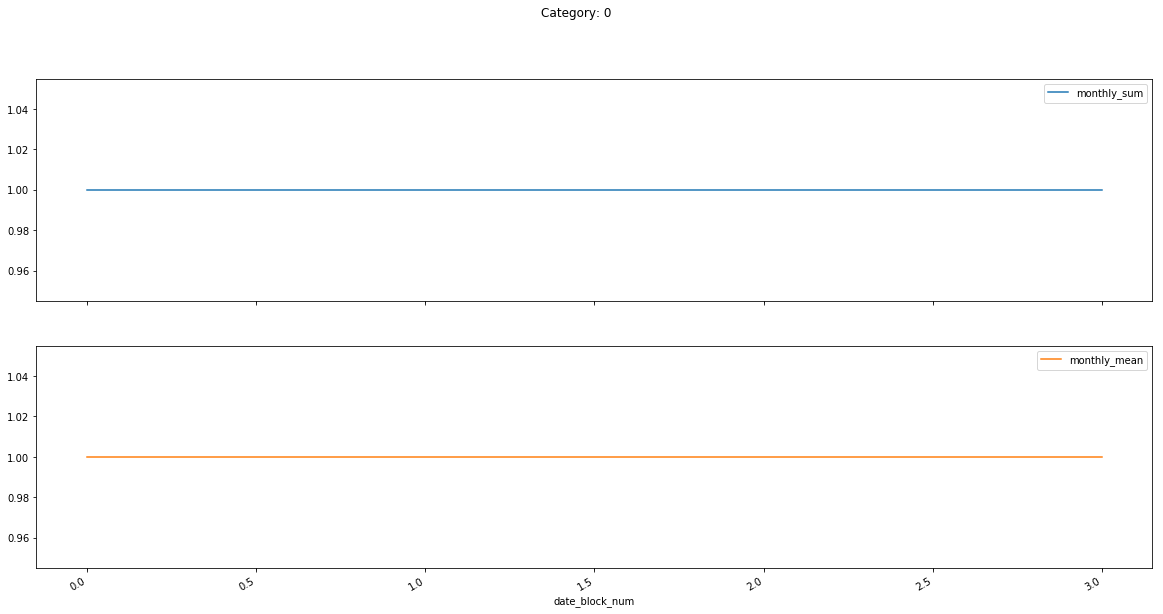

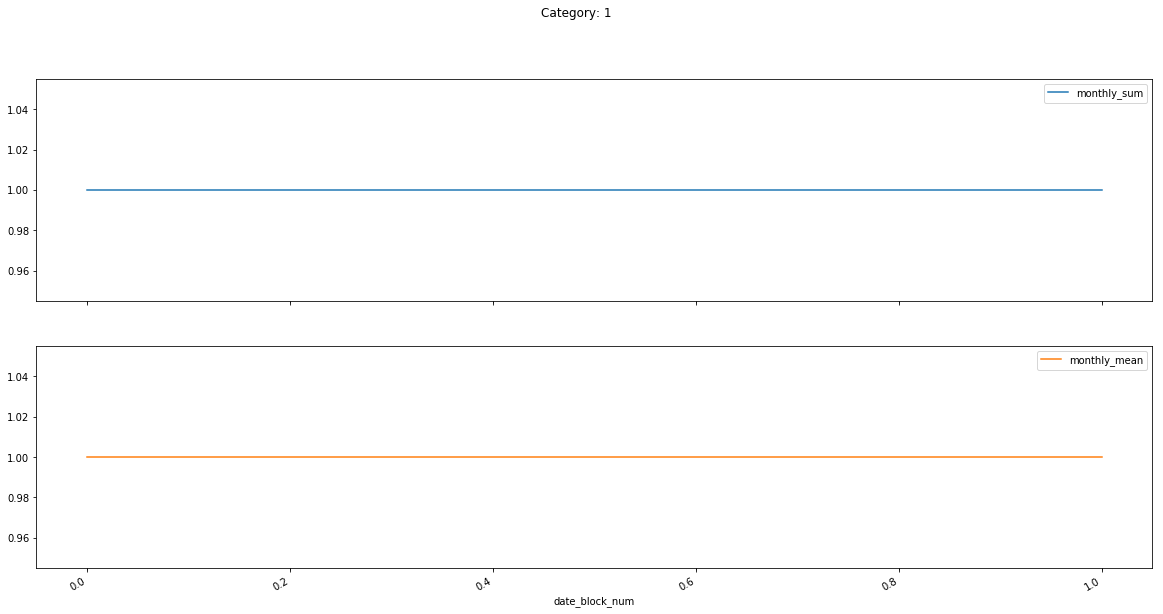

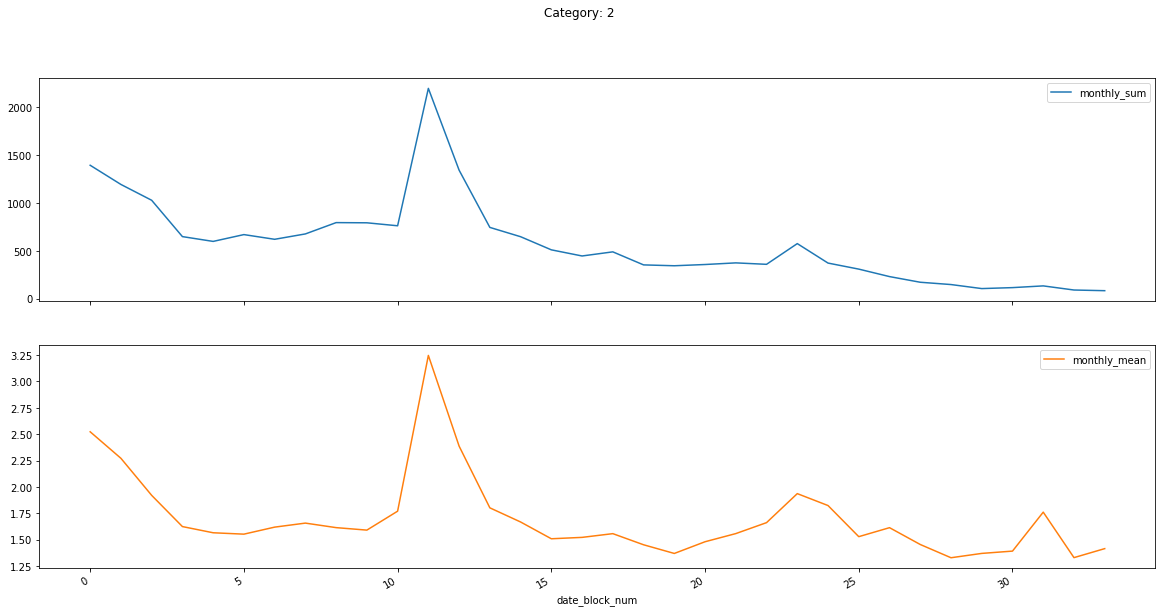

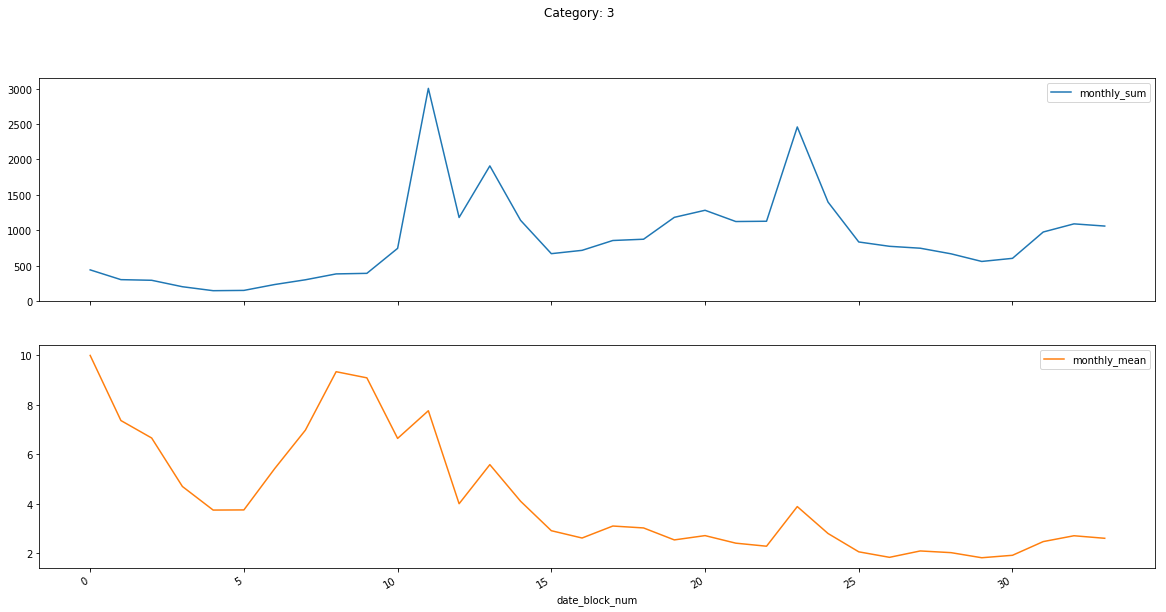

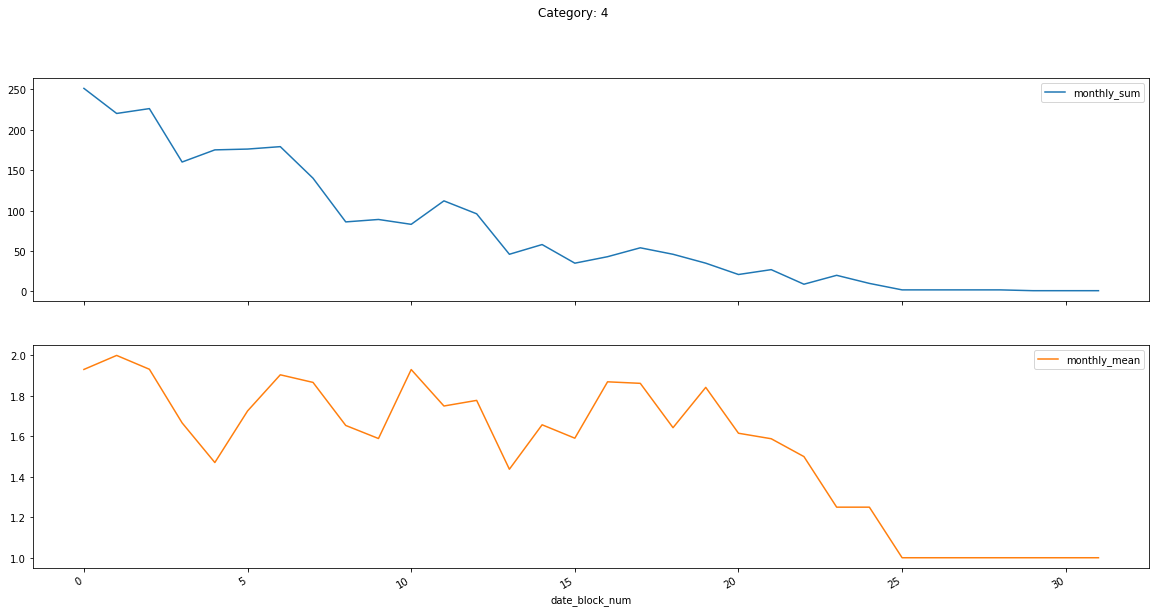

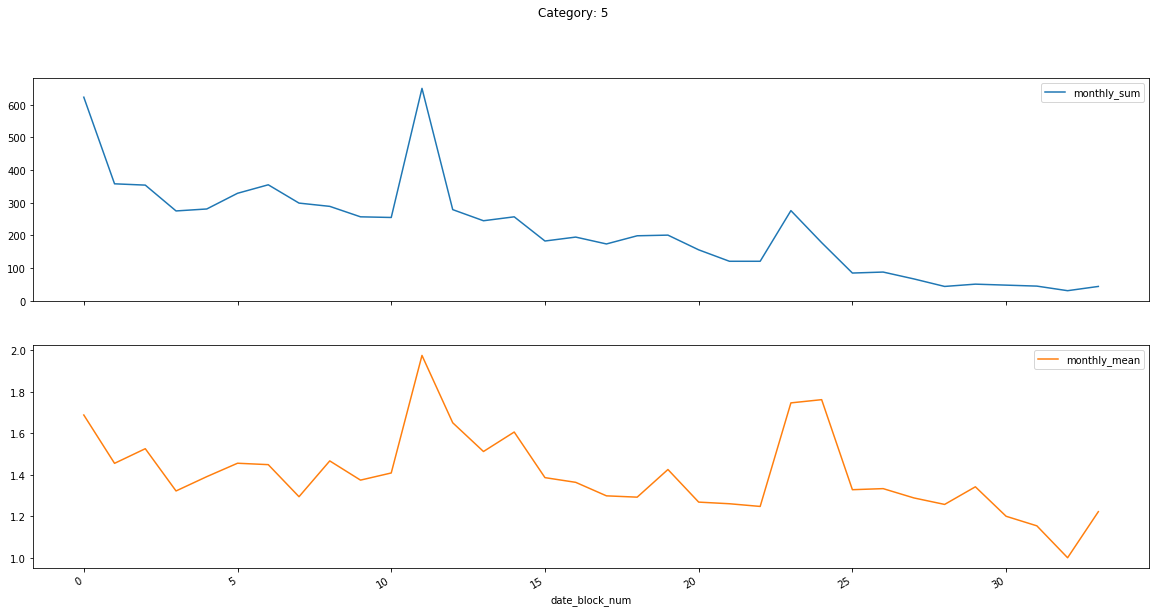

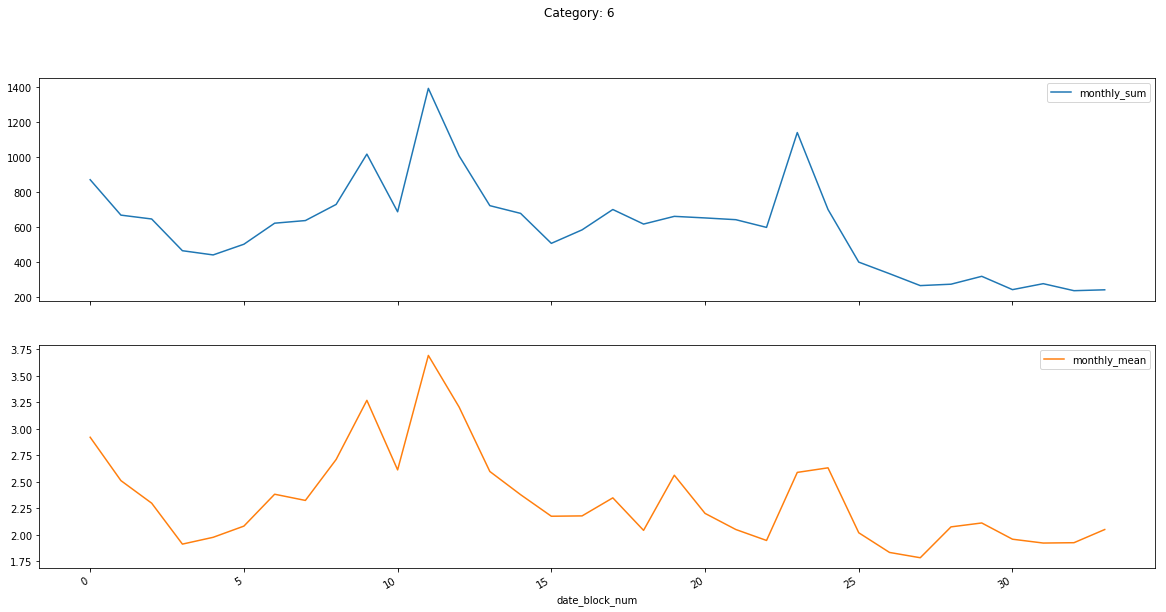

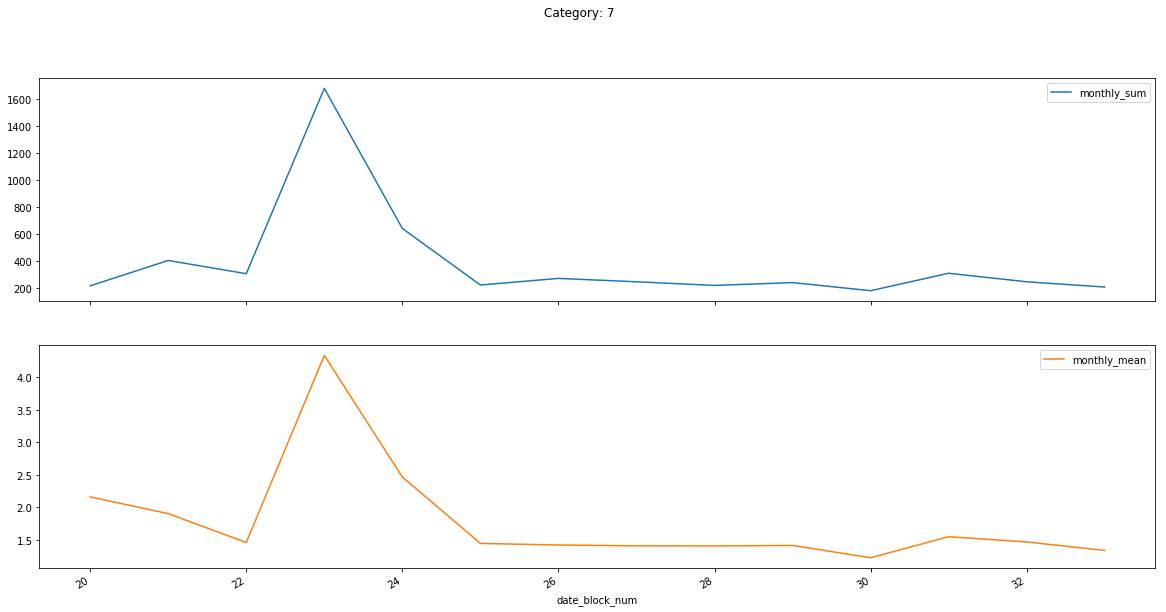

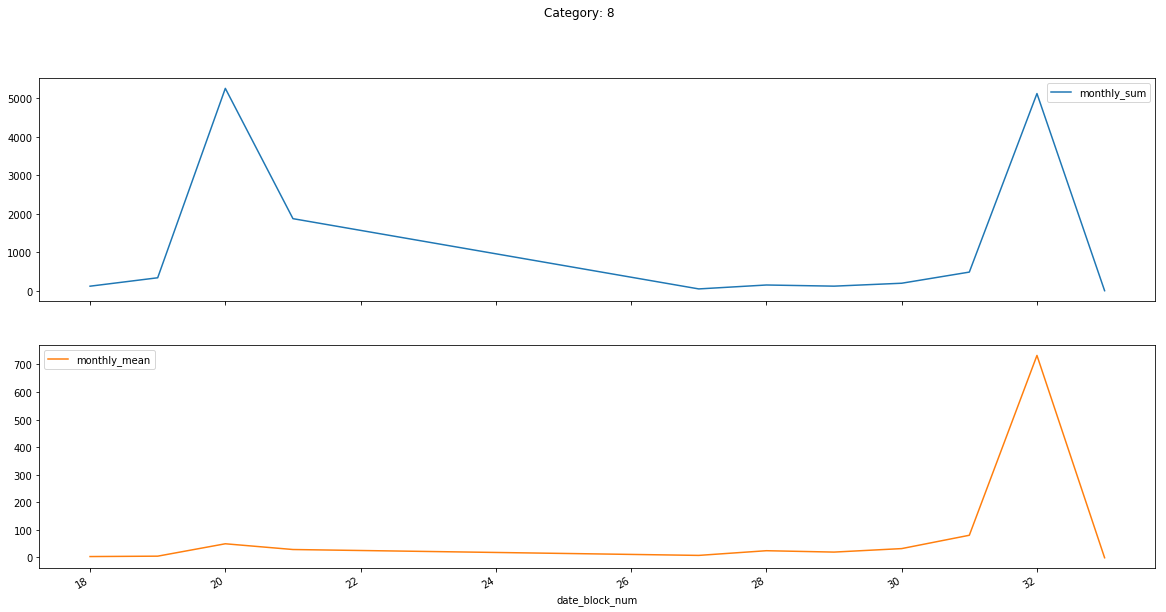

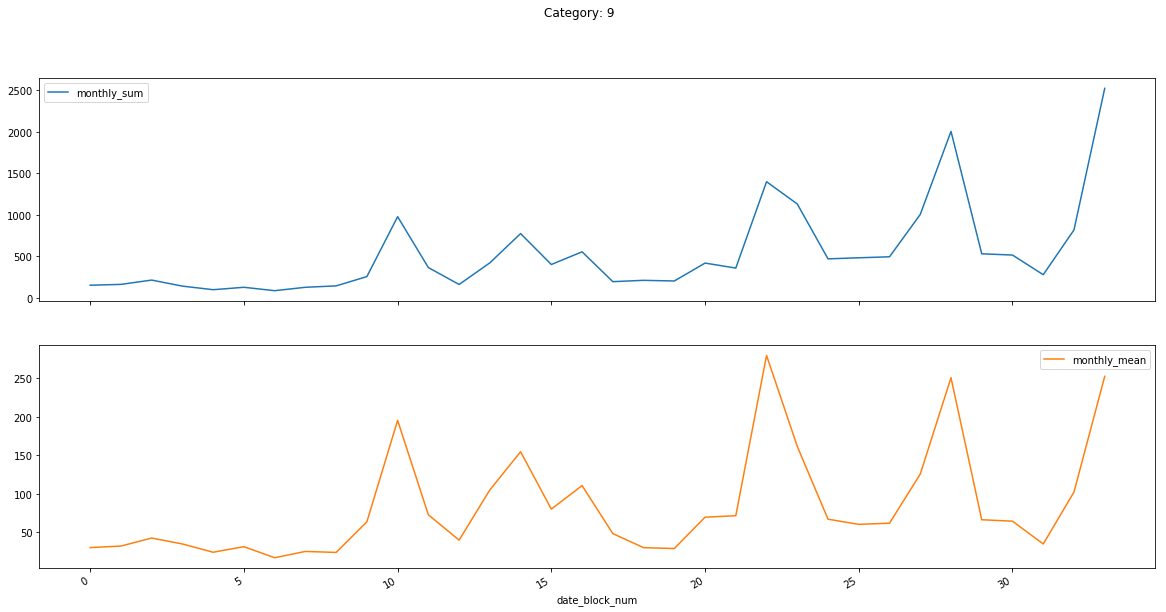

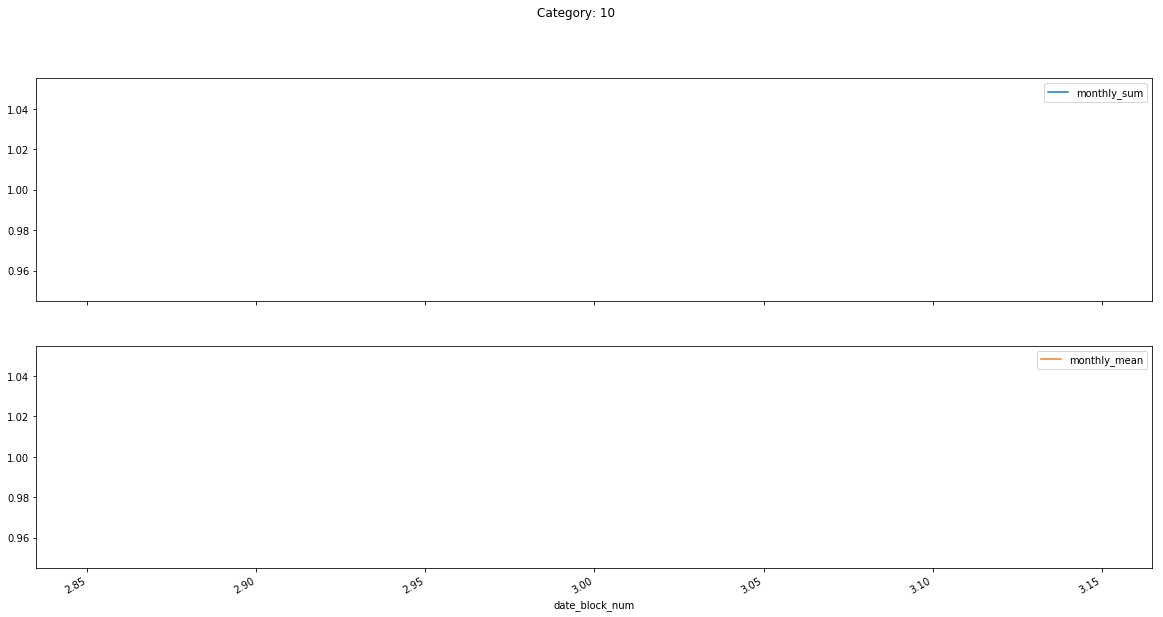

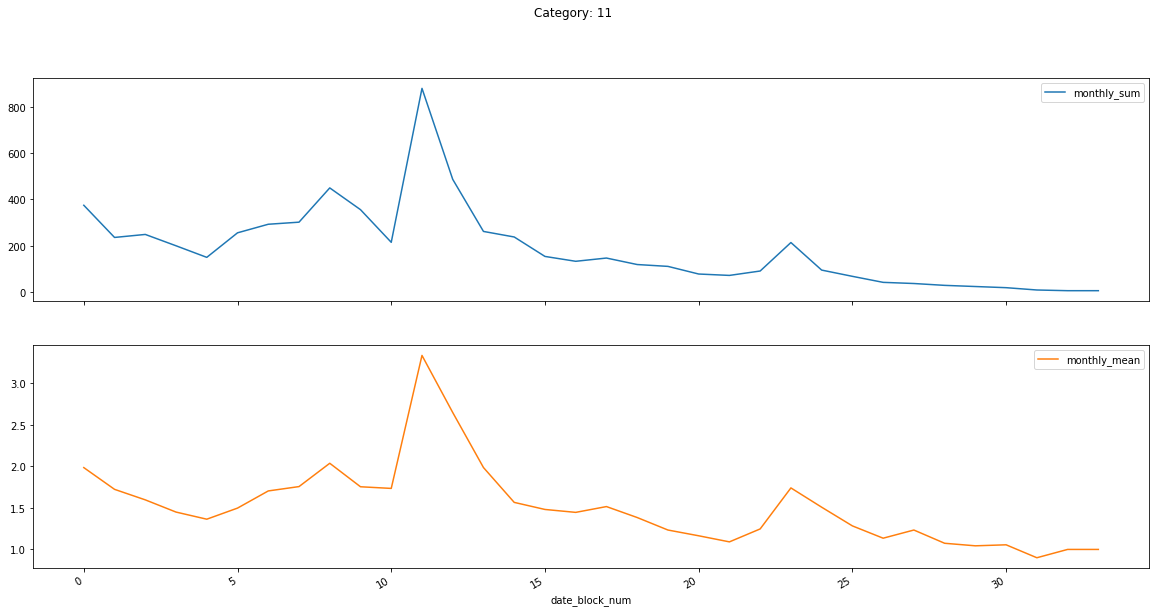

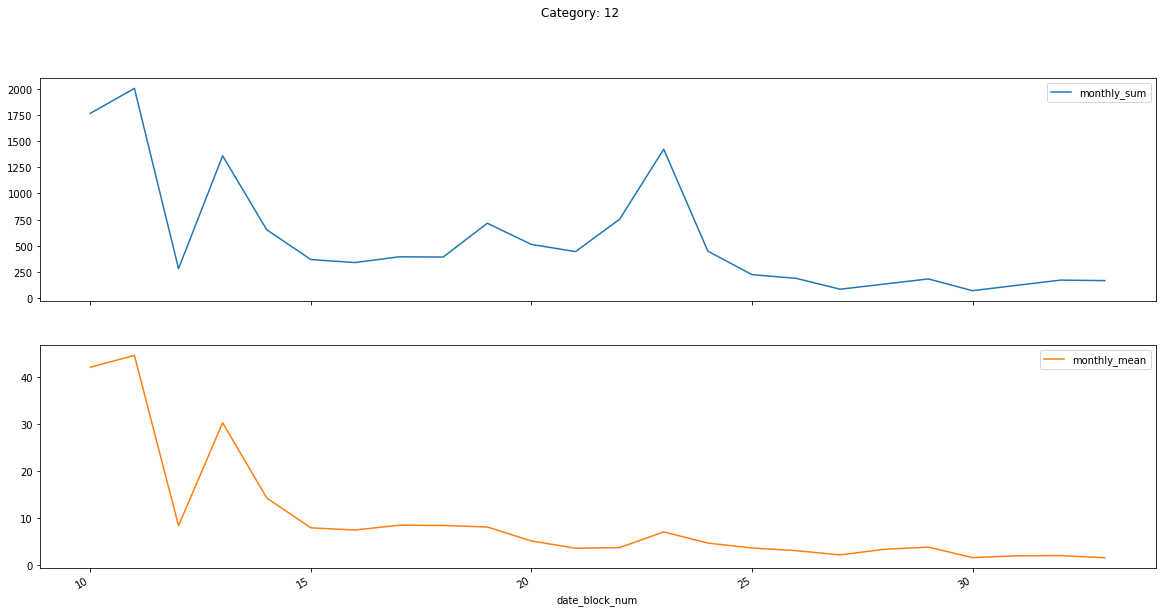

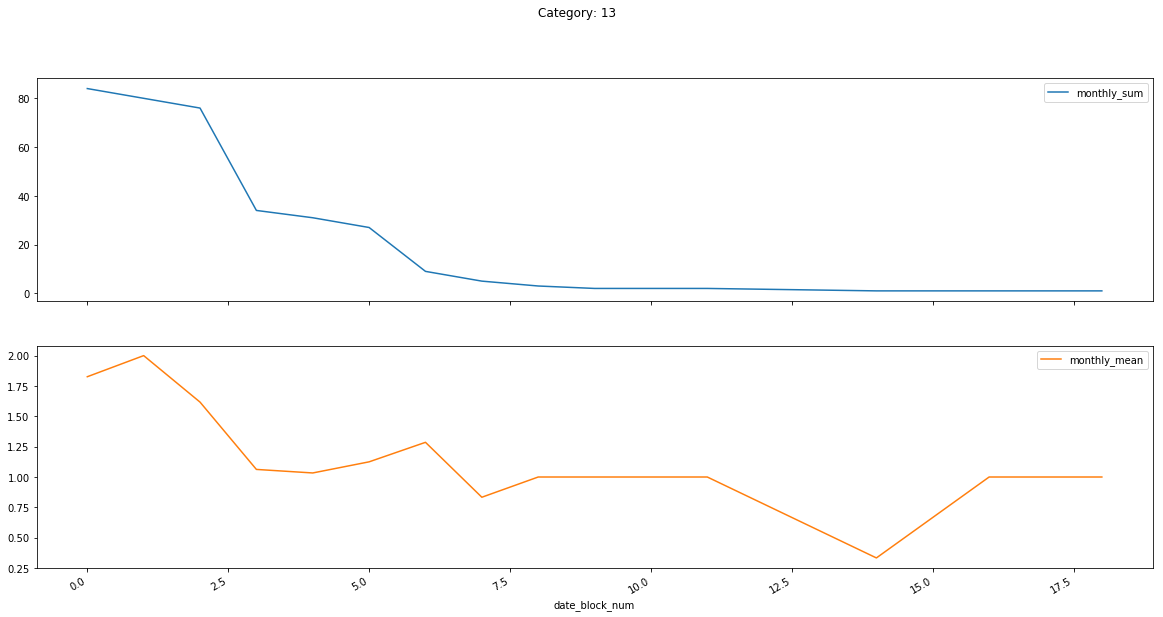

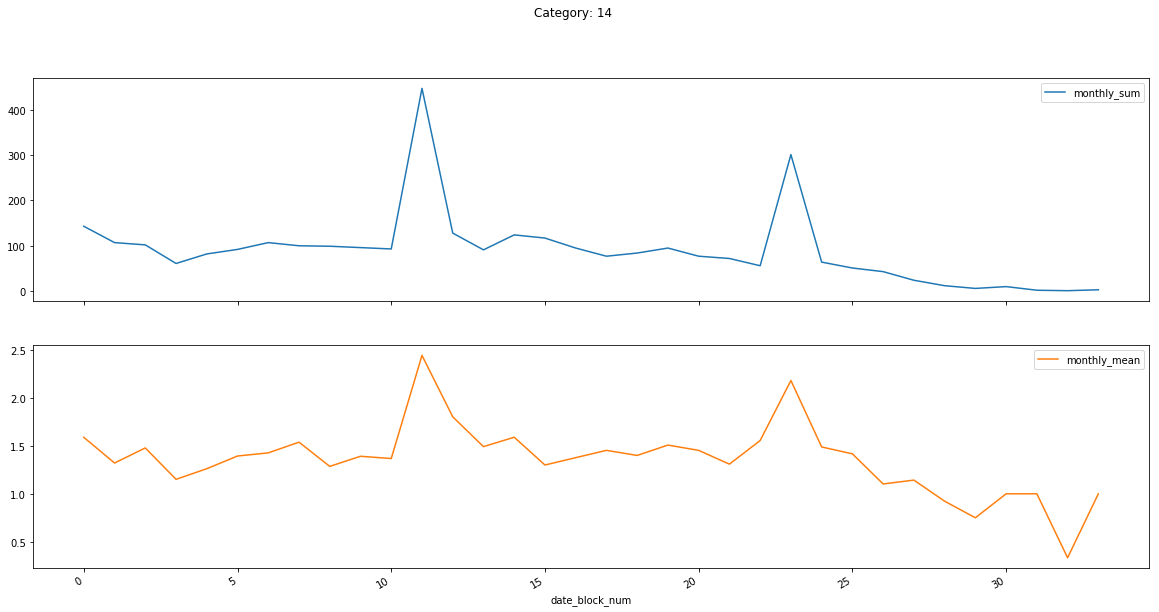

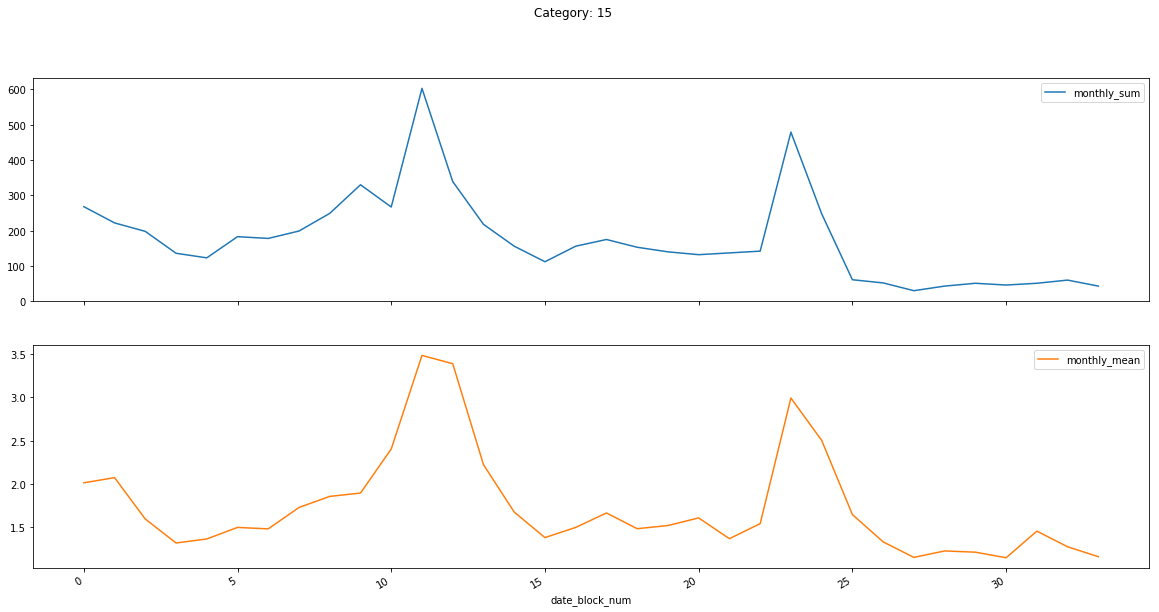

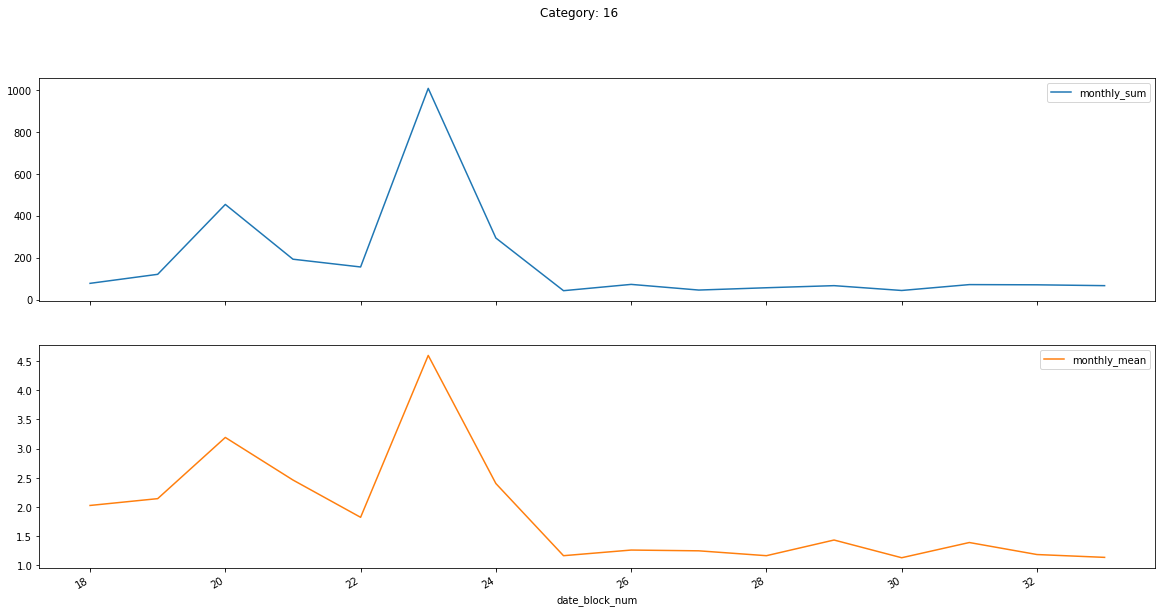

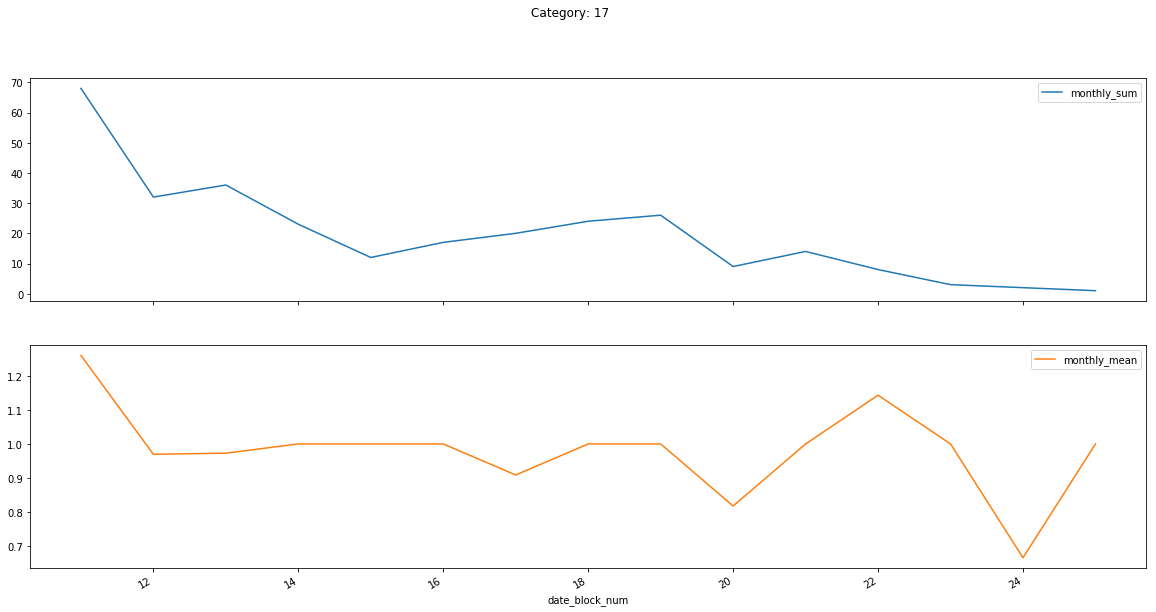

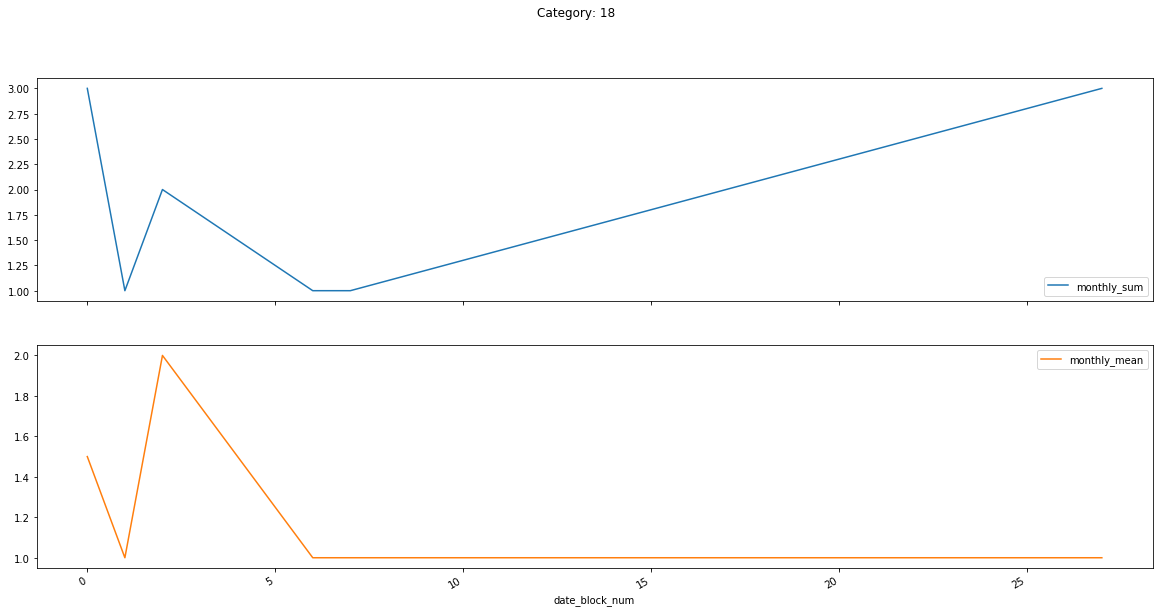

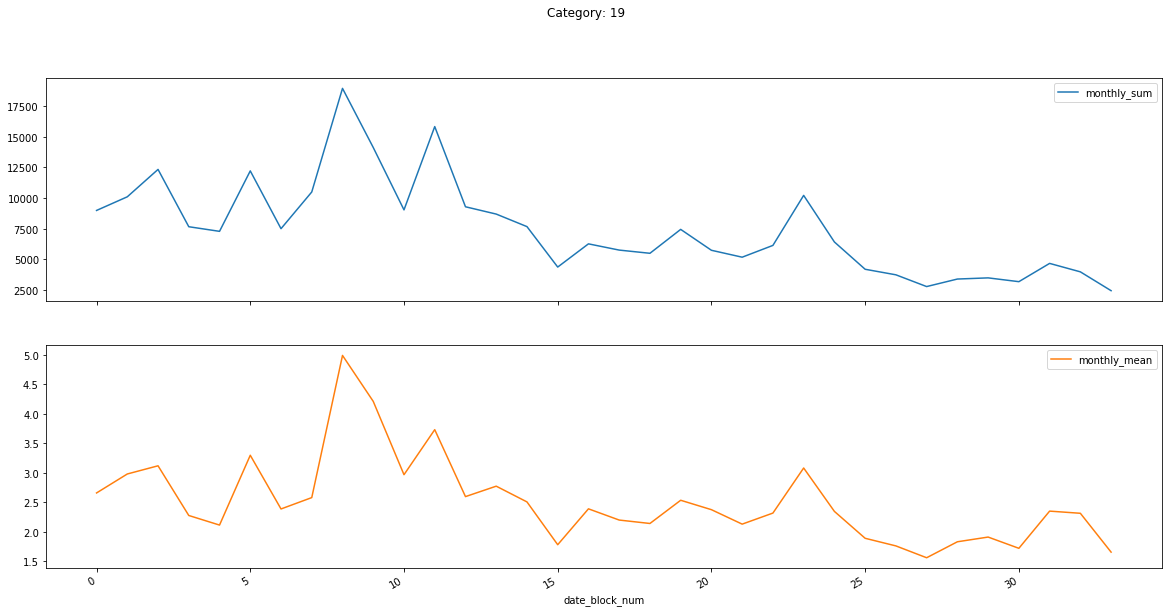

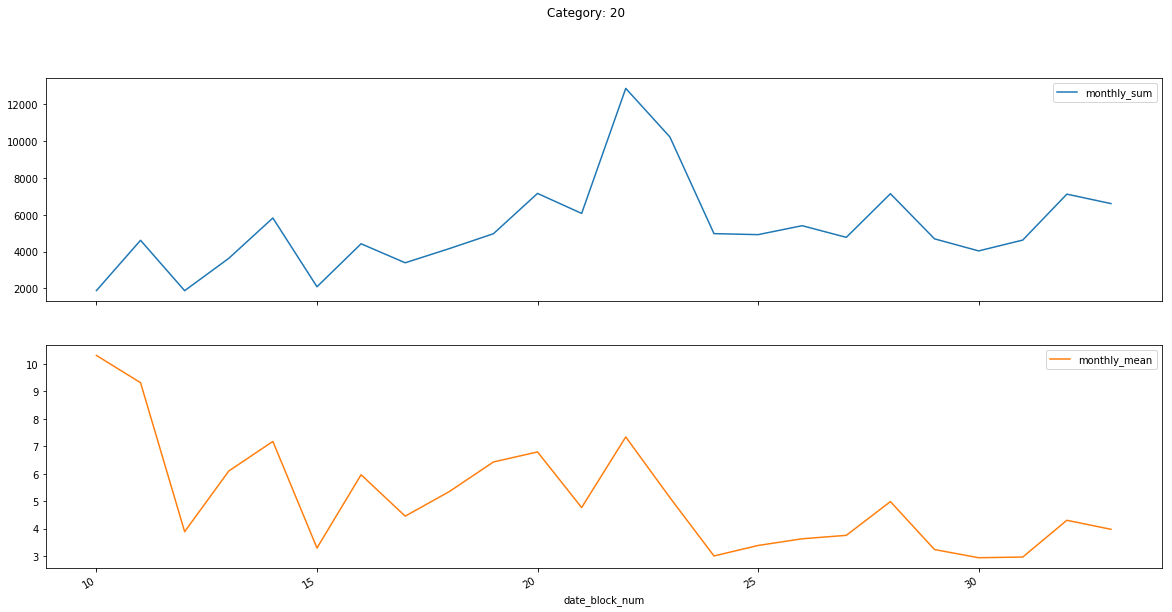

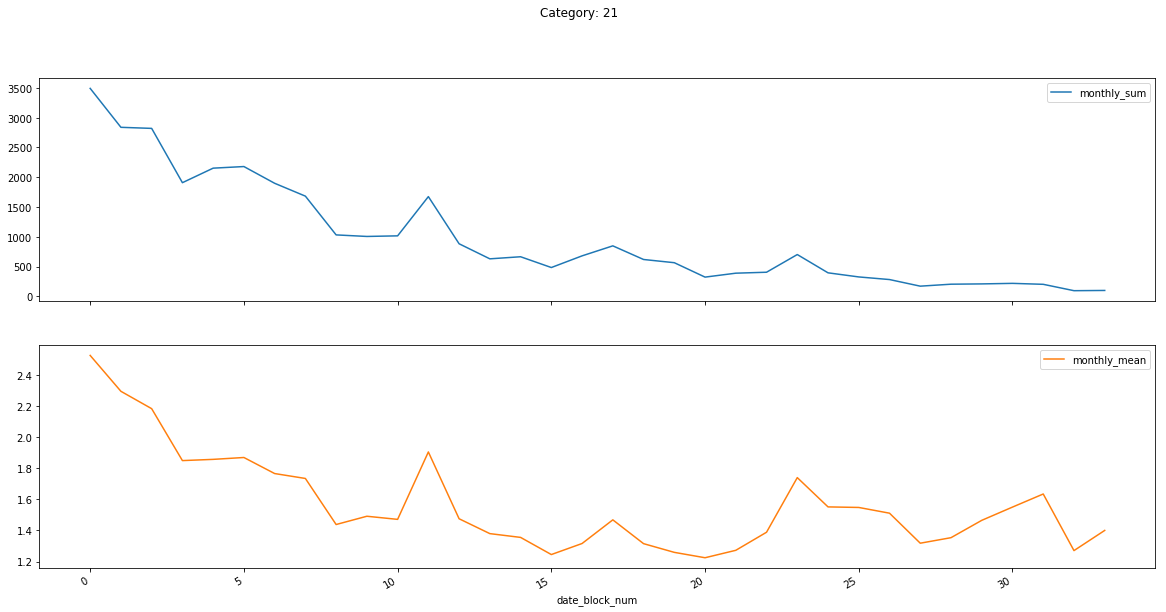

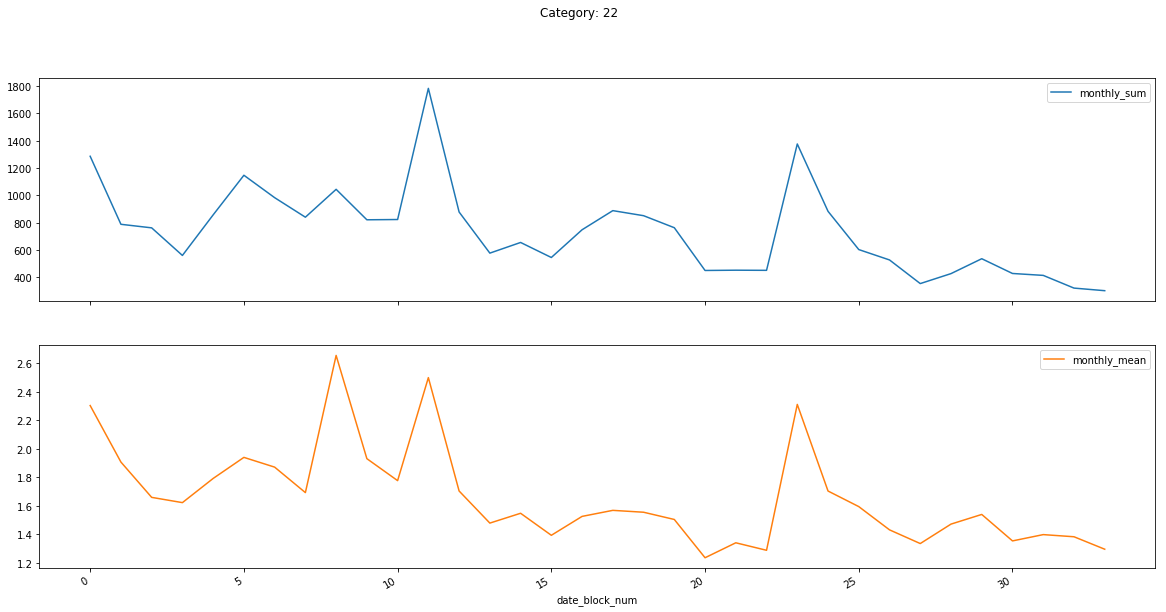

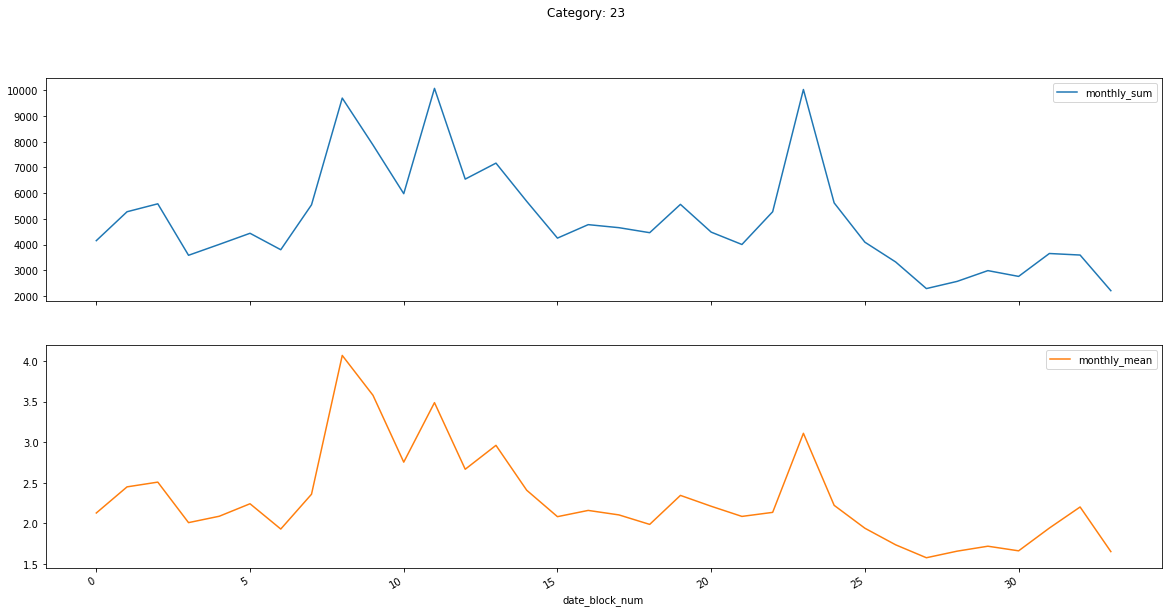

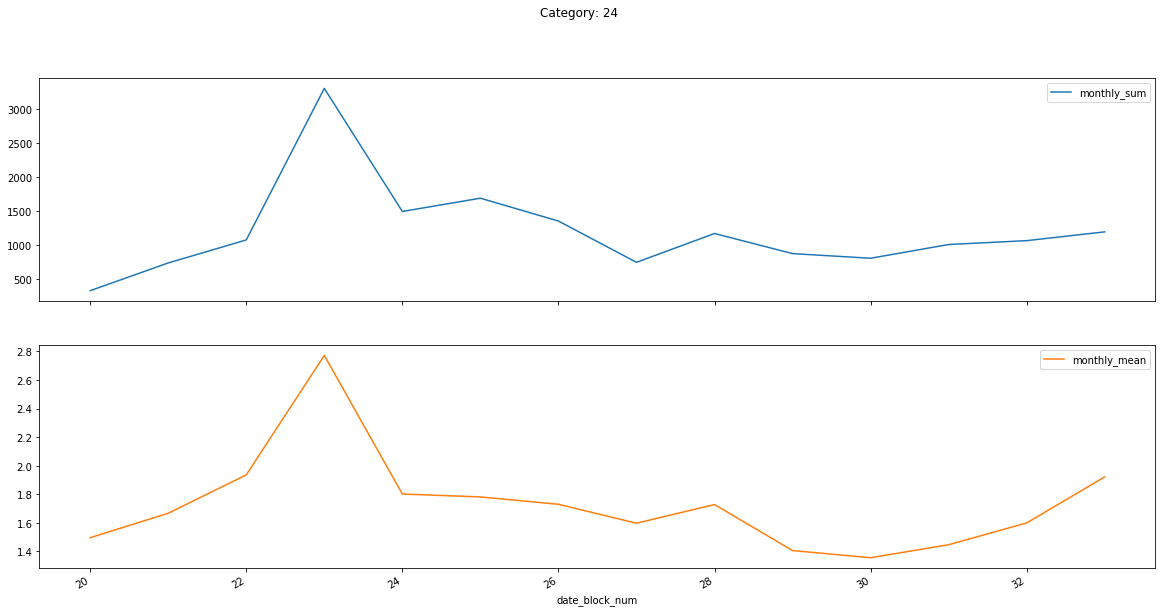

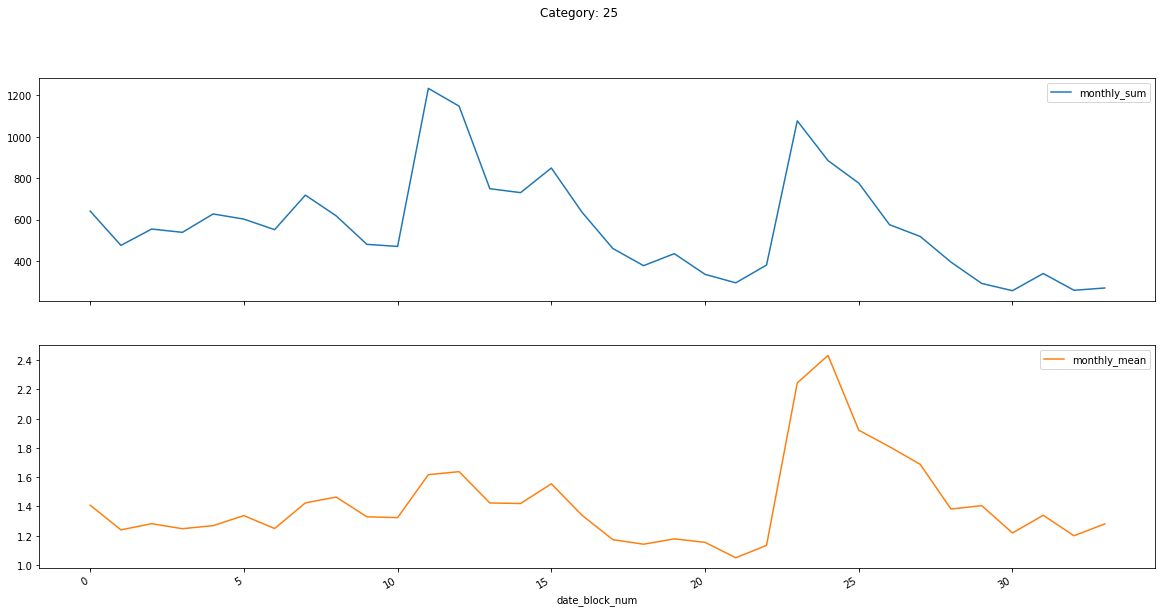

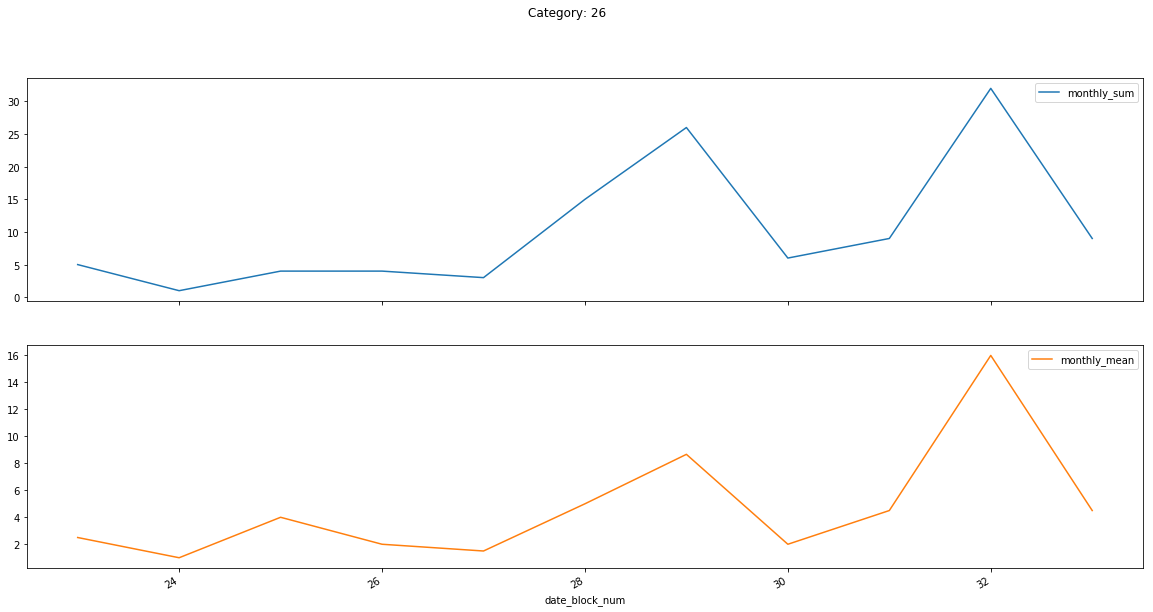

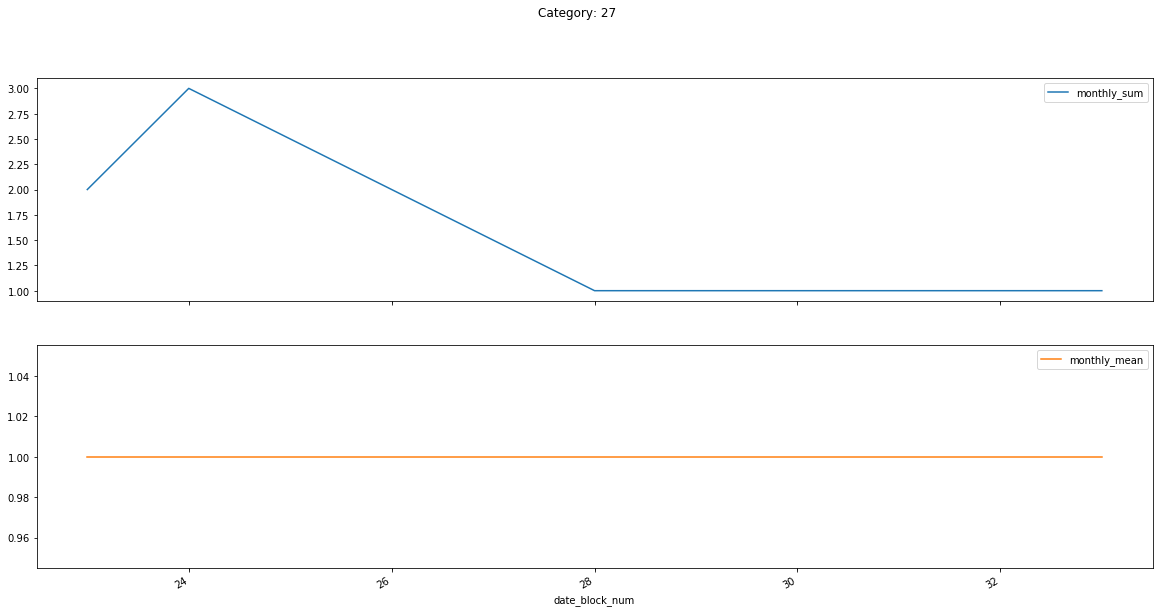

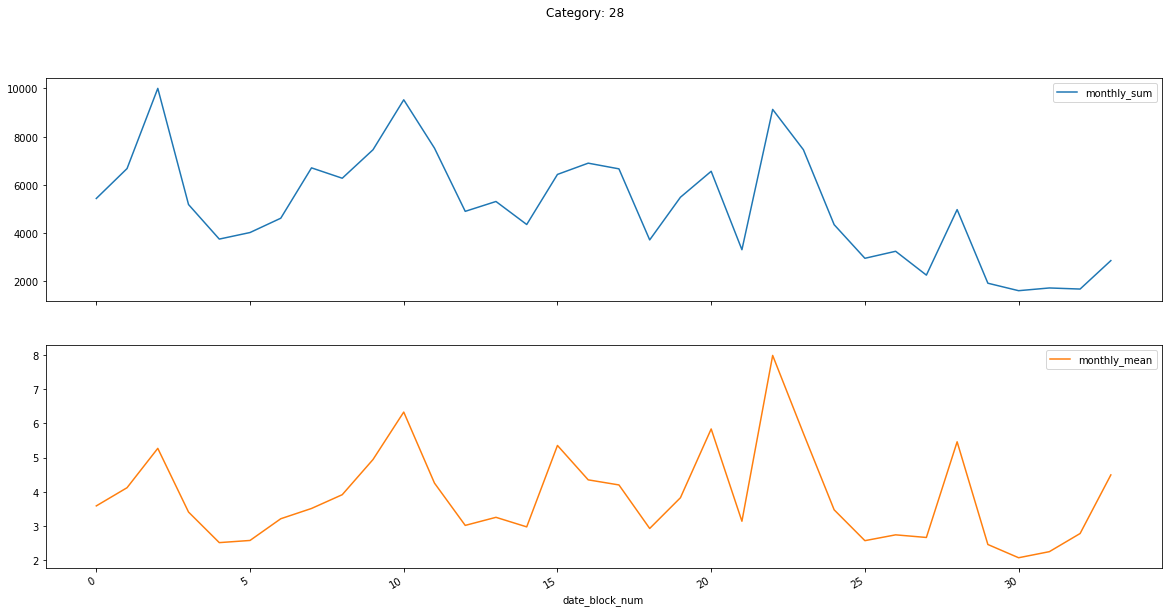

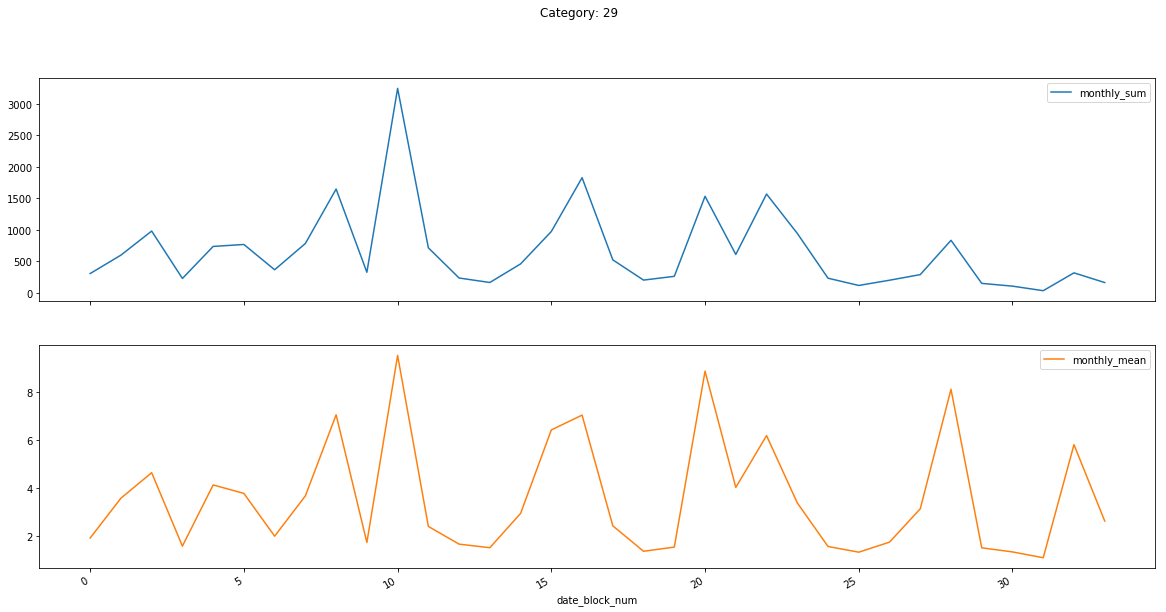

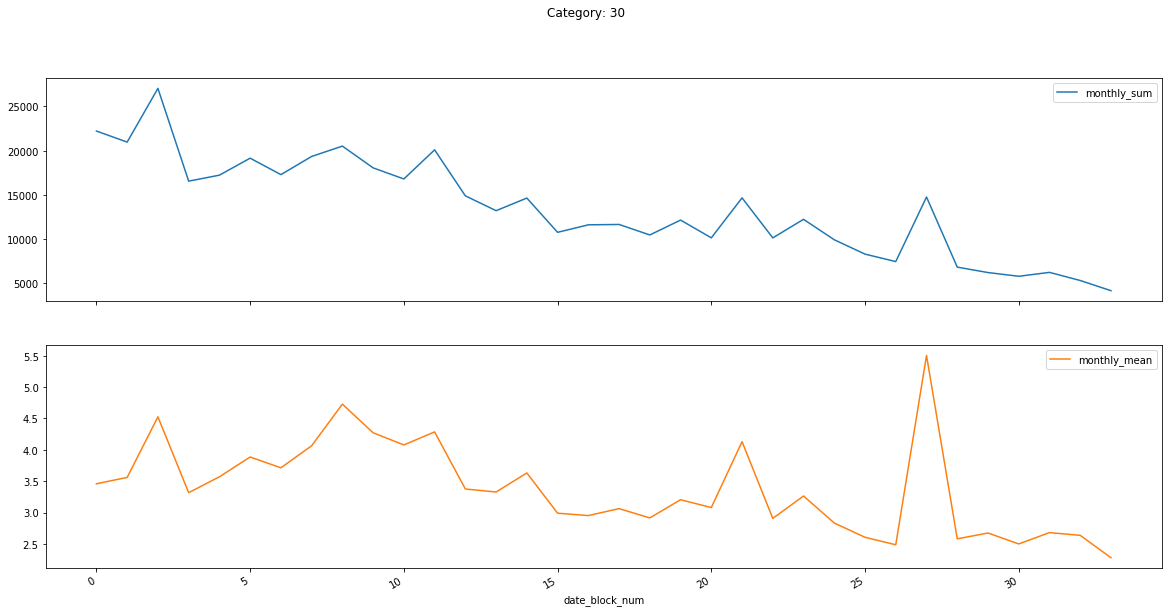

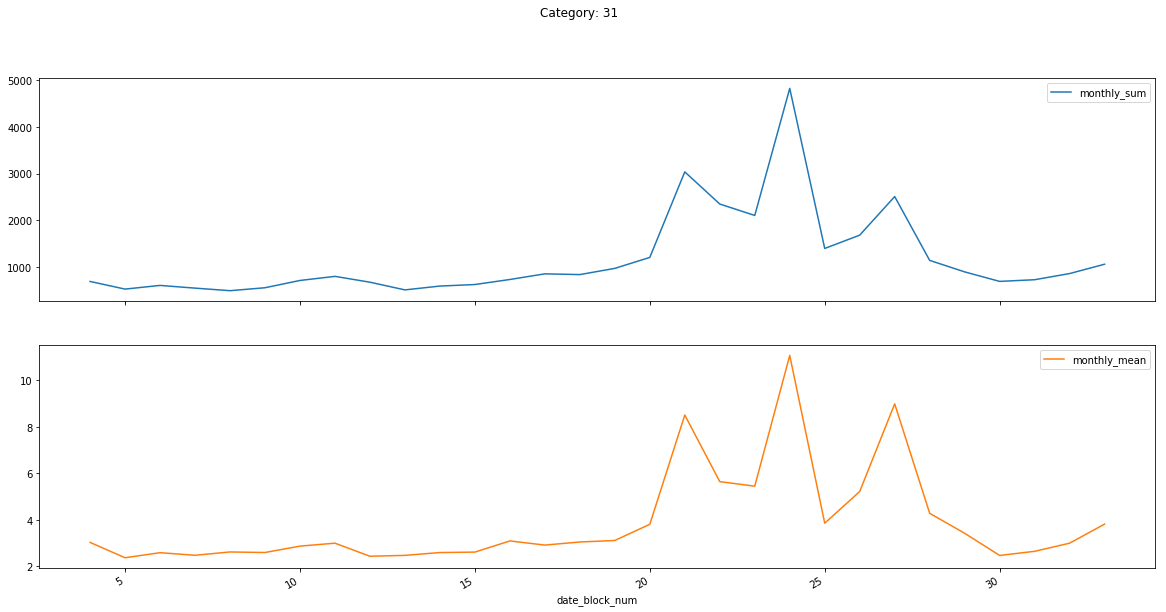

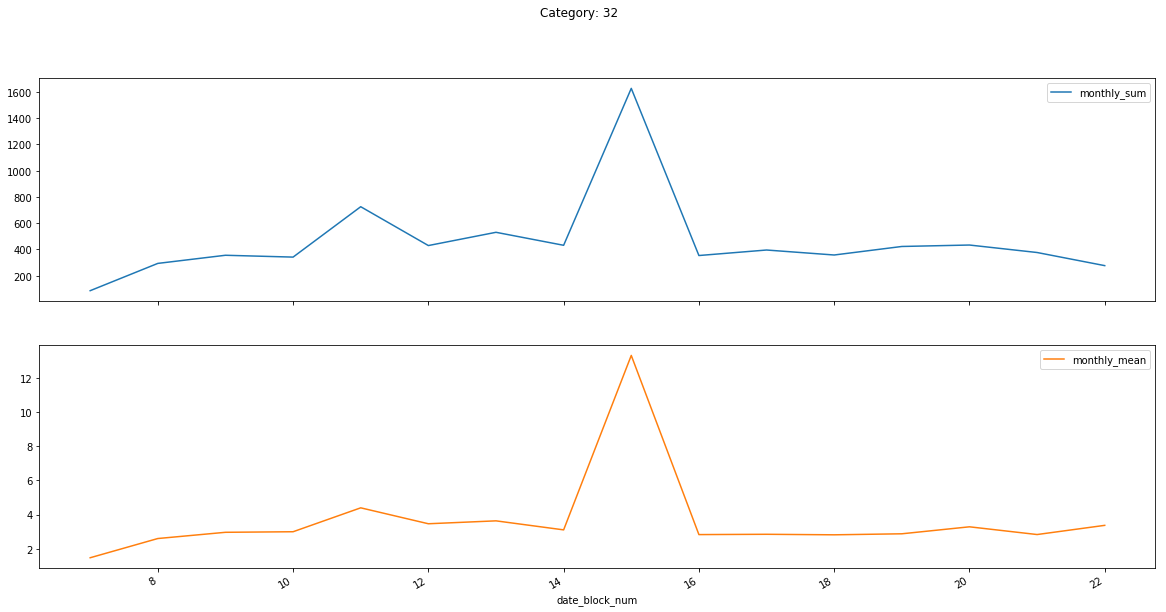

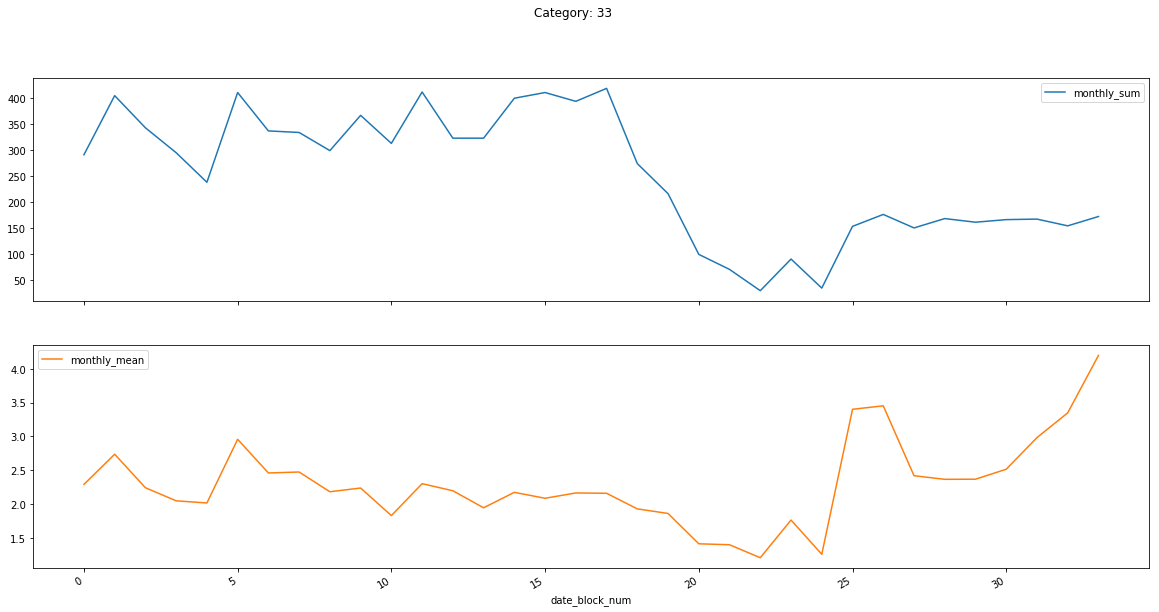

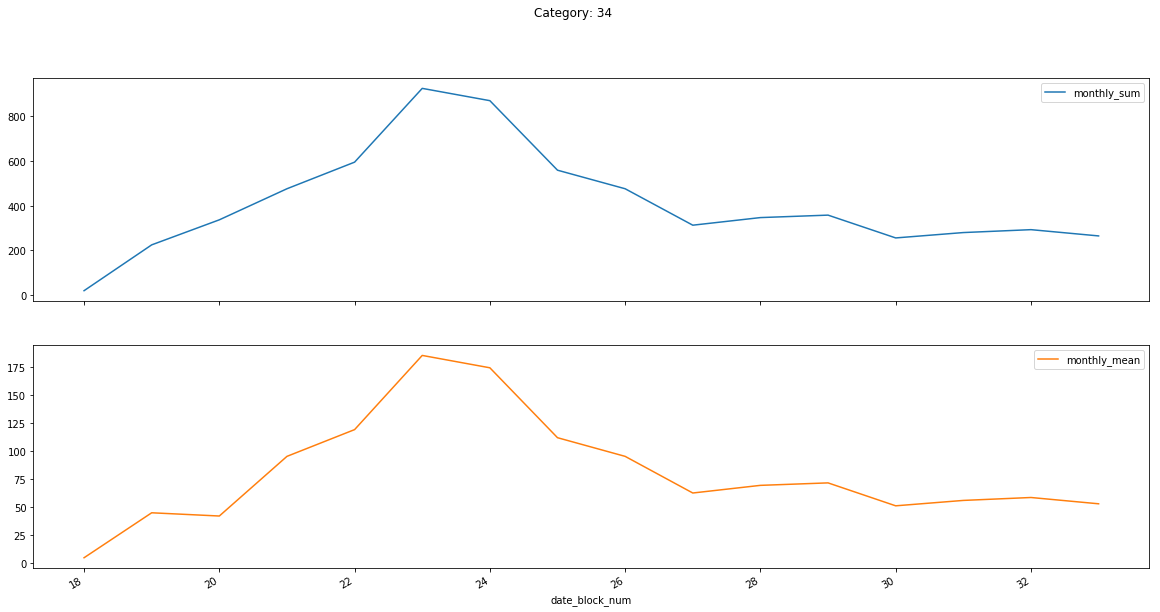

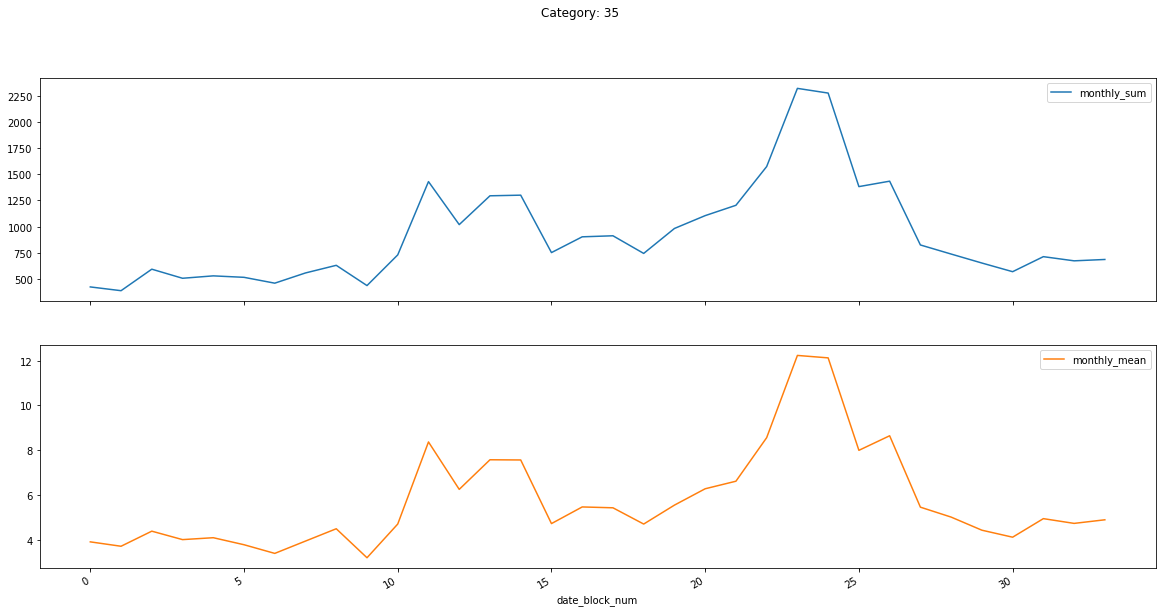

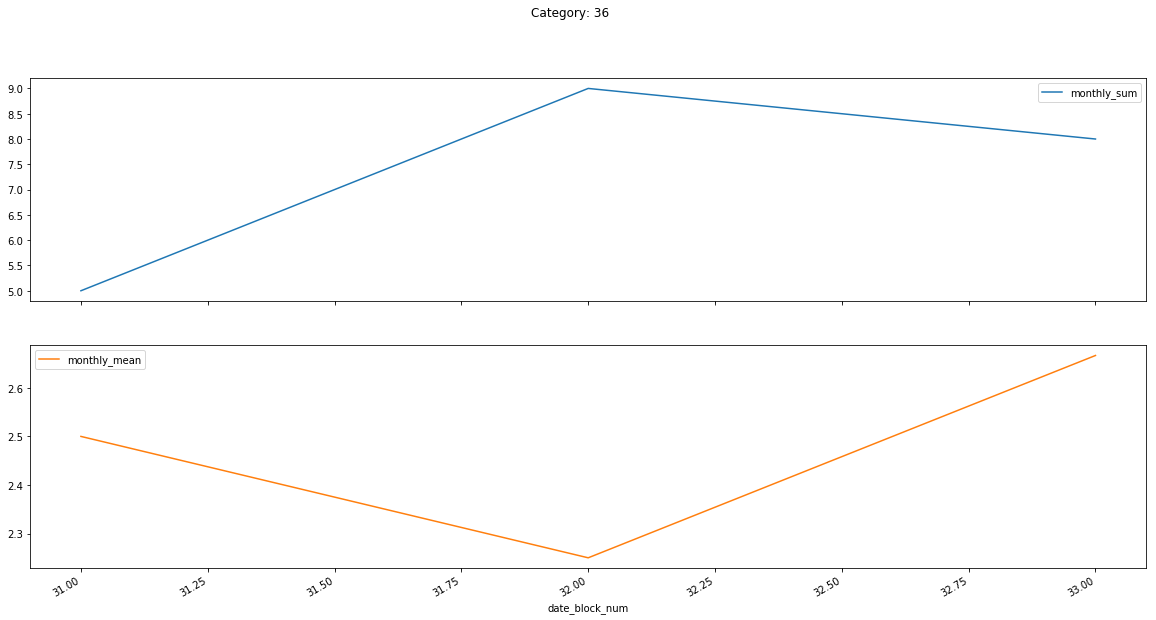

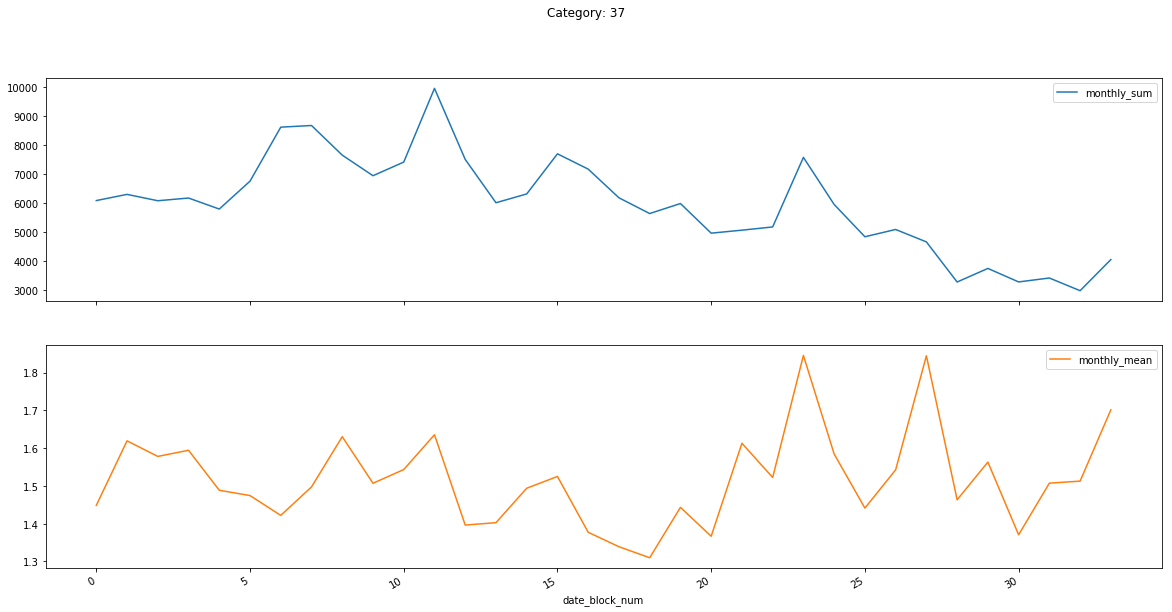

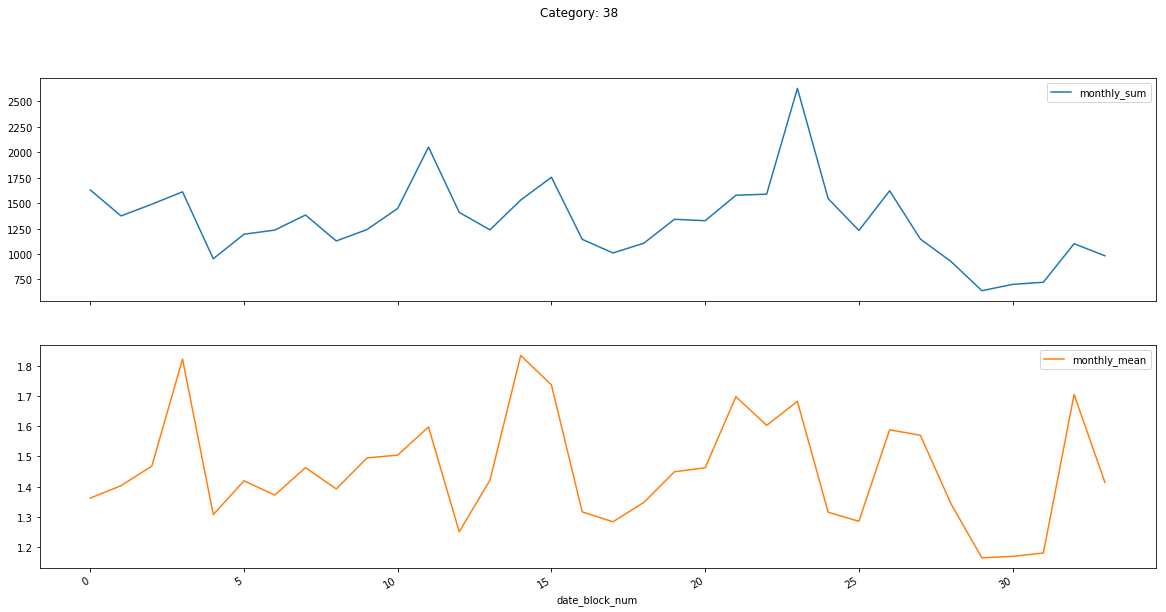

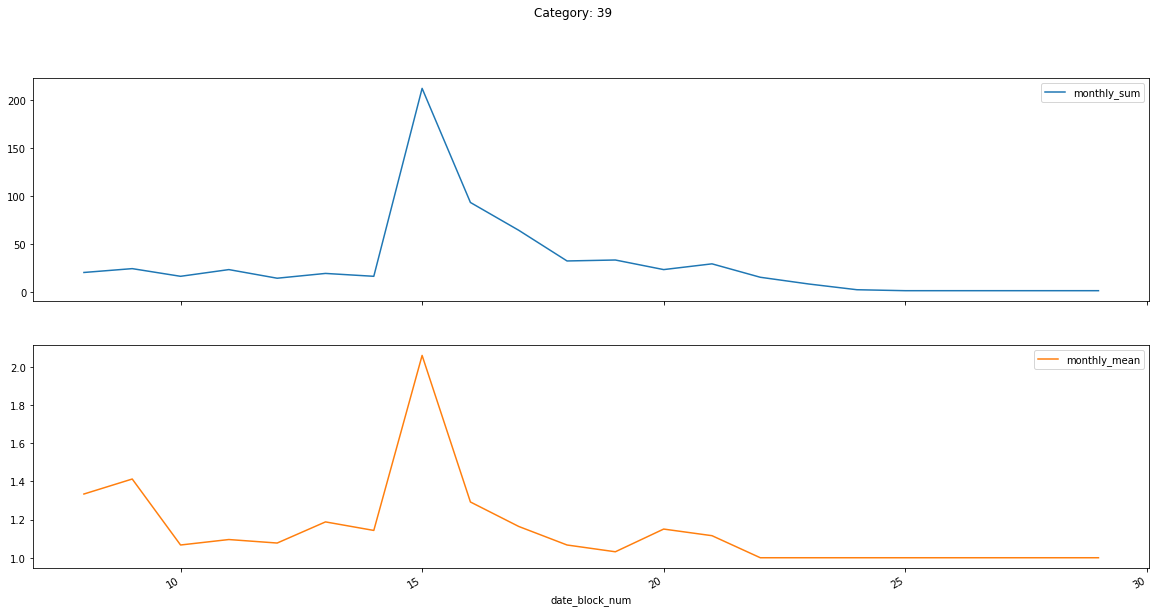

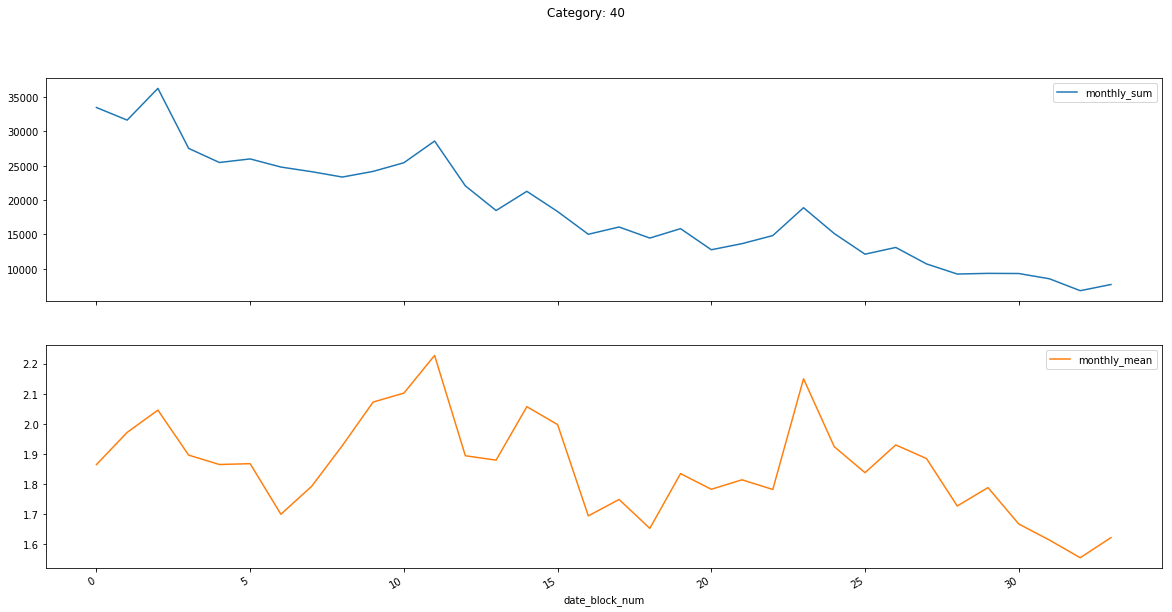

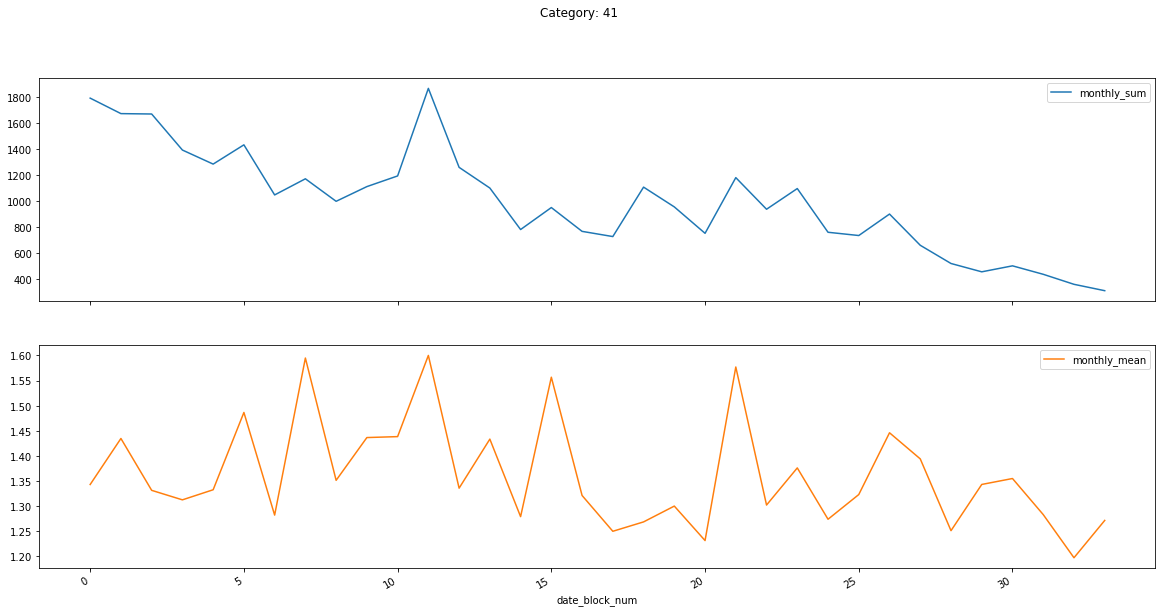

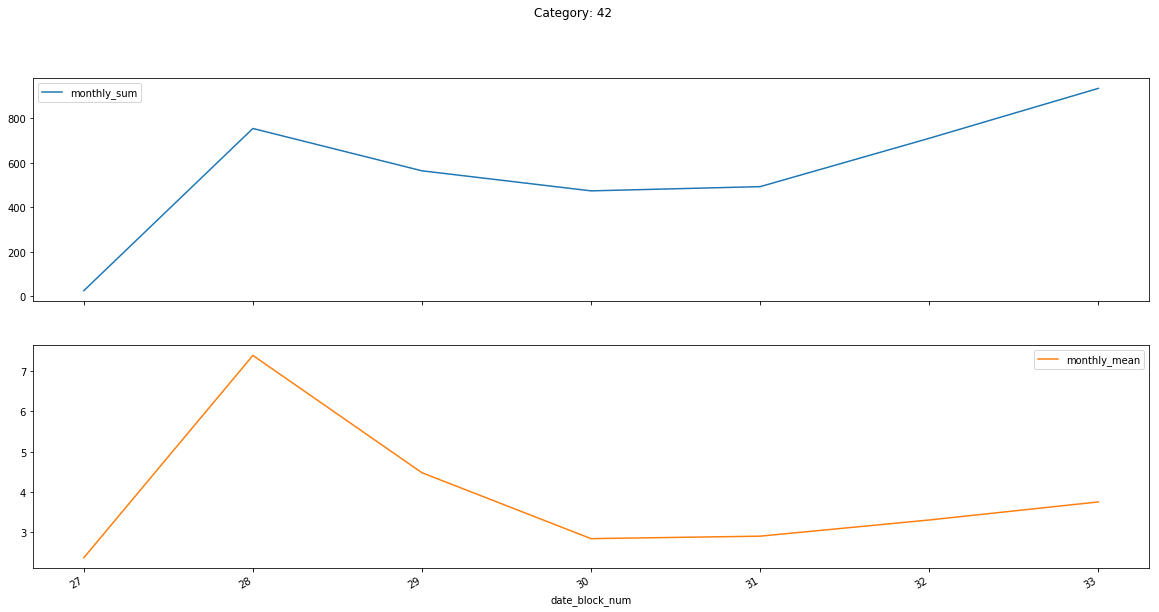

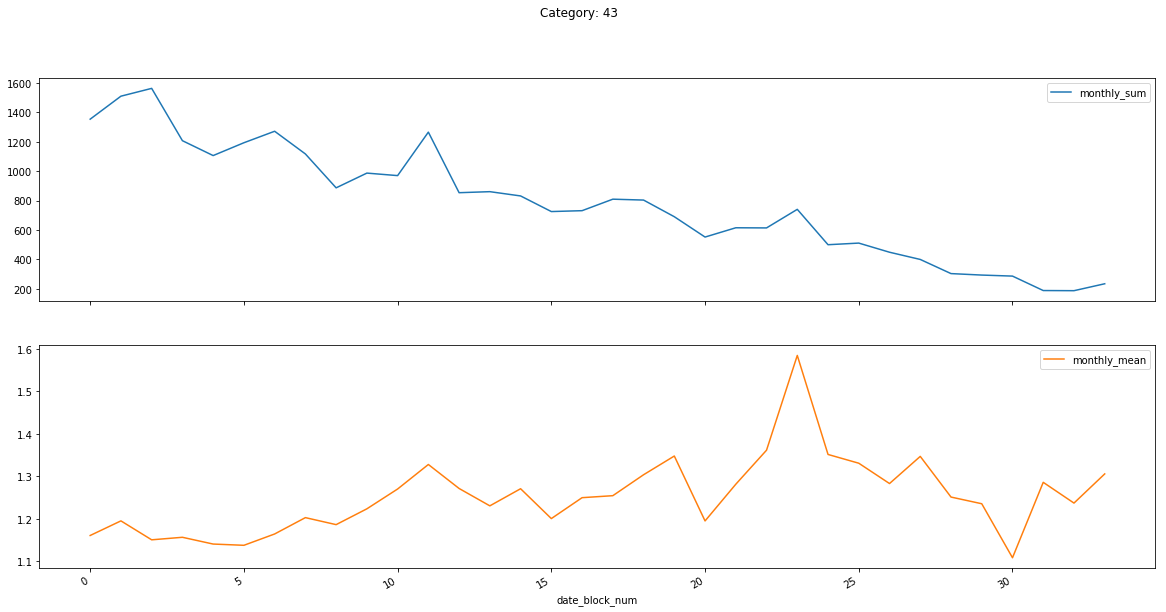

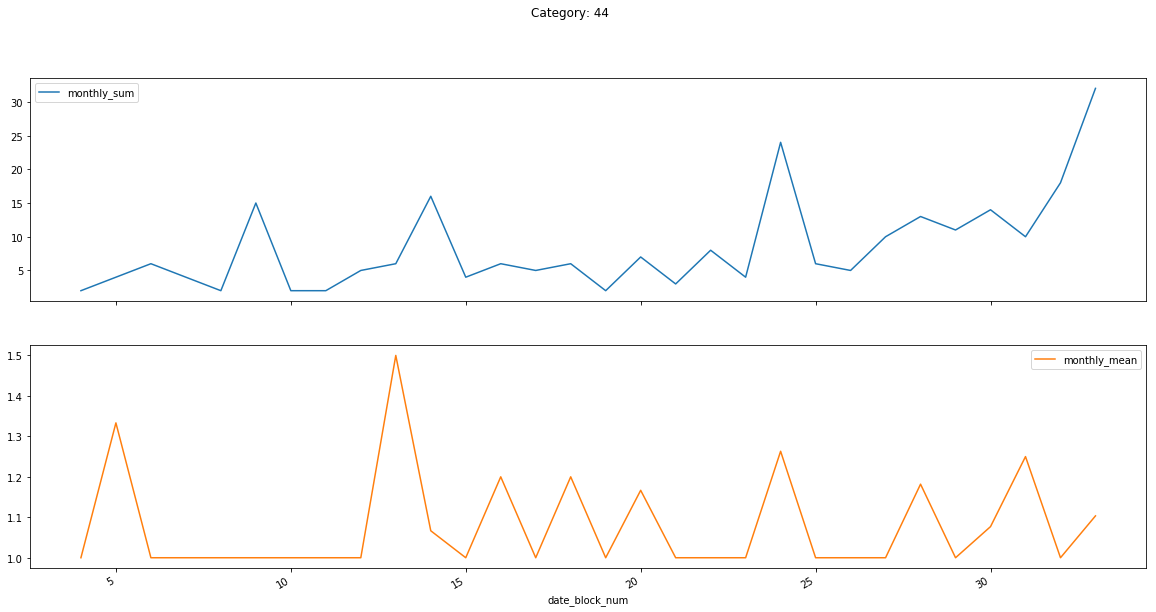

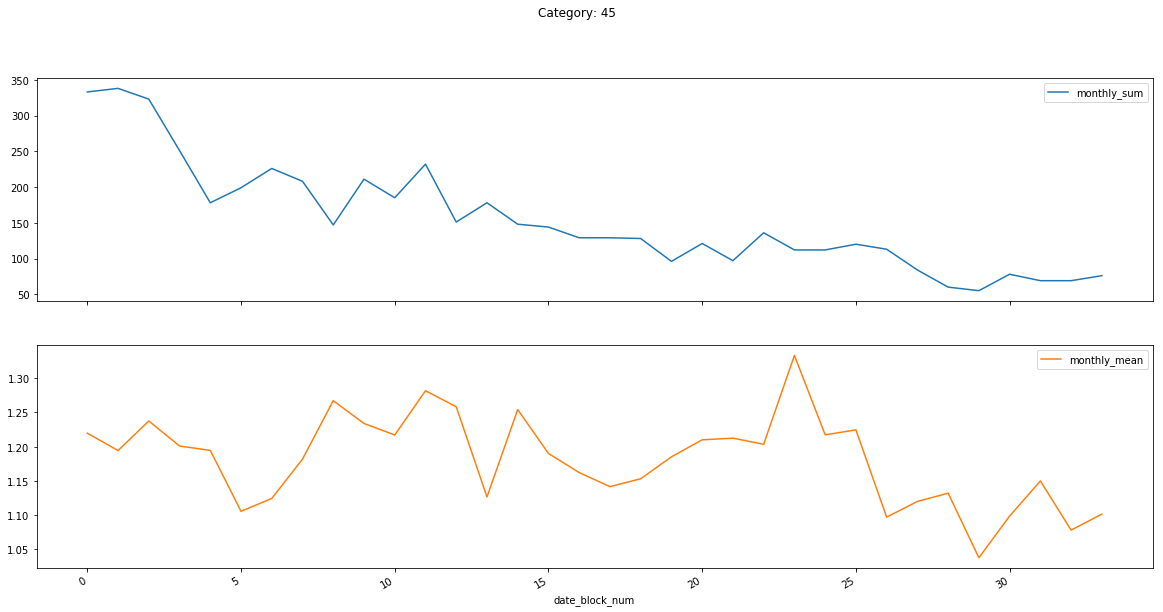

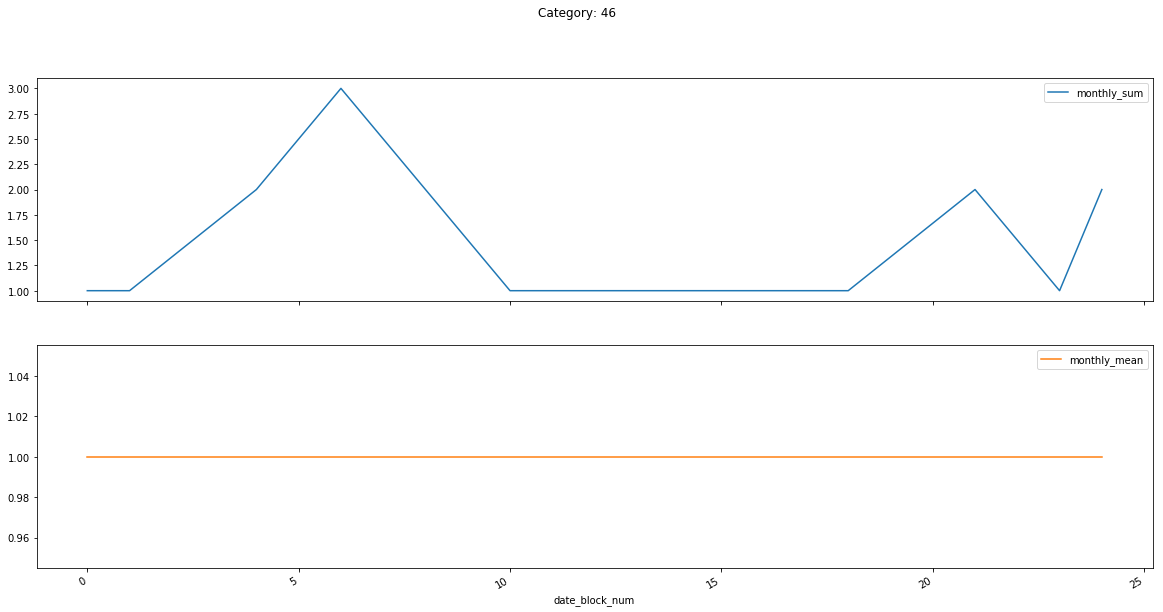

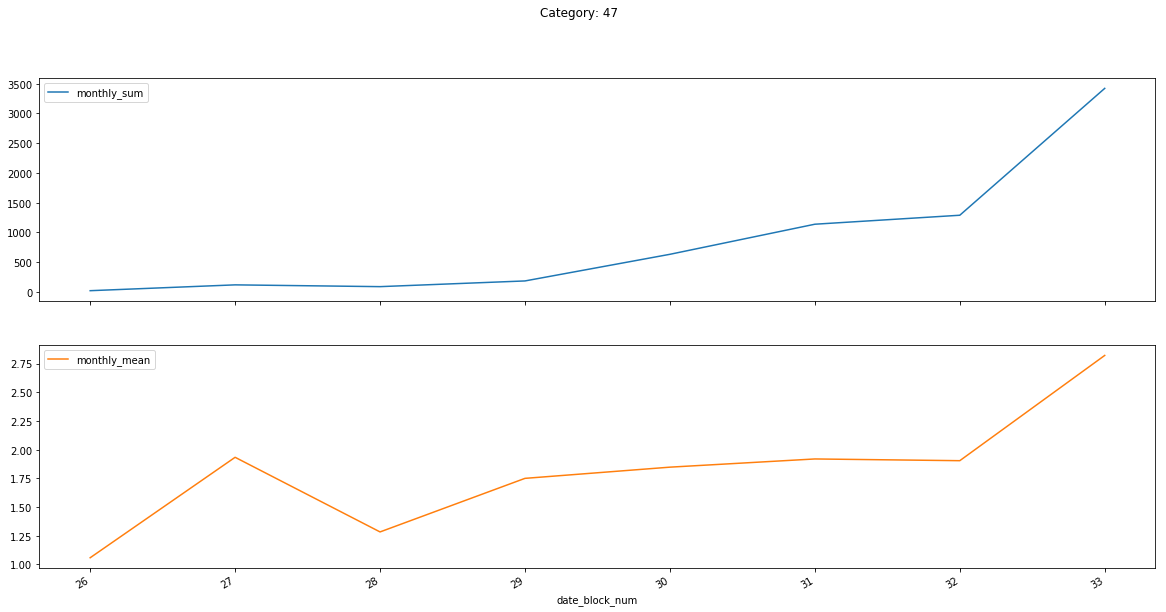

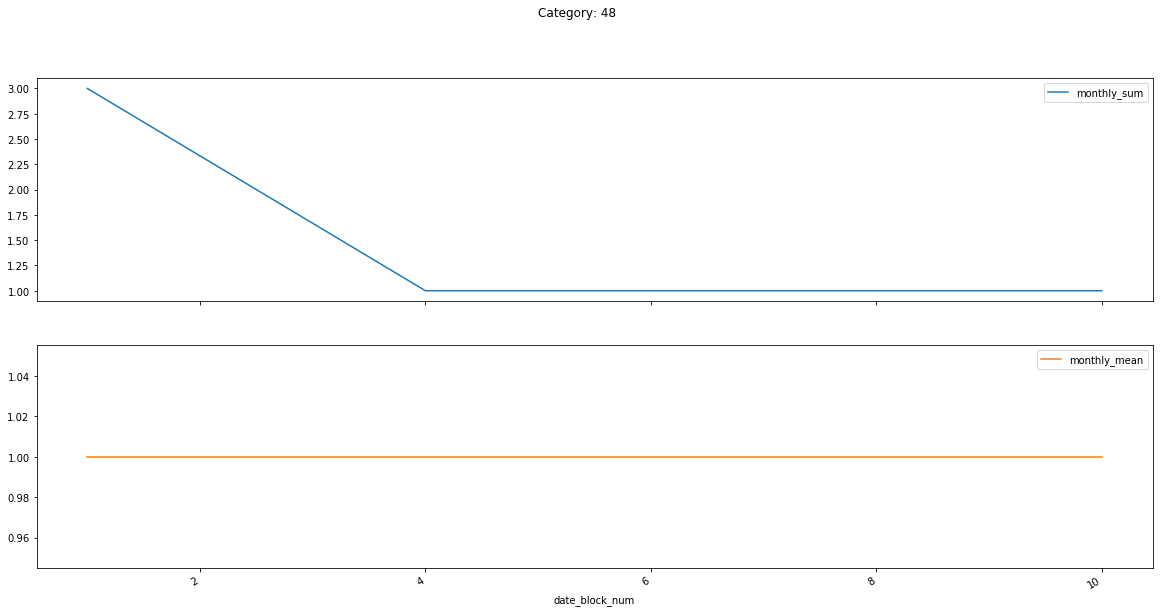

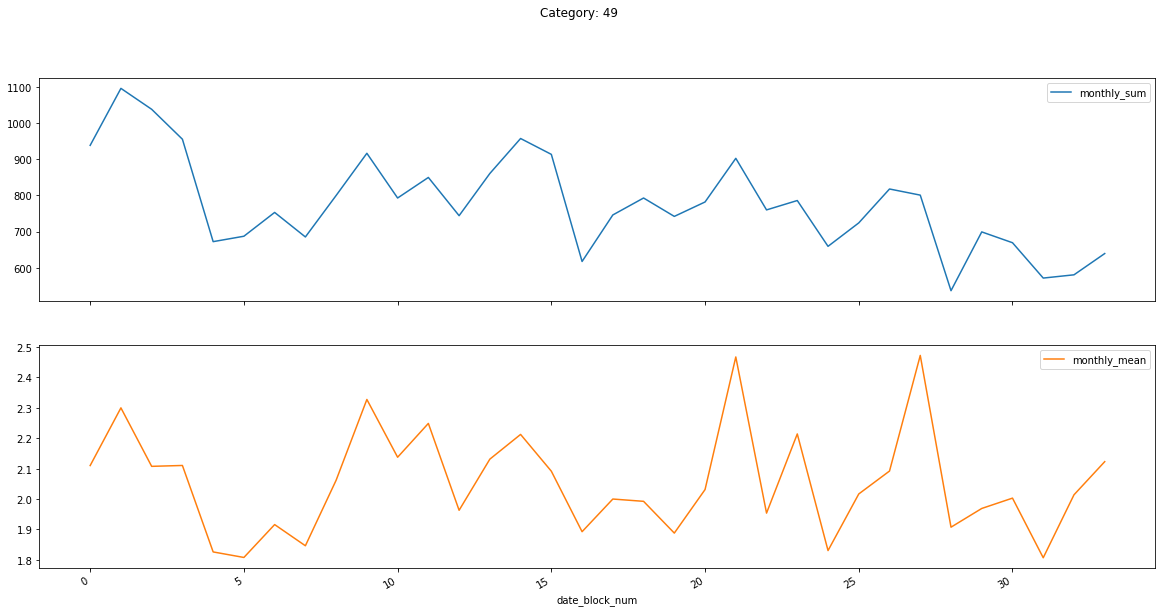

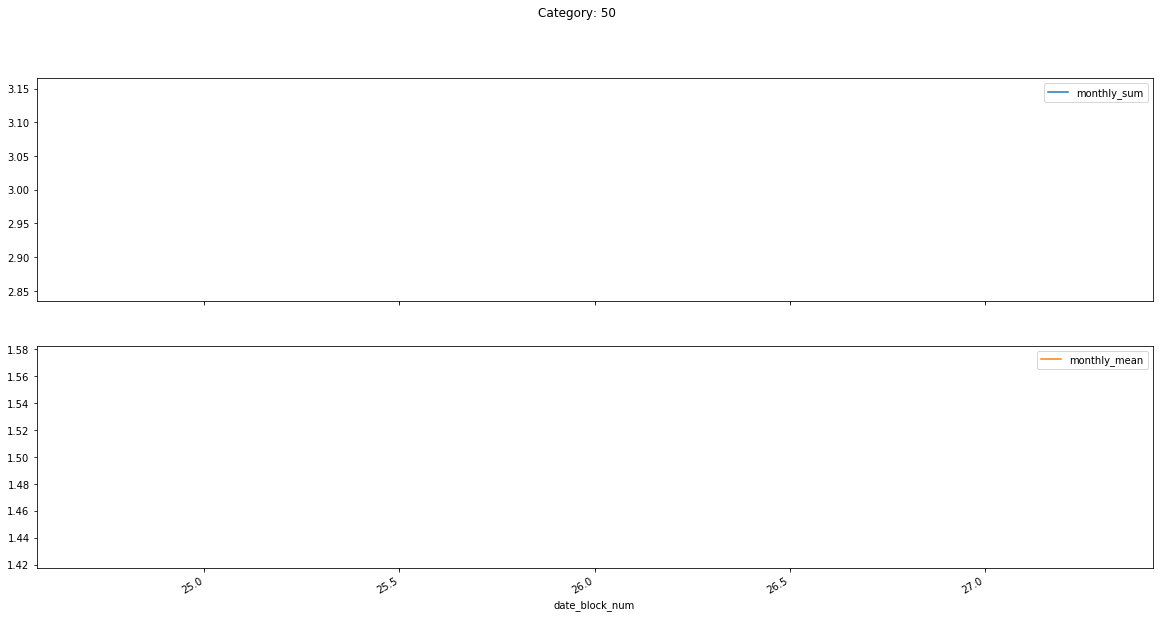

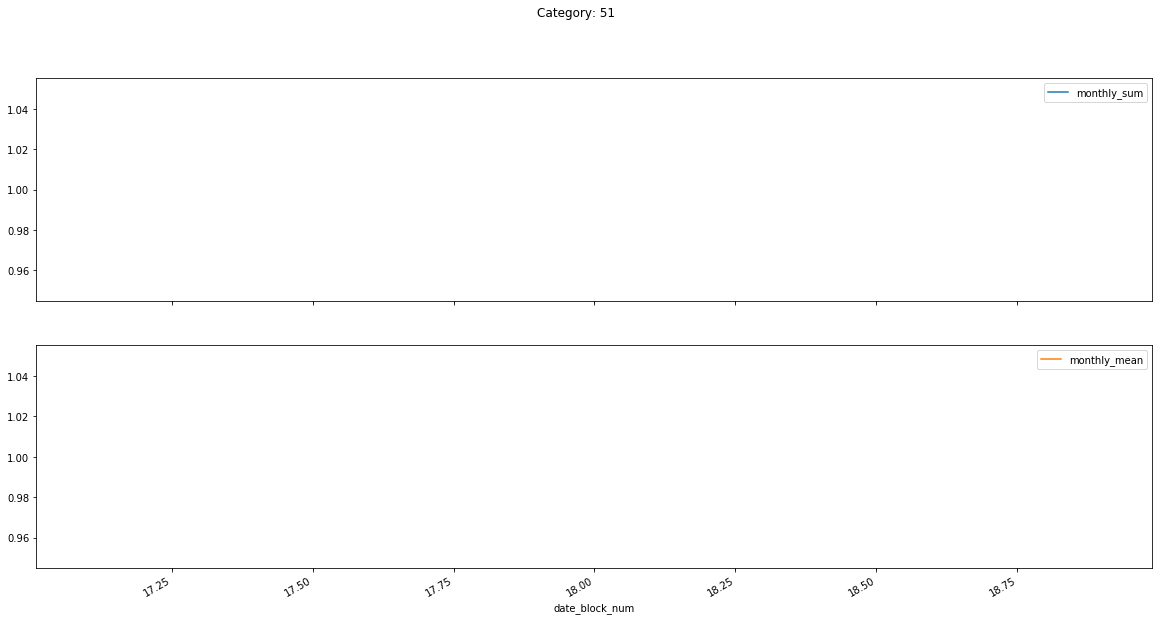

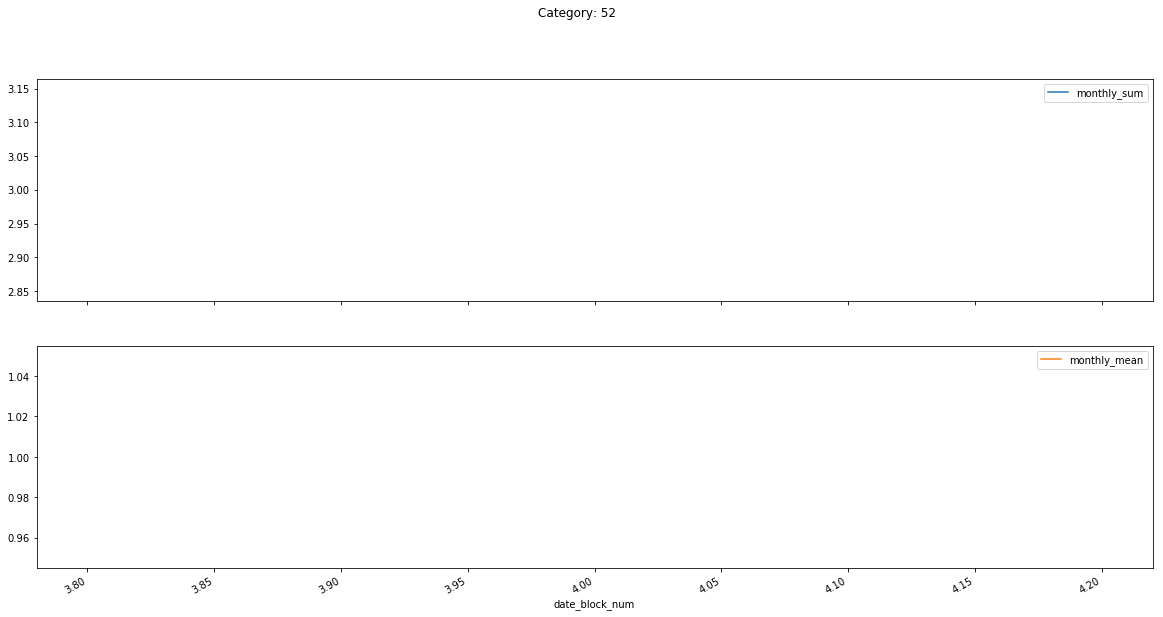

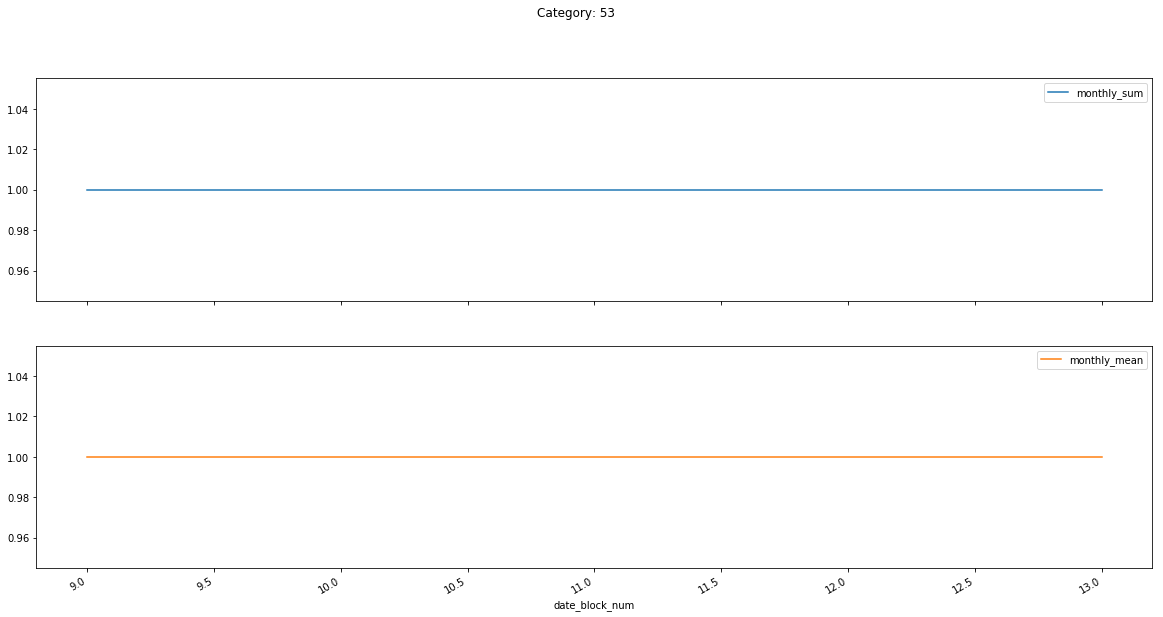

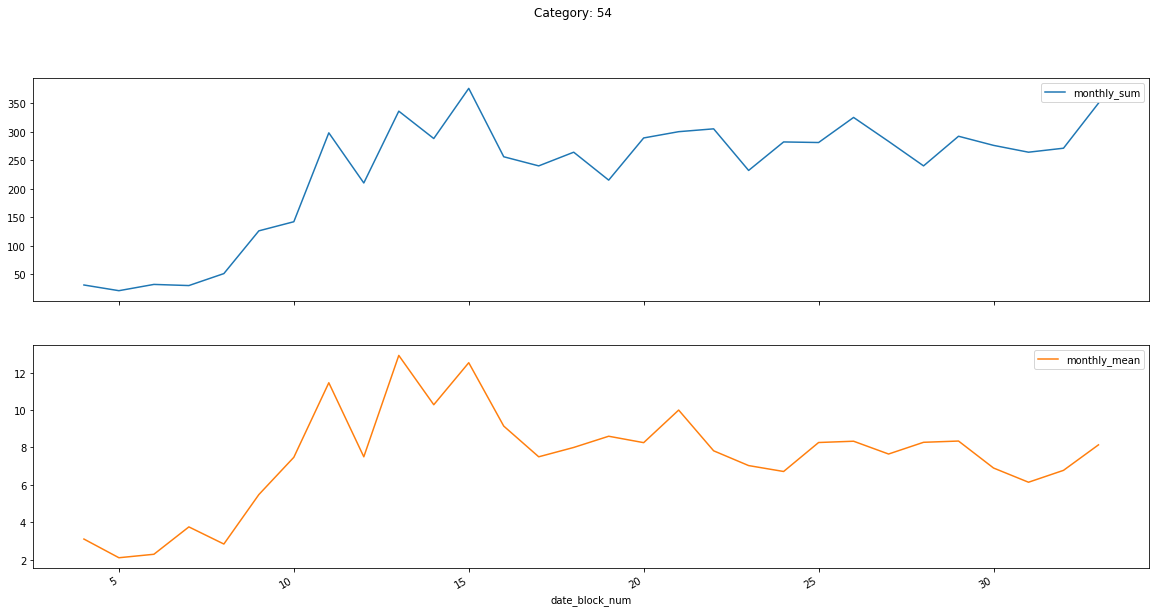

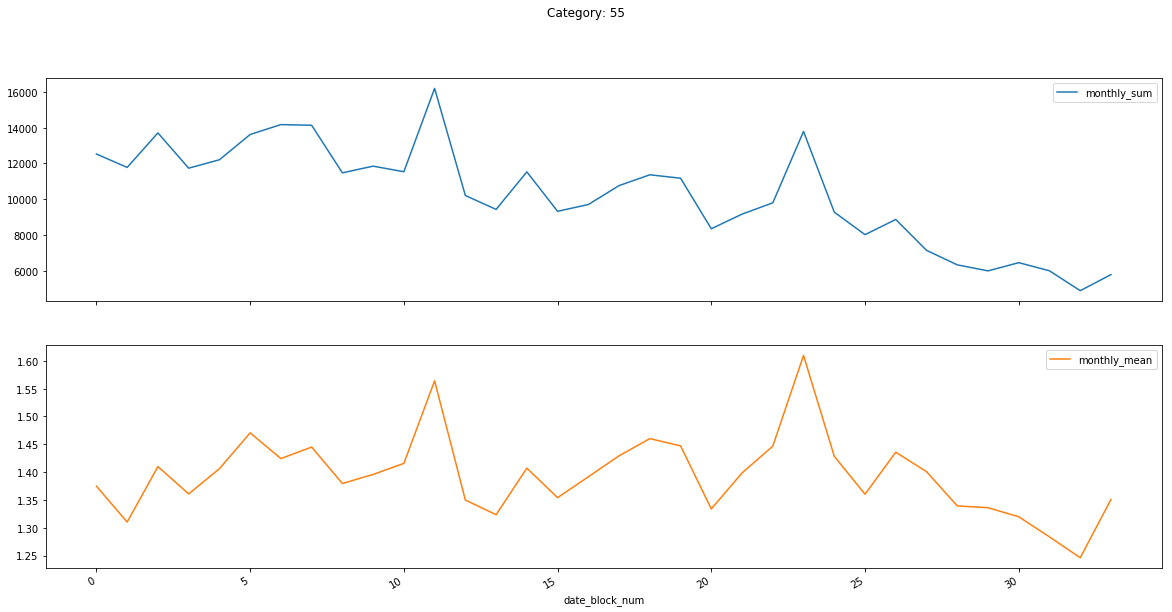

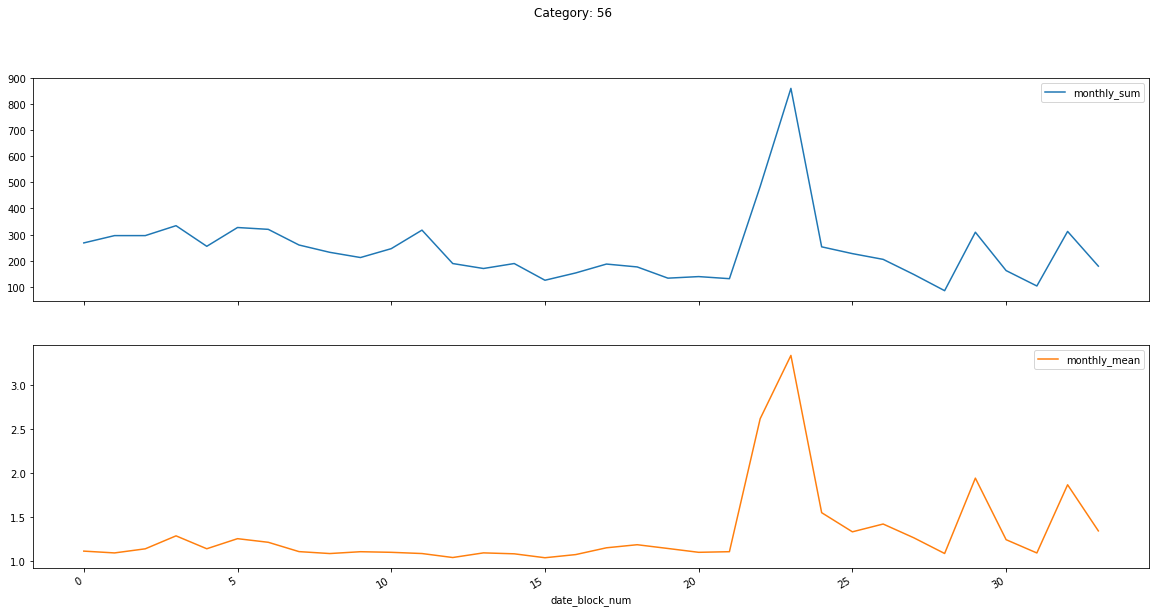

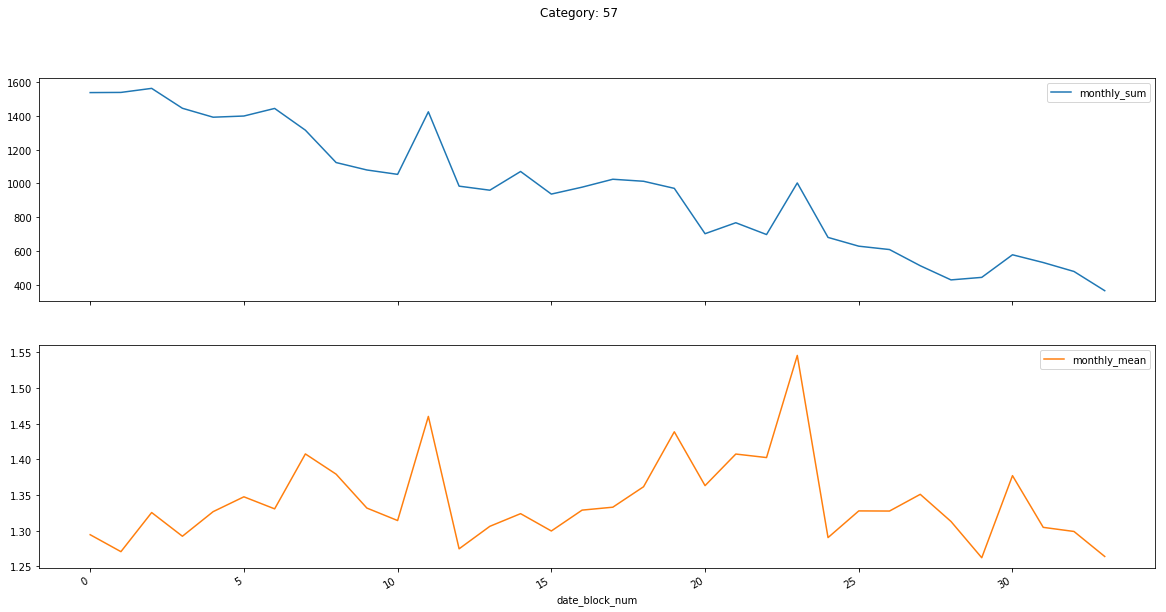

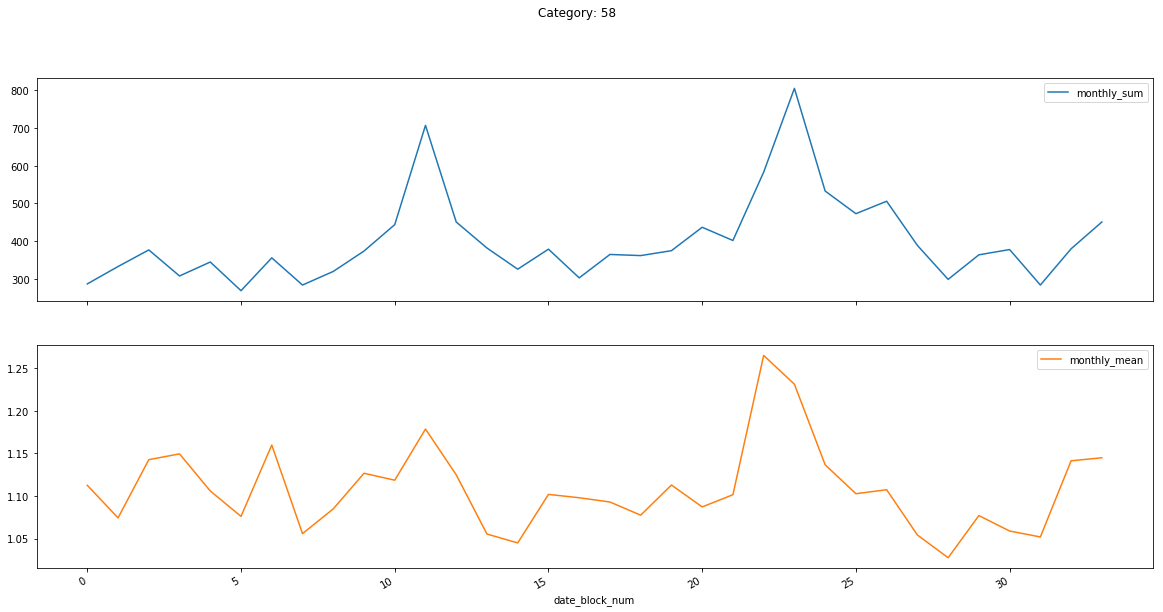

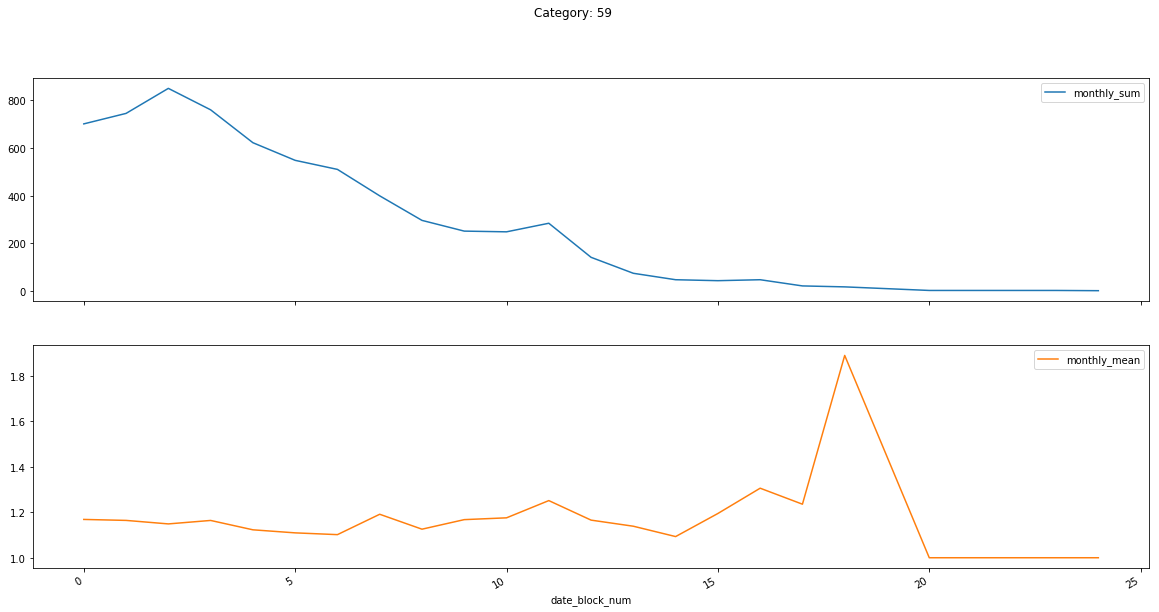

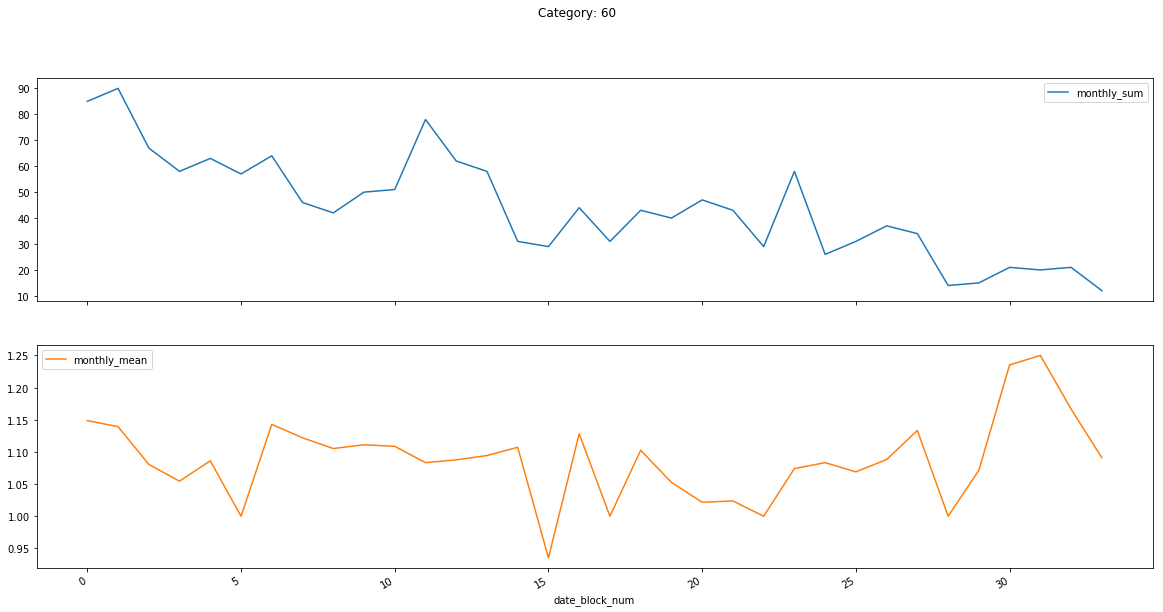

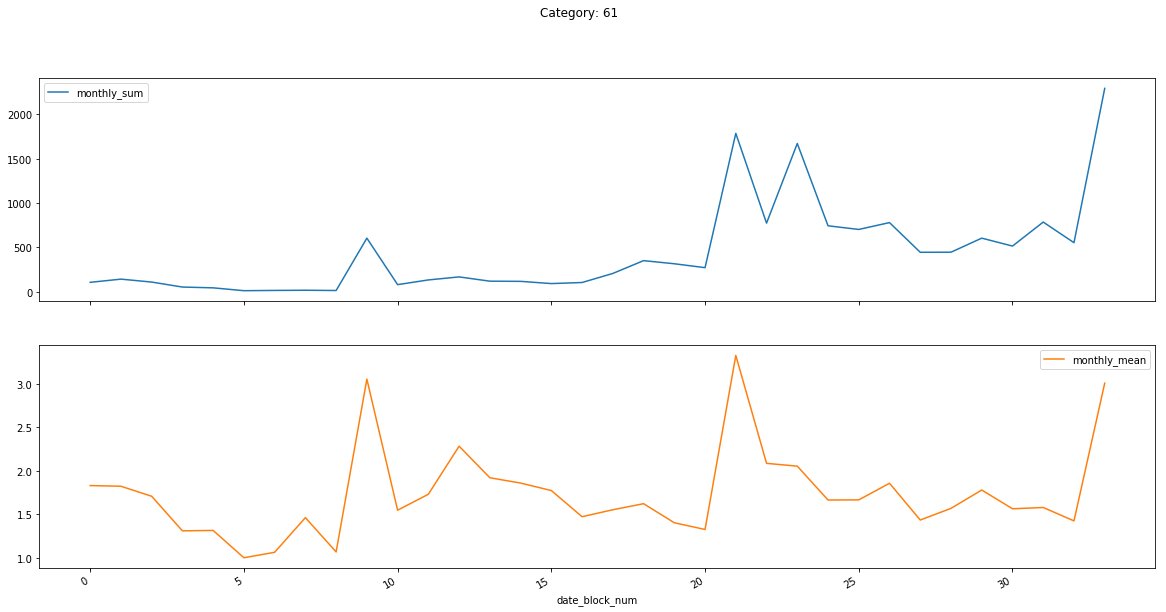

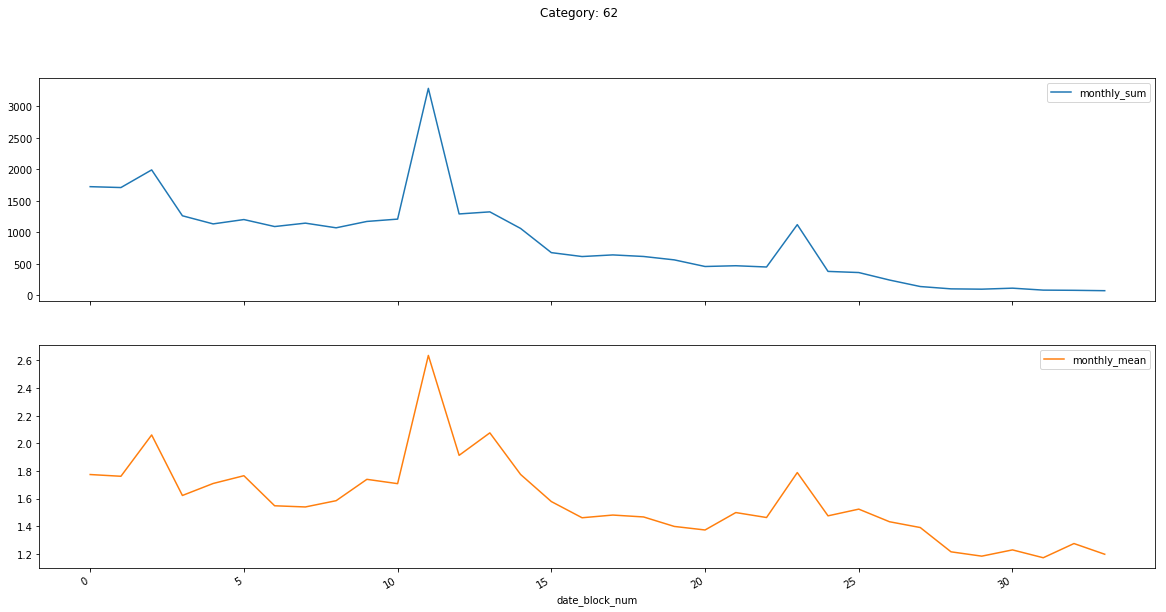

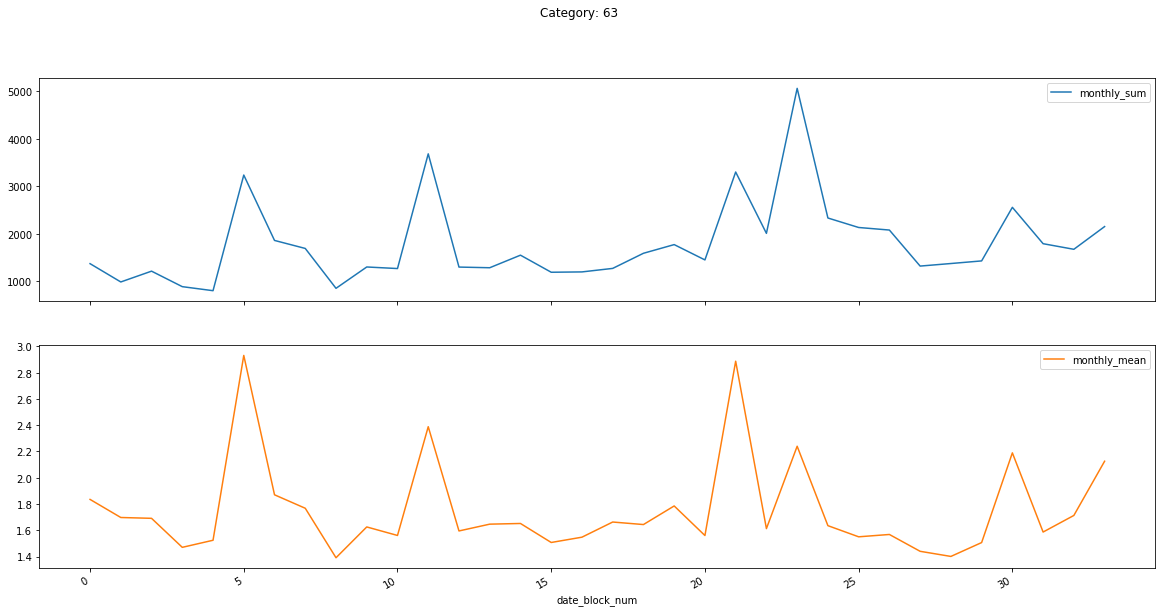

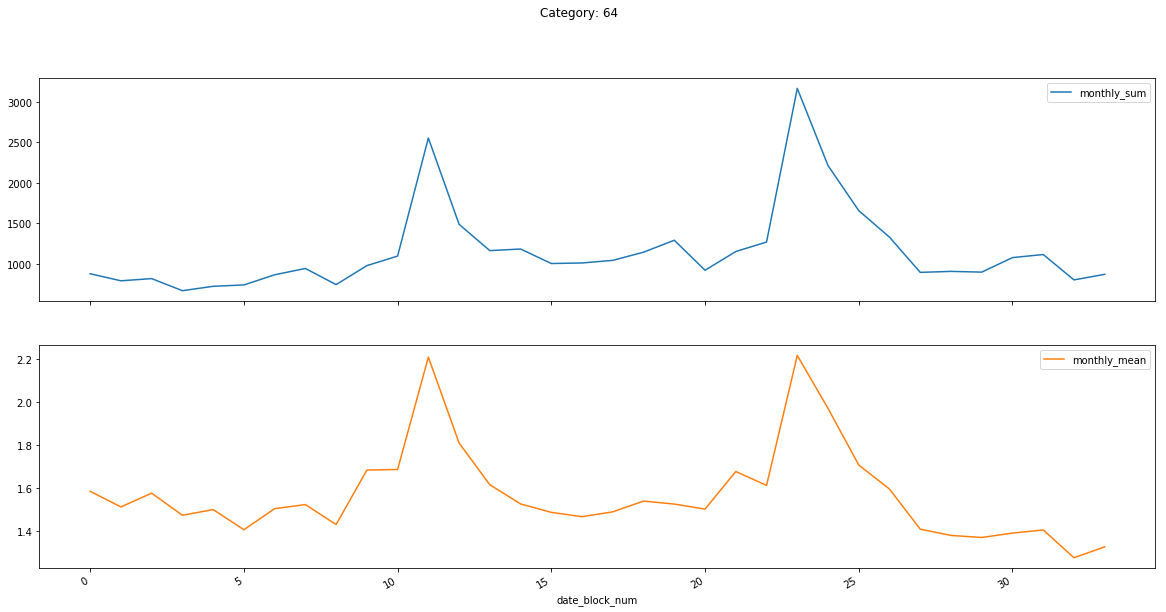

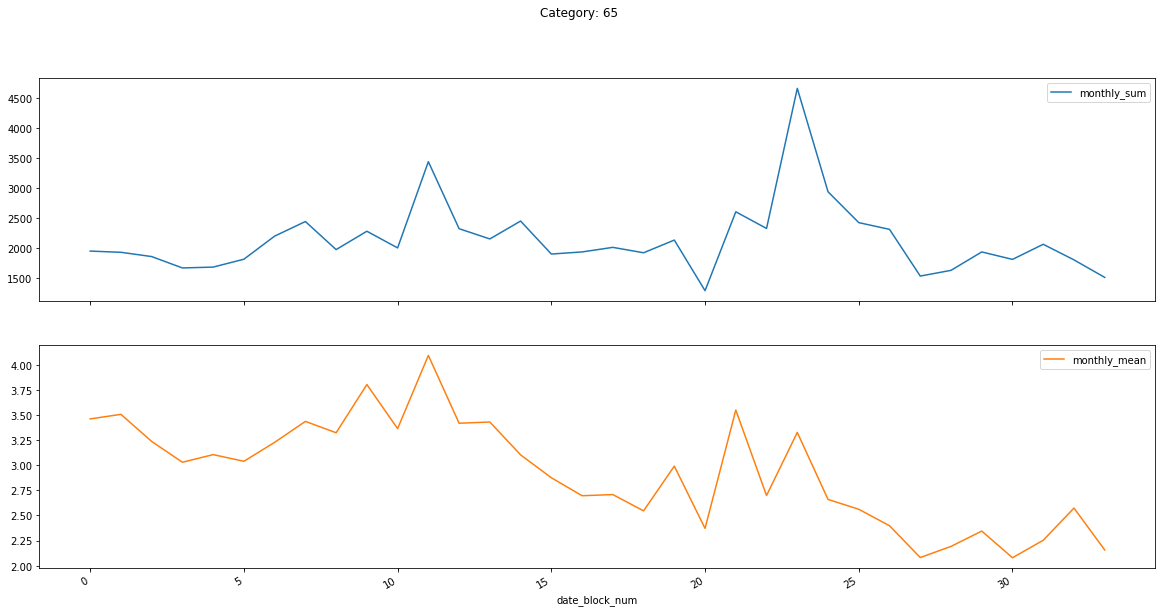

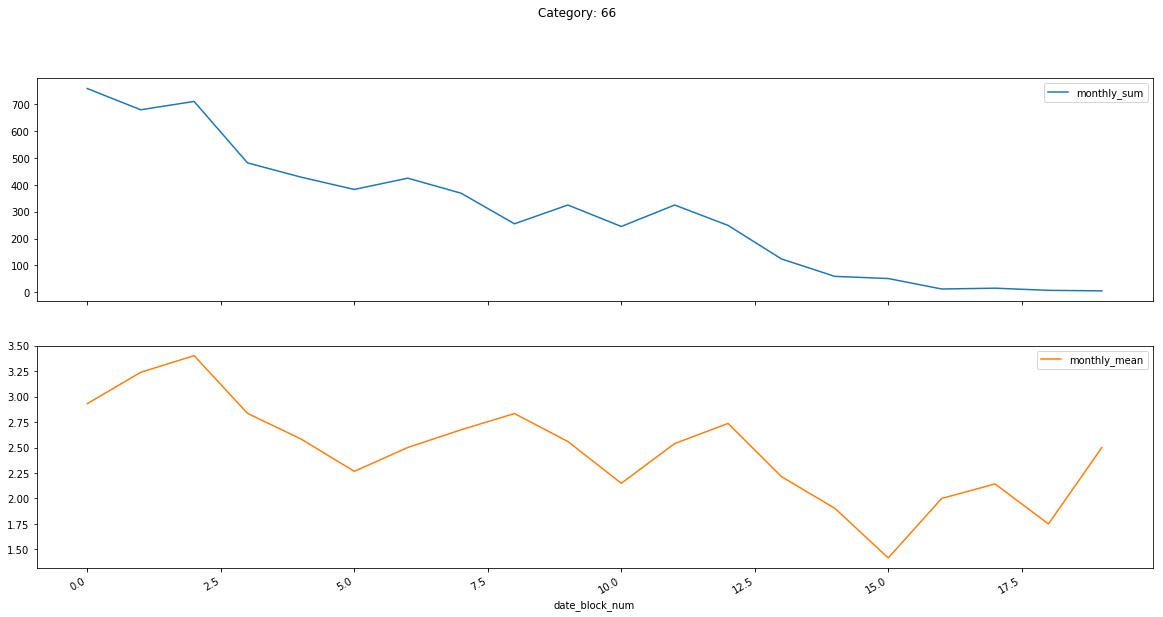

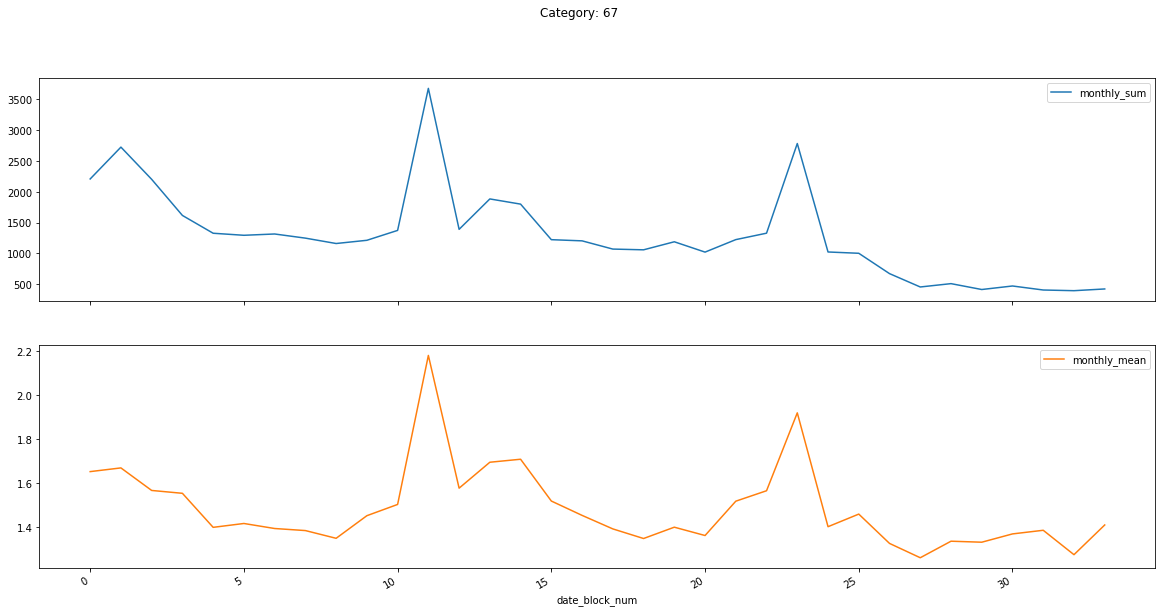

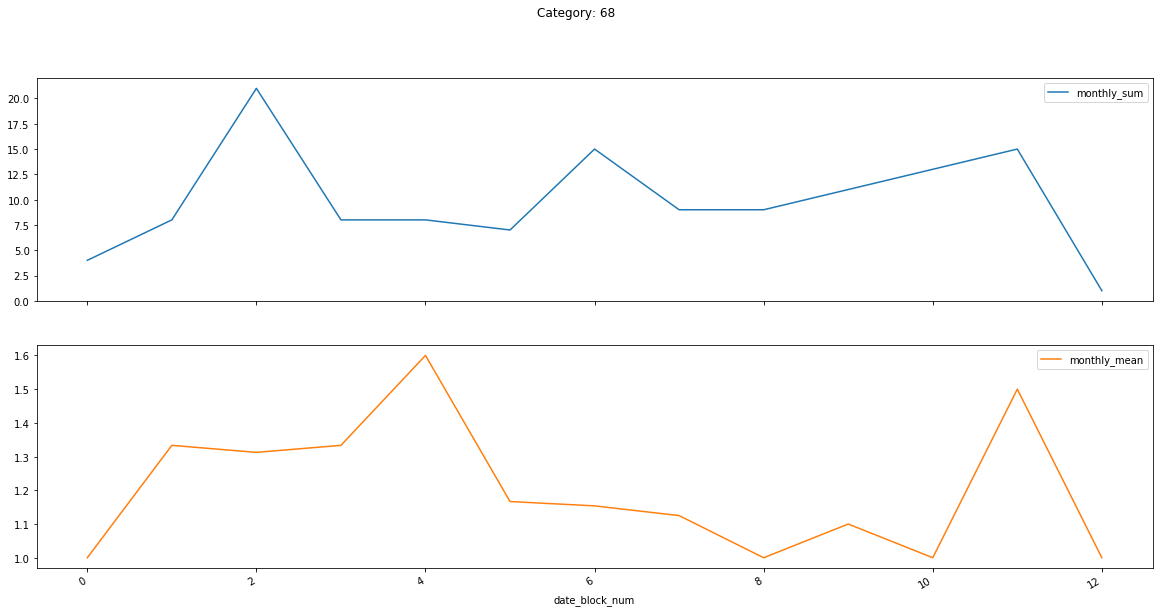

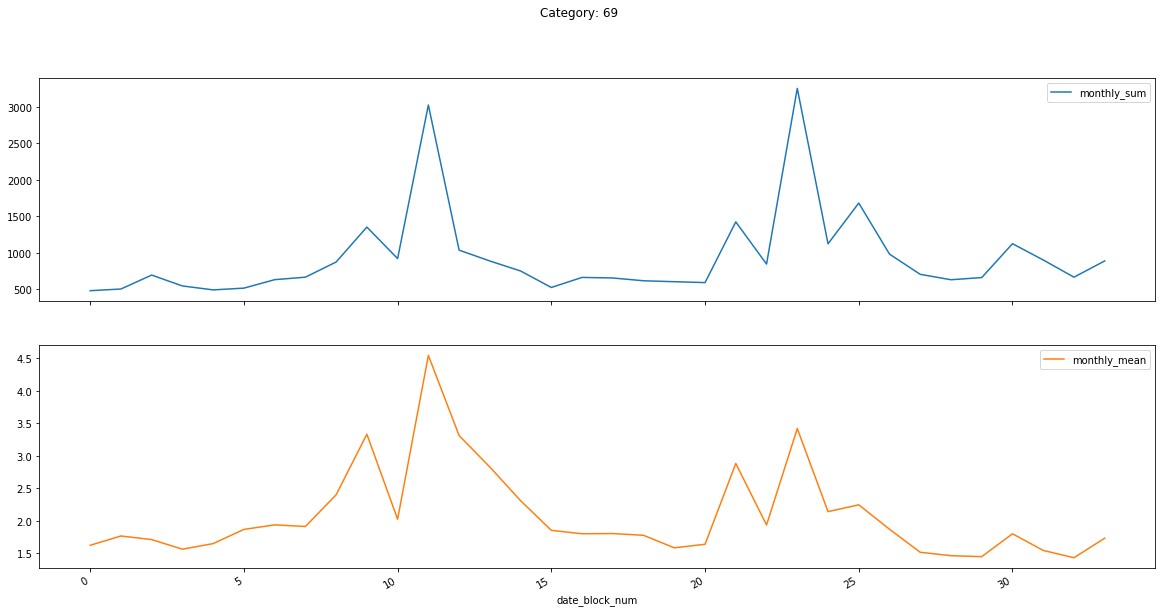

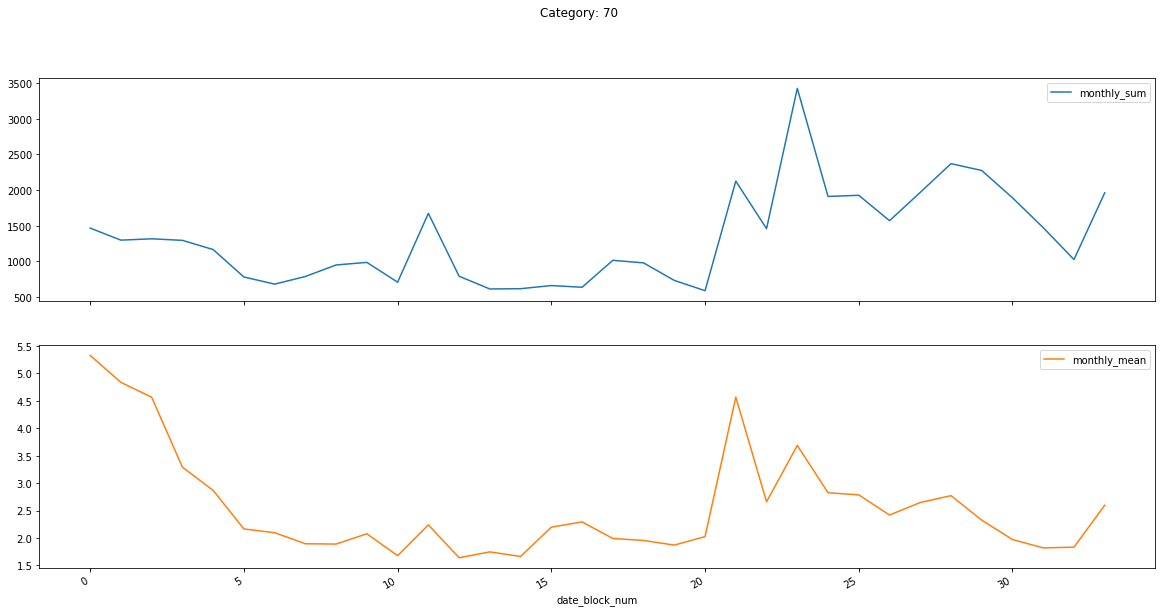

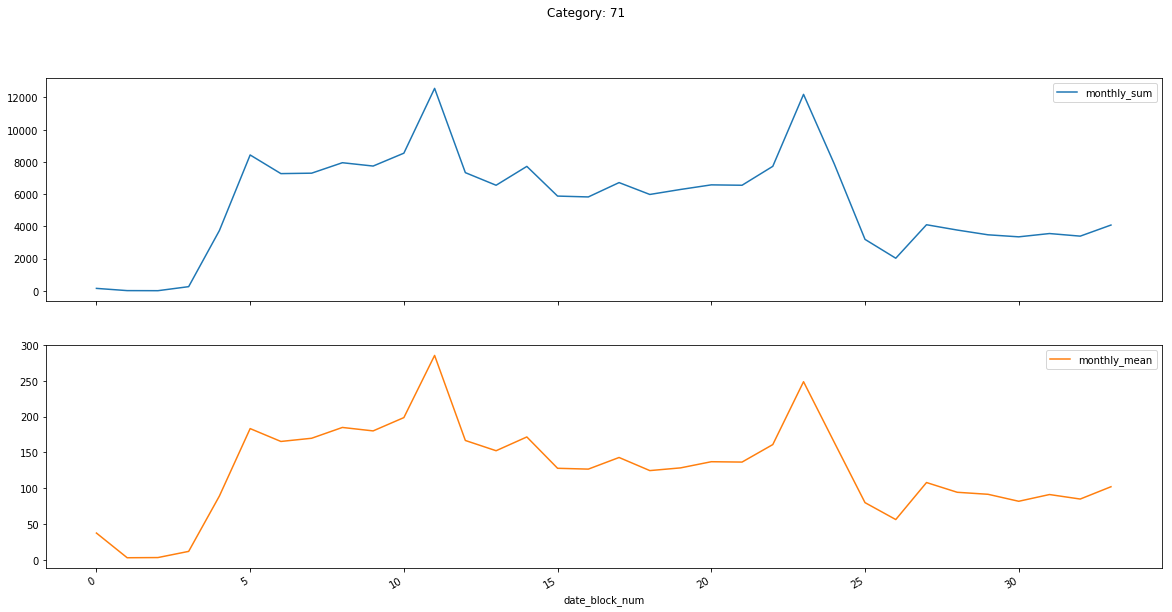

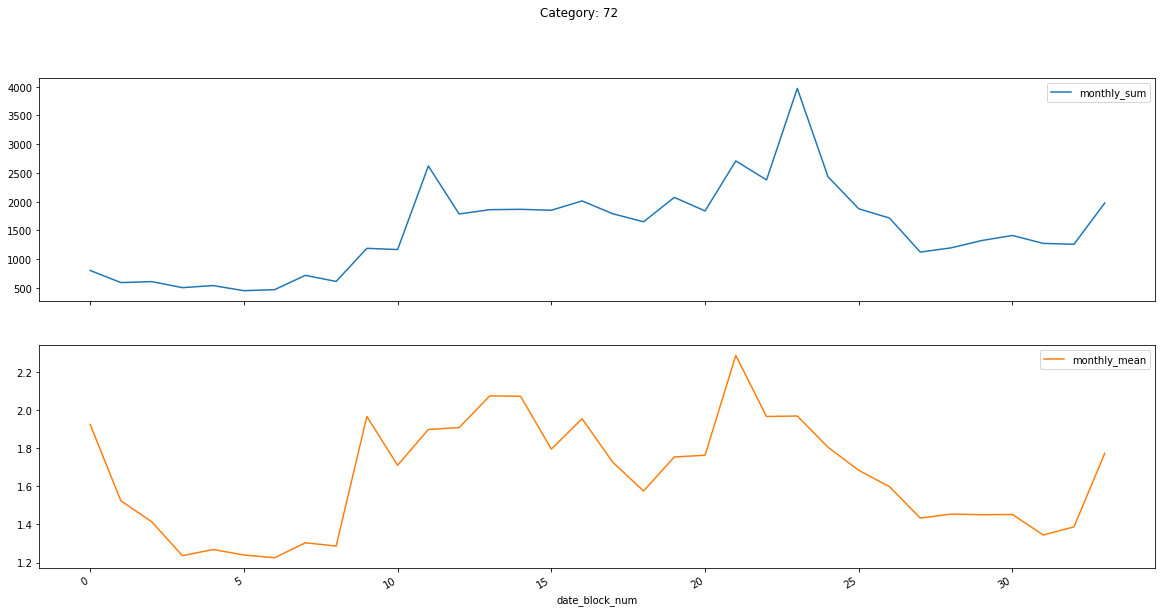

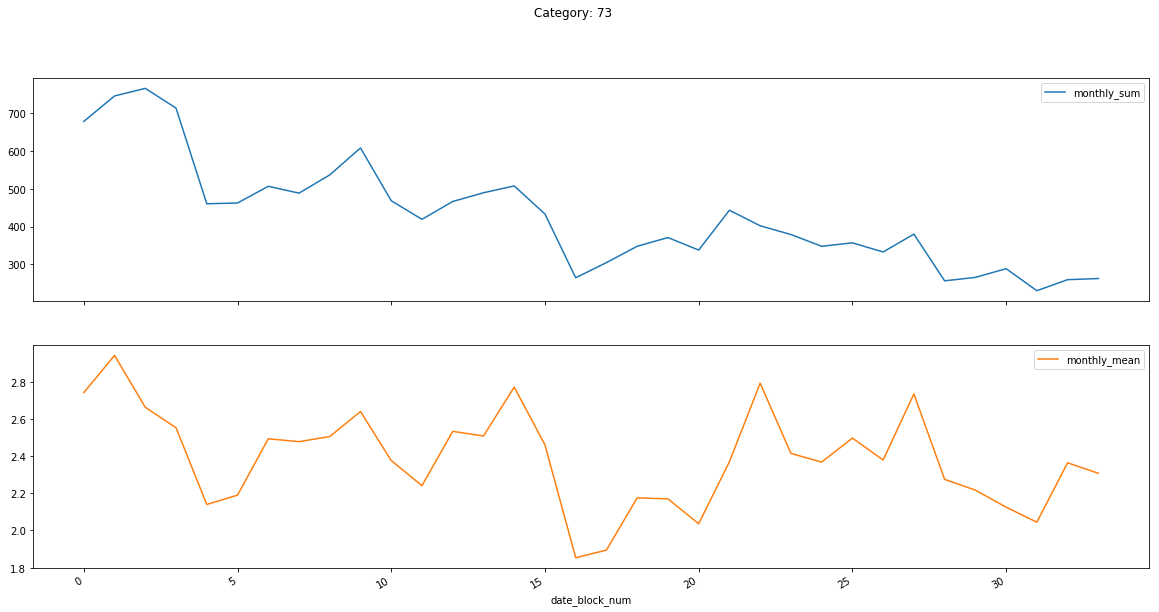

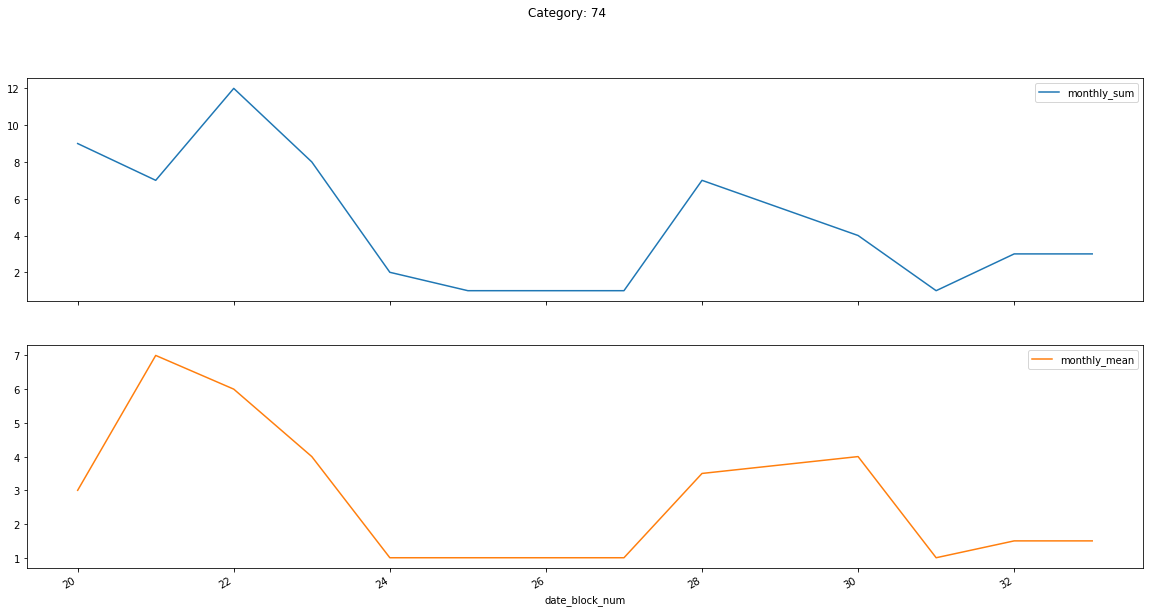

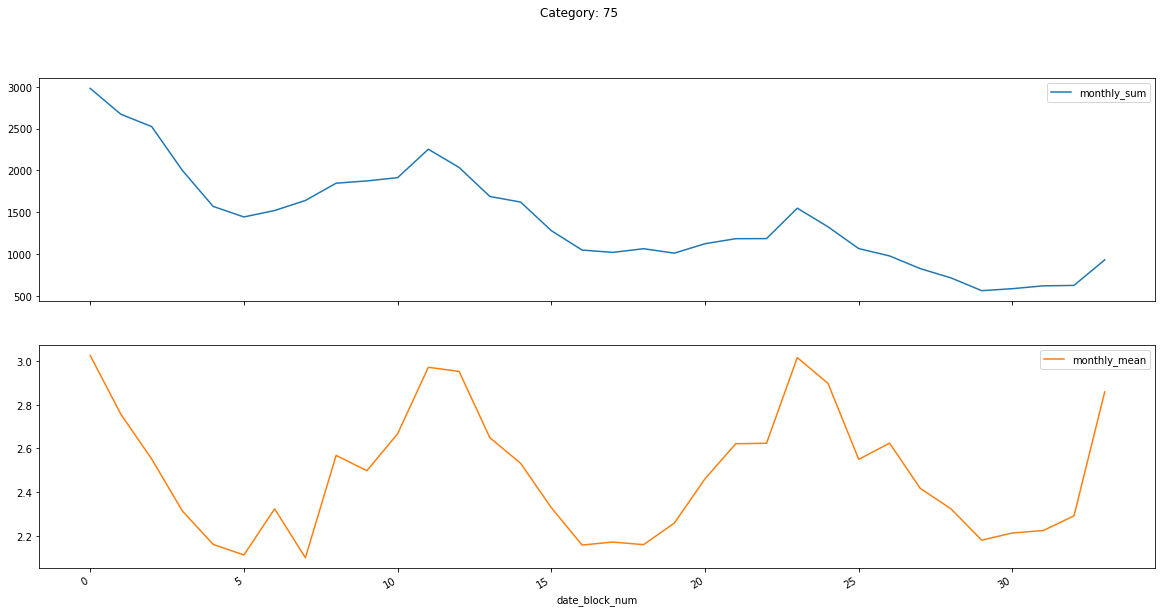

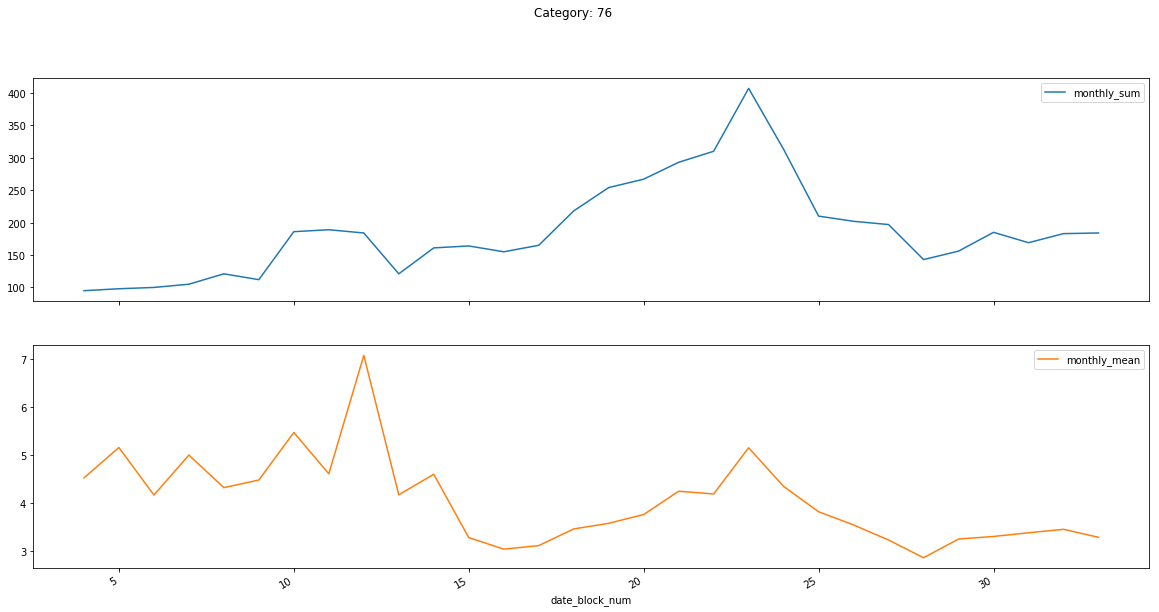

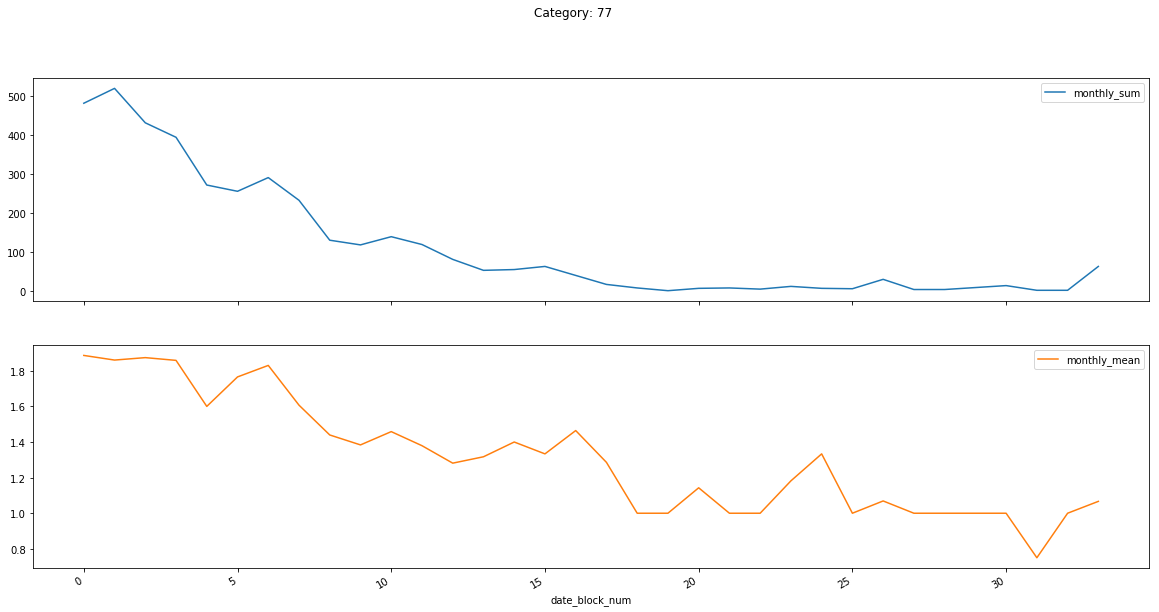

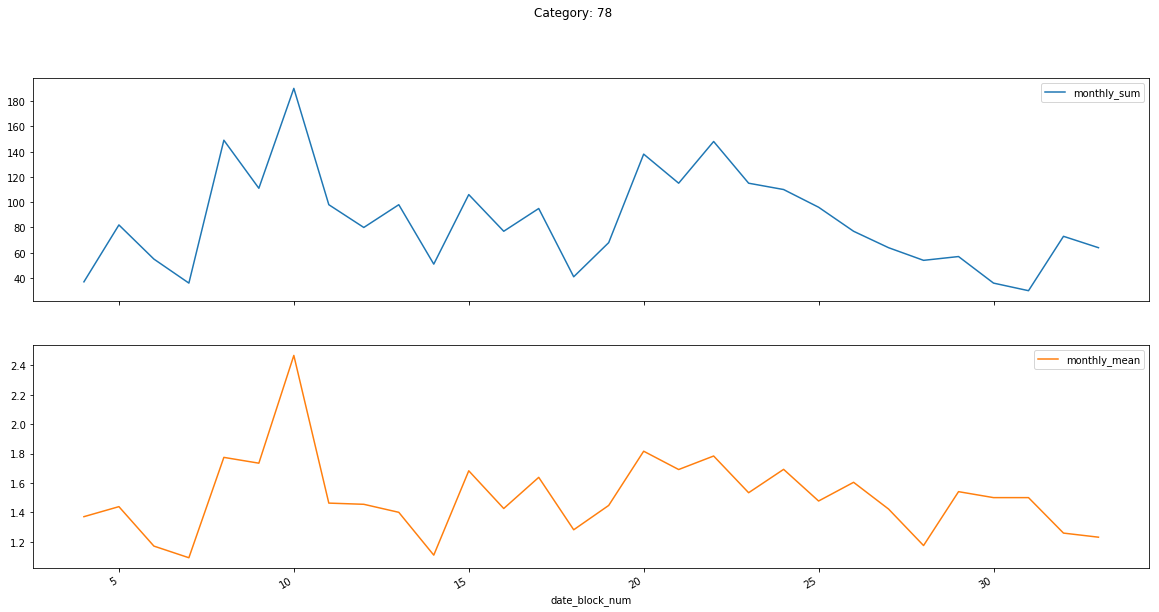

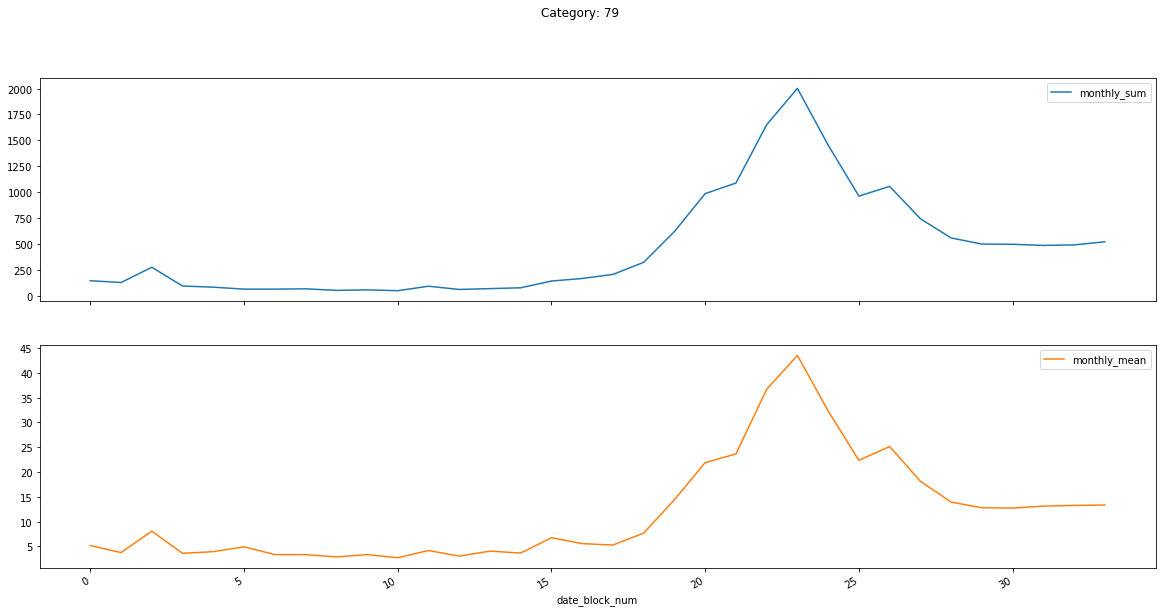

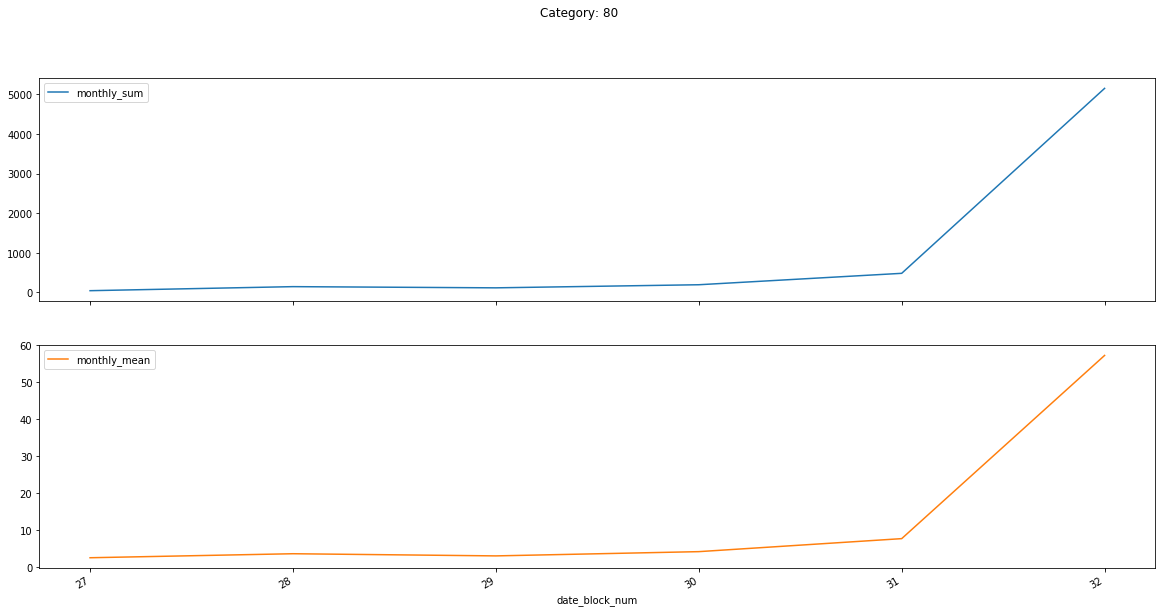

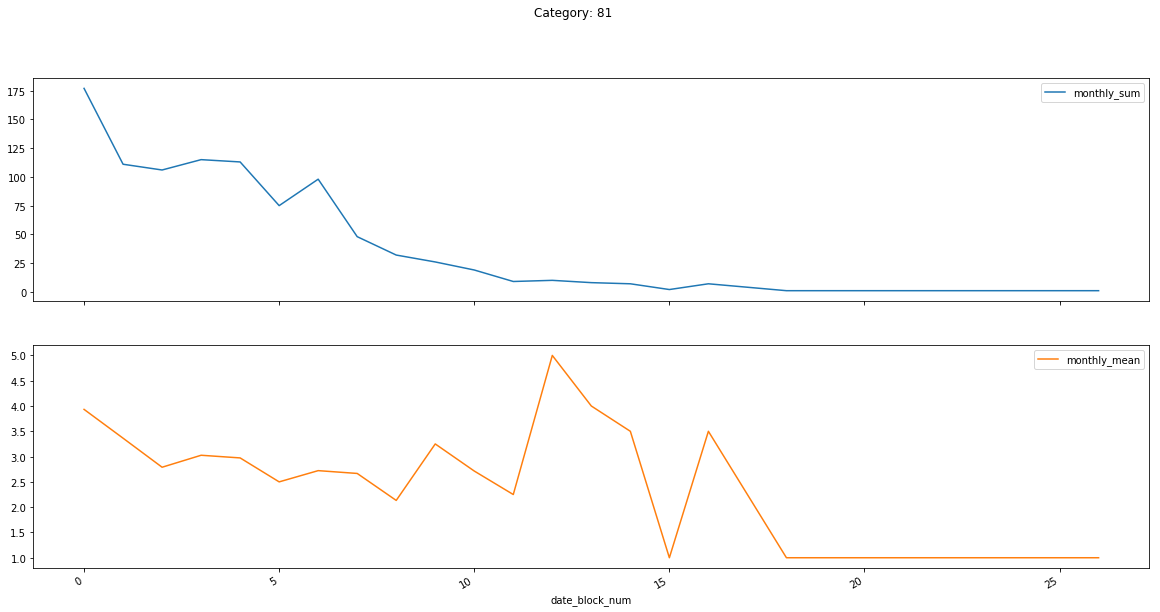

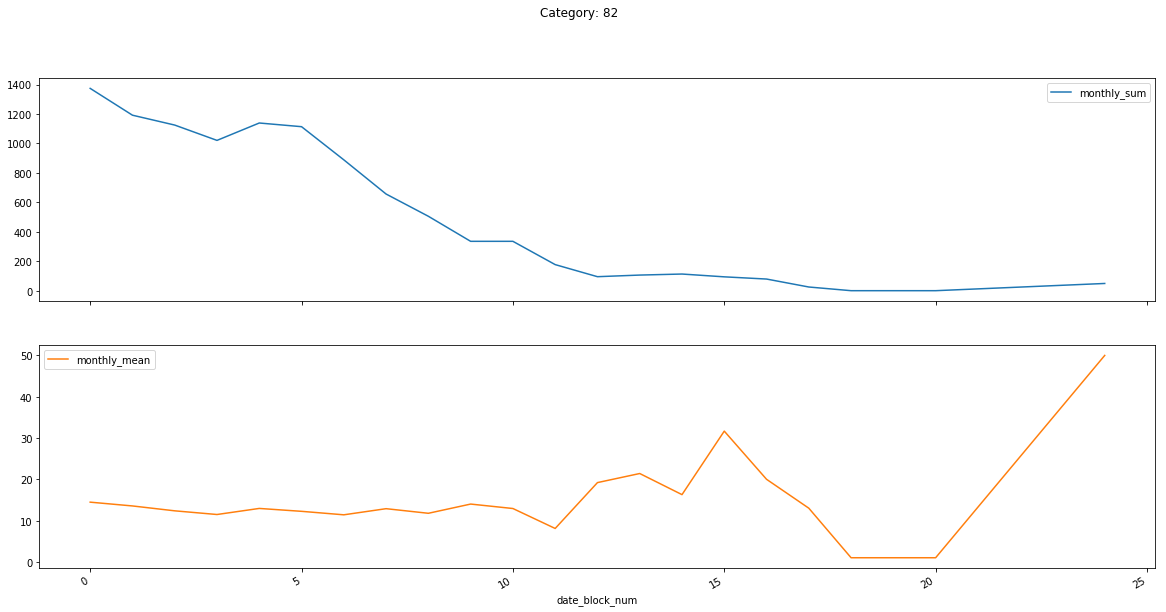

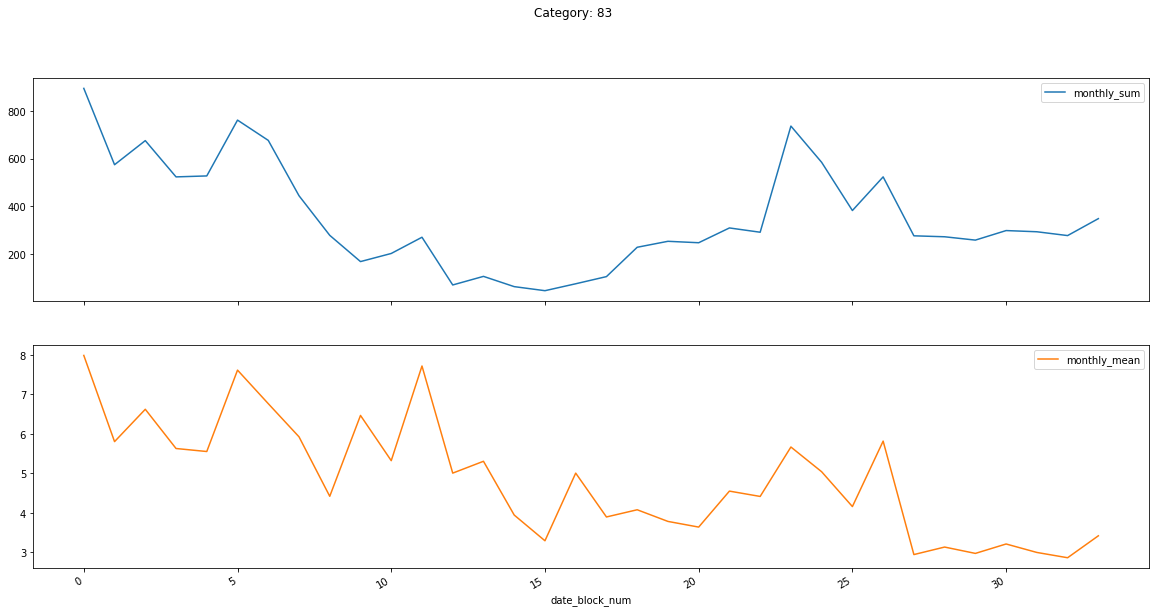

In [24]:
temp = ItemCatMonthlyPerformance.copy().groupby(['item_category_id'],as_index=False)
for key, group in temp:
    group.plot(subplots=True,x='date_block_num',y=['monthly_sum','monthly_mean'],kind="line",figsize=(20,10),title="Category: "+str(key))

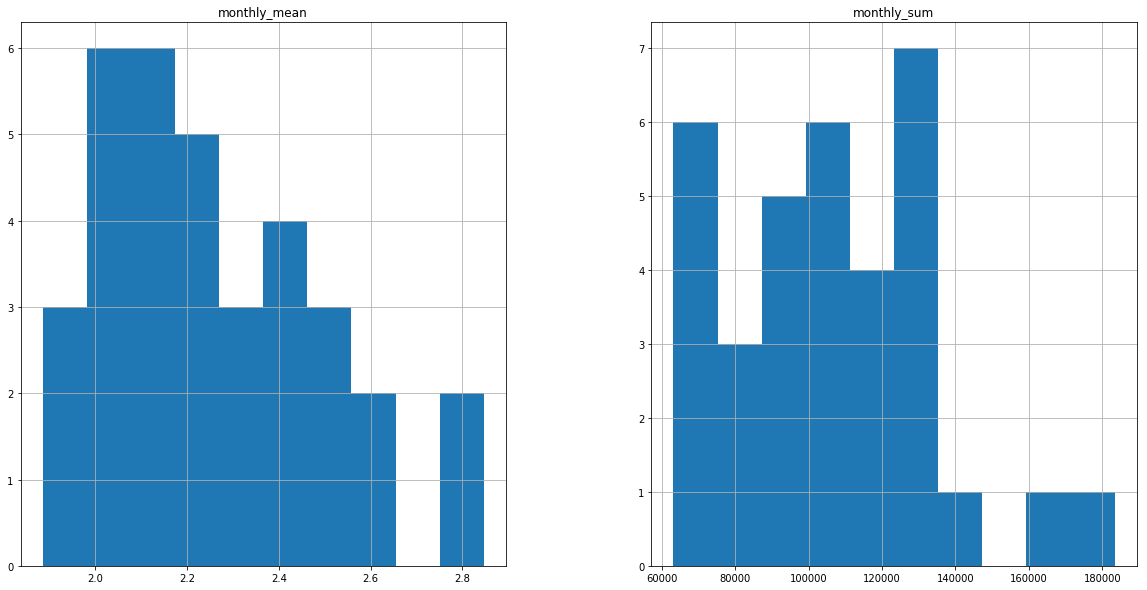

In [12]:
X=MonthlyPerformance.copy().set_index('date_block_num')
X.hist(figsize=(20,10))
plt.show()

In [13]:
split = (int)(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))

Mean:

mean1:
monthly_sum     123468.352941
monthly_mean         2.258329
dtype: float64

mean2:
monthly_sum     91132.000000
monthly_mean        2.254215
dtype: float64


Variance:

var11:
monthly_sum     4.160894e+08
monthly_mean    4.998568e-02
dtype: float64

var2:
monthly_sum     6.985138e+08
monthly_mean    6.892915e-02
dtype: float64


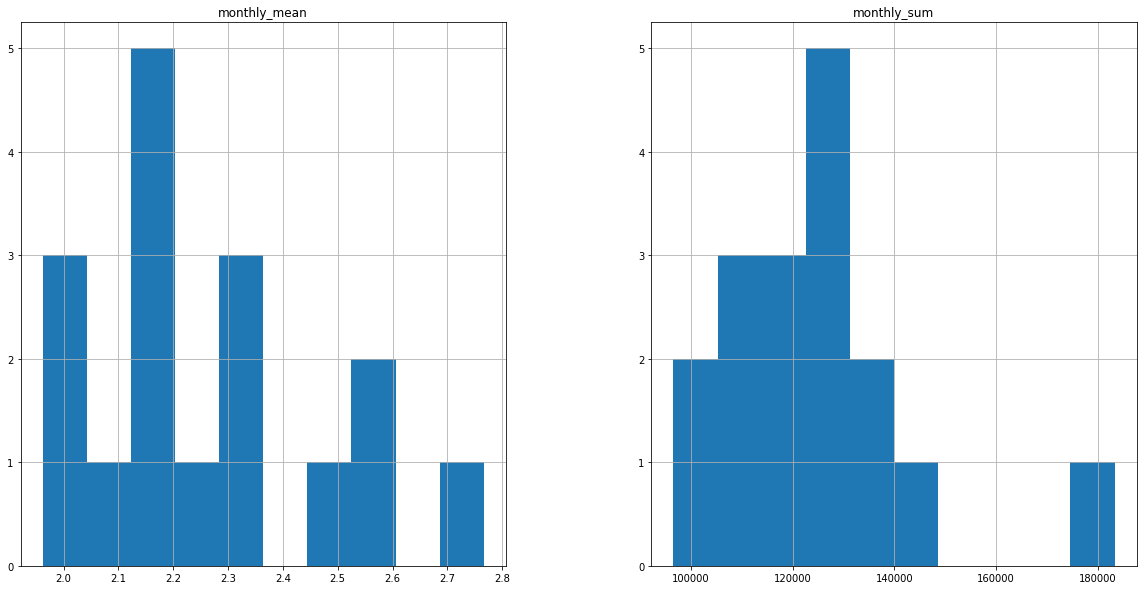

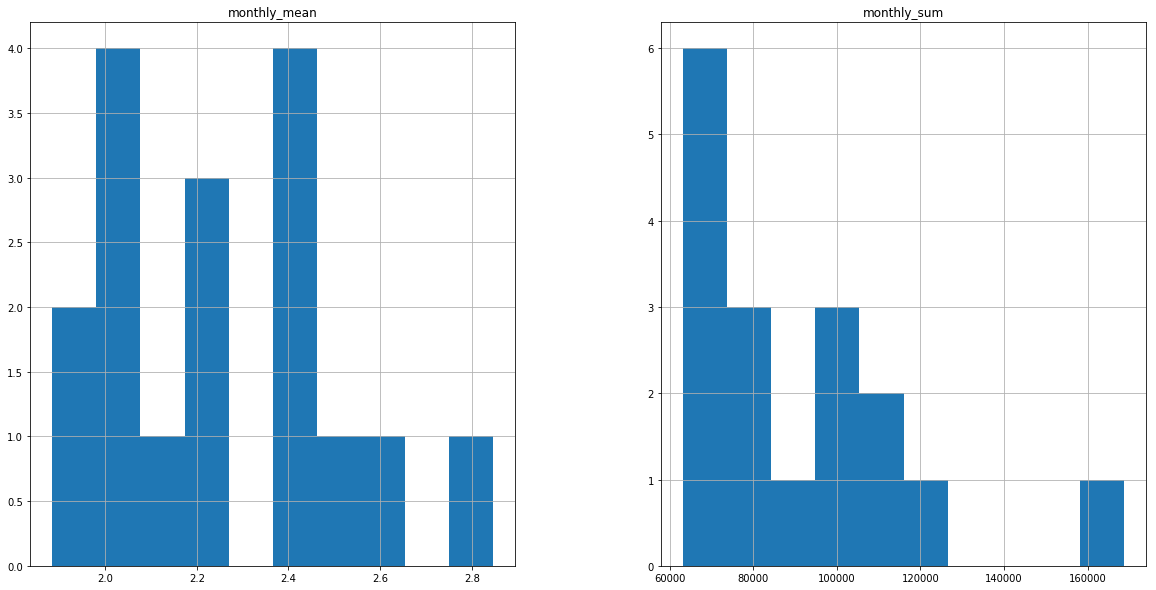

In [14]:
X1.hist(figsize=(20,10))
plt.show()
X2.hist(figsize=(20,10))
plt.show()

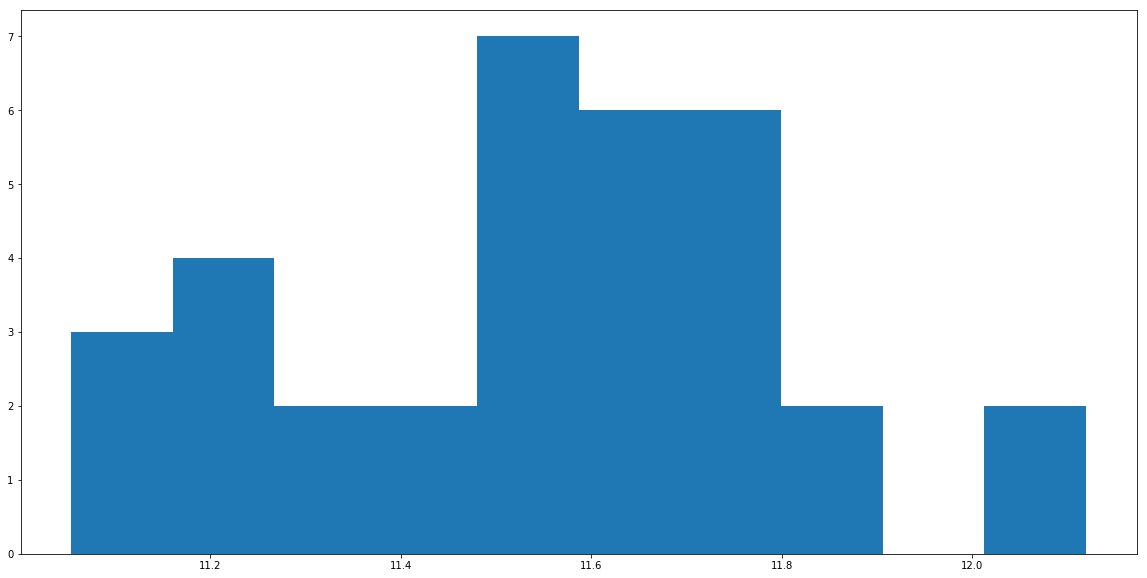

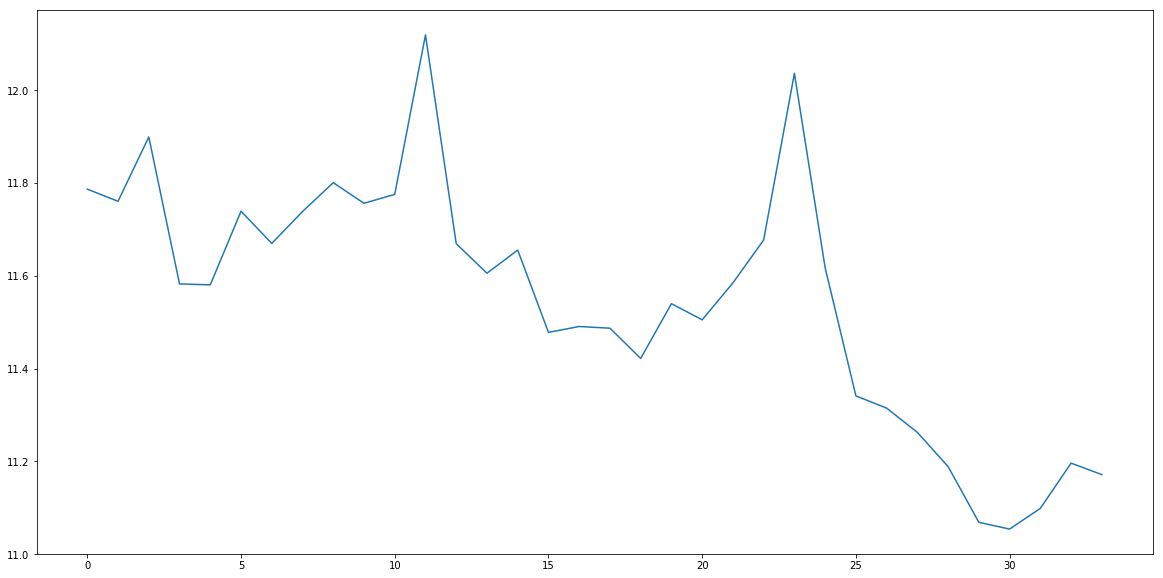

In [15]:
from numpy import log
plt.figure(figsize=(20,10))

x=X.monthly_sum.values
x = log(x)
plt.hist(x)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(x)
plt.show()


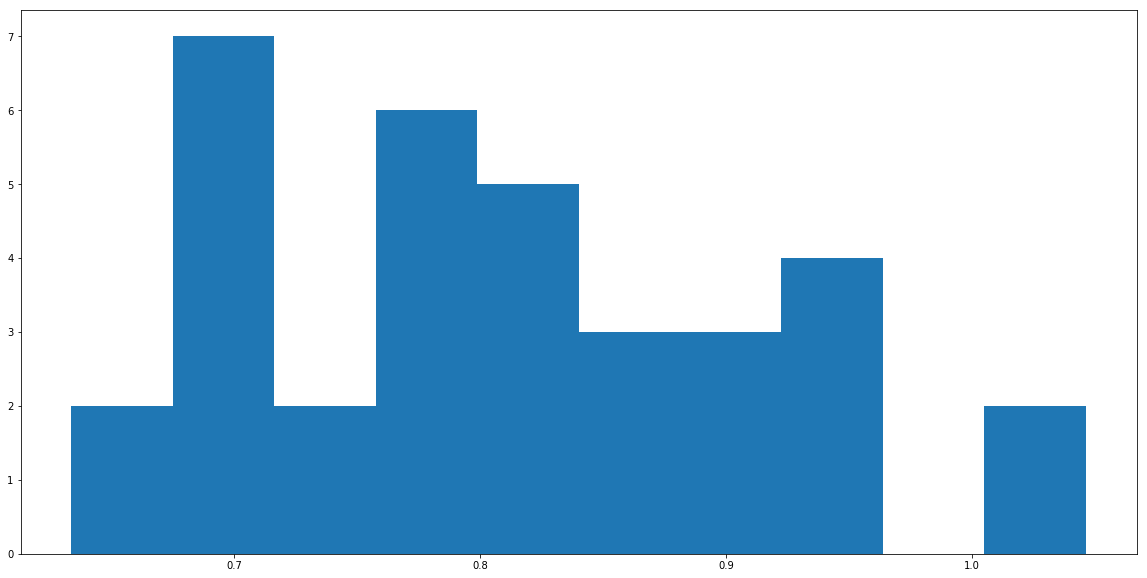

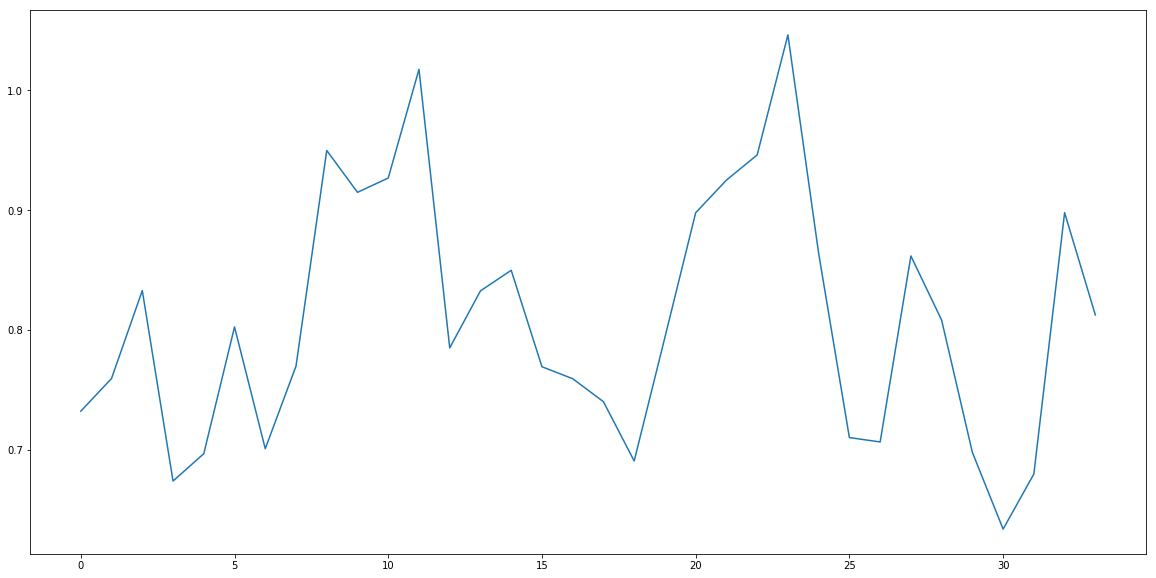

In [16]:
x=X.monthly_mean.values
x = log(x)
plt.figure(figsize=(20,10))
plt.hist(x)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(x)
plt.show()

In [17]:
x=X.monthly_sum.values
x = log(x)
split = (int)(len(x) / 2)
x1, x2 = x[0:split], x[split:]
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))

Mean:

mean1:
11.712087298496854

mean2:
11.386039661253163


Variance:

var11:
0.02236139165130172

var2:
0.06393955467628791


In [18]:
x=X.monthly_mean.values
x = log(x)
split = (int)(len(x) / 2)
x1, x2 = x[0:split], x[split:]
mean1, mean2 = x1.mean(), x2.mean()
var1, var2 = x1.var(), x2.var()
print("Mean:\n\nmean1:\n"+str(mean1) +"\n\nmean2:\n"+str(mean2))
print("\n\nVariance:\n\nvar11:\n"+str(var1) +"\n\nvar2:\n"+str(var2))

Mean:

mean1:
0.8101844066353925

mean2:
0.806579954248962


Variance:

var11:
0.00872295300855862

var2:
0.012301640071168353


In [19]:
from statsmodels.tsa.stattools import adfuller

x = X.monthly_sum.values
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.395704
p-value: 0.142953
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


In [20]:
x = X.monthly_mean.values
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.310309
p-value: 0.014424
Critical Values:
	1%: -3.738
	5%: -2.992
	10%: -2.636
